<center><h1>Plotting and Visualising Results</h1>
<h2>Matthias Bartolo</h2>

</center>


### Evaluation Metrics for Dissertation

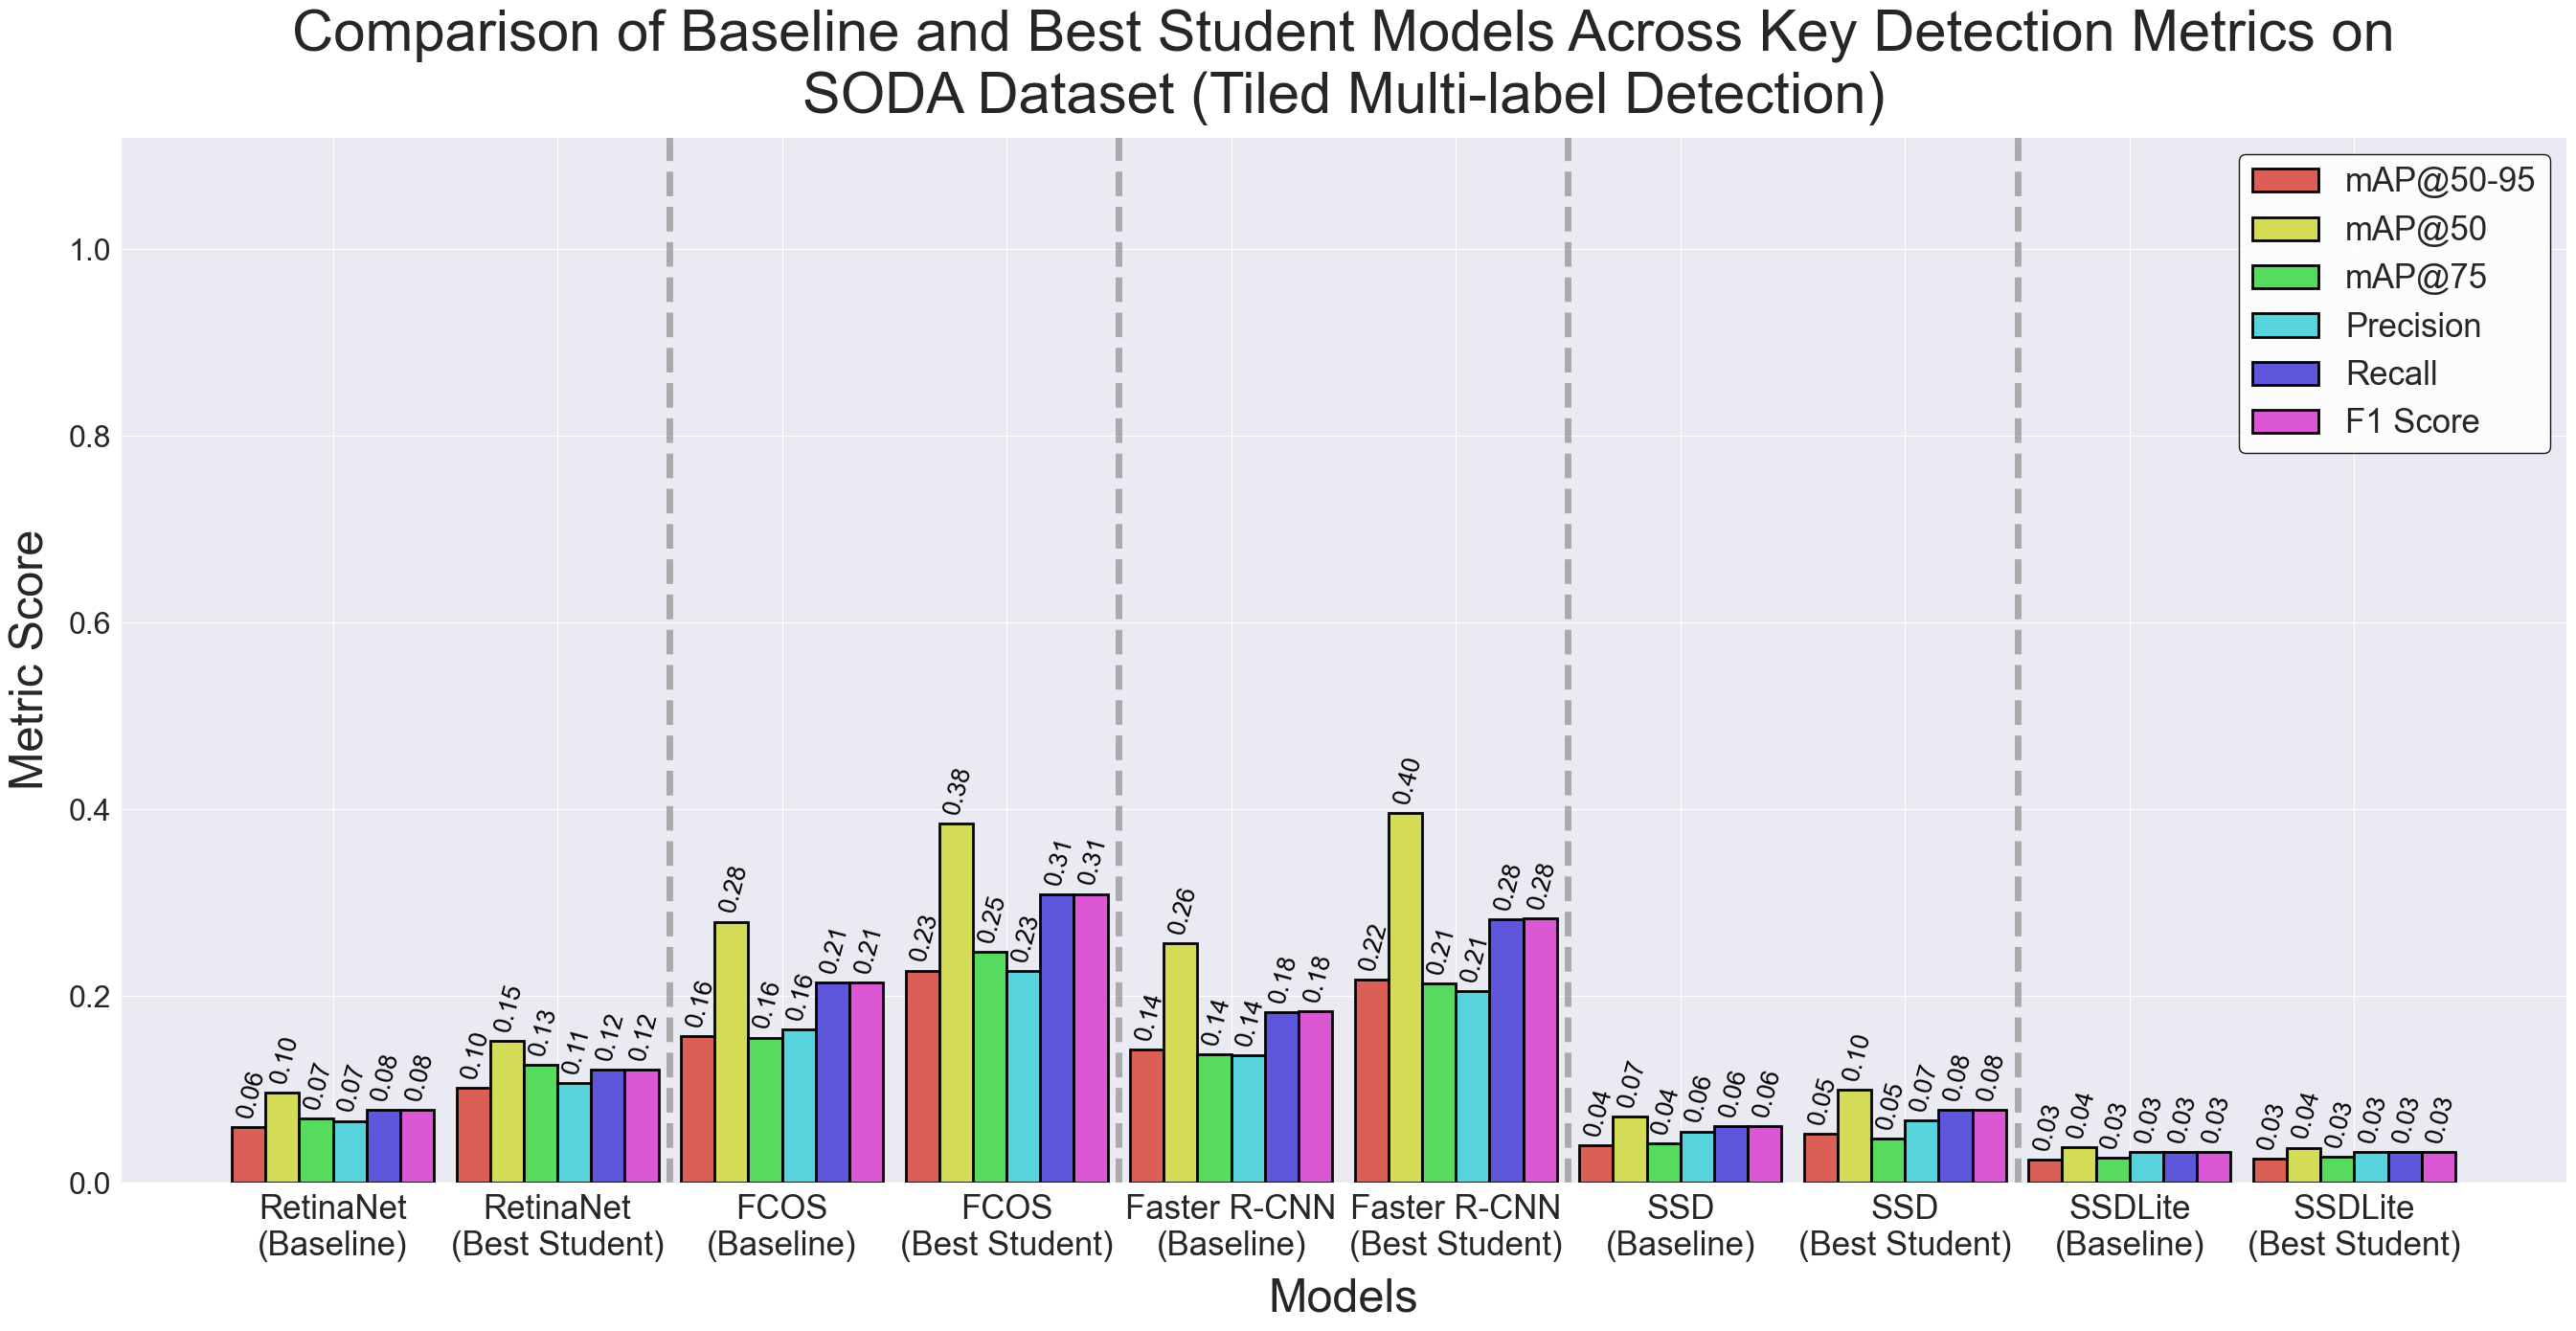

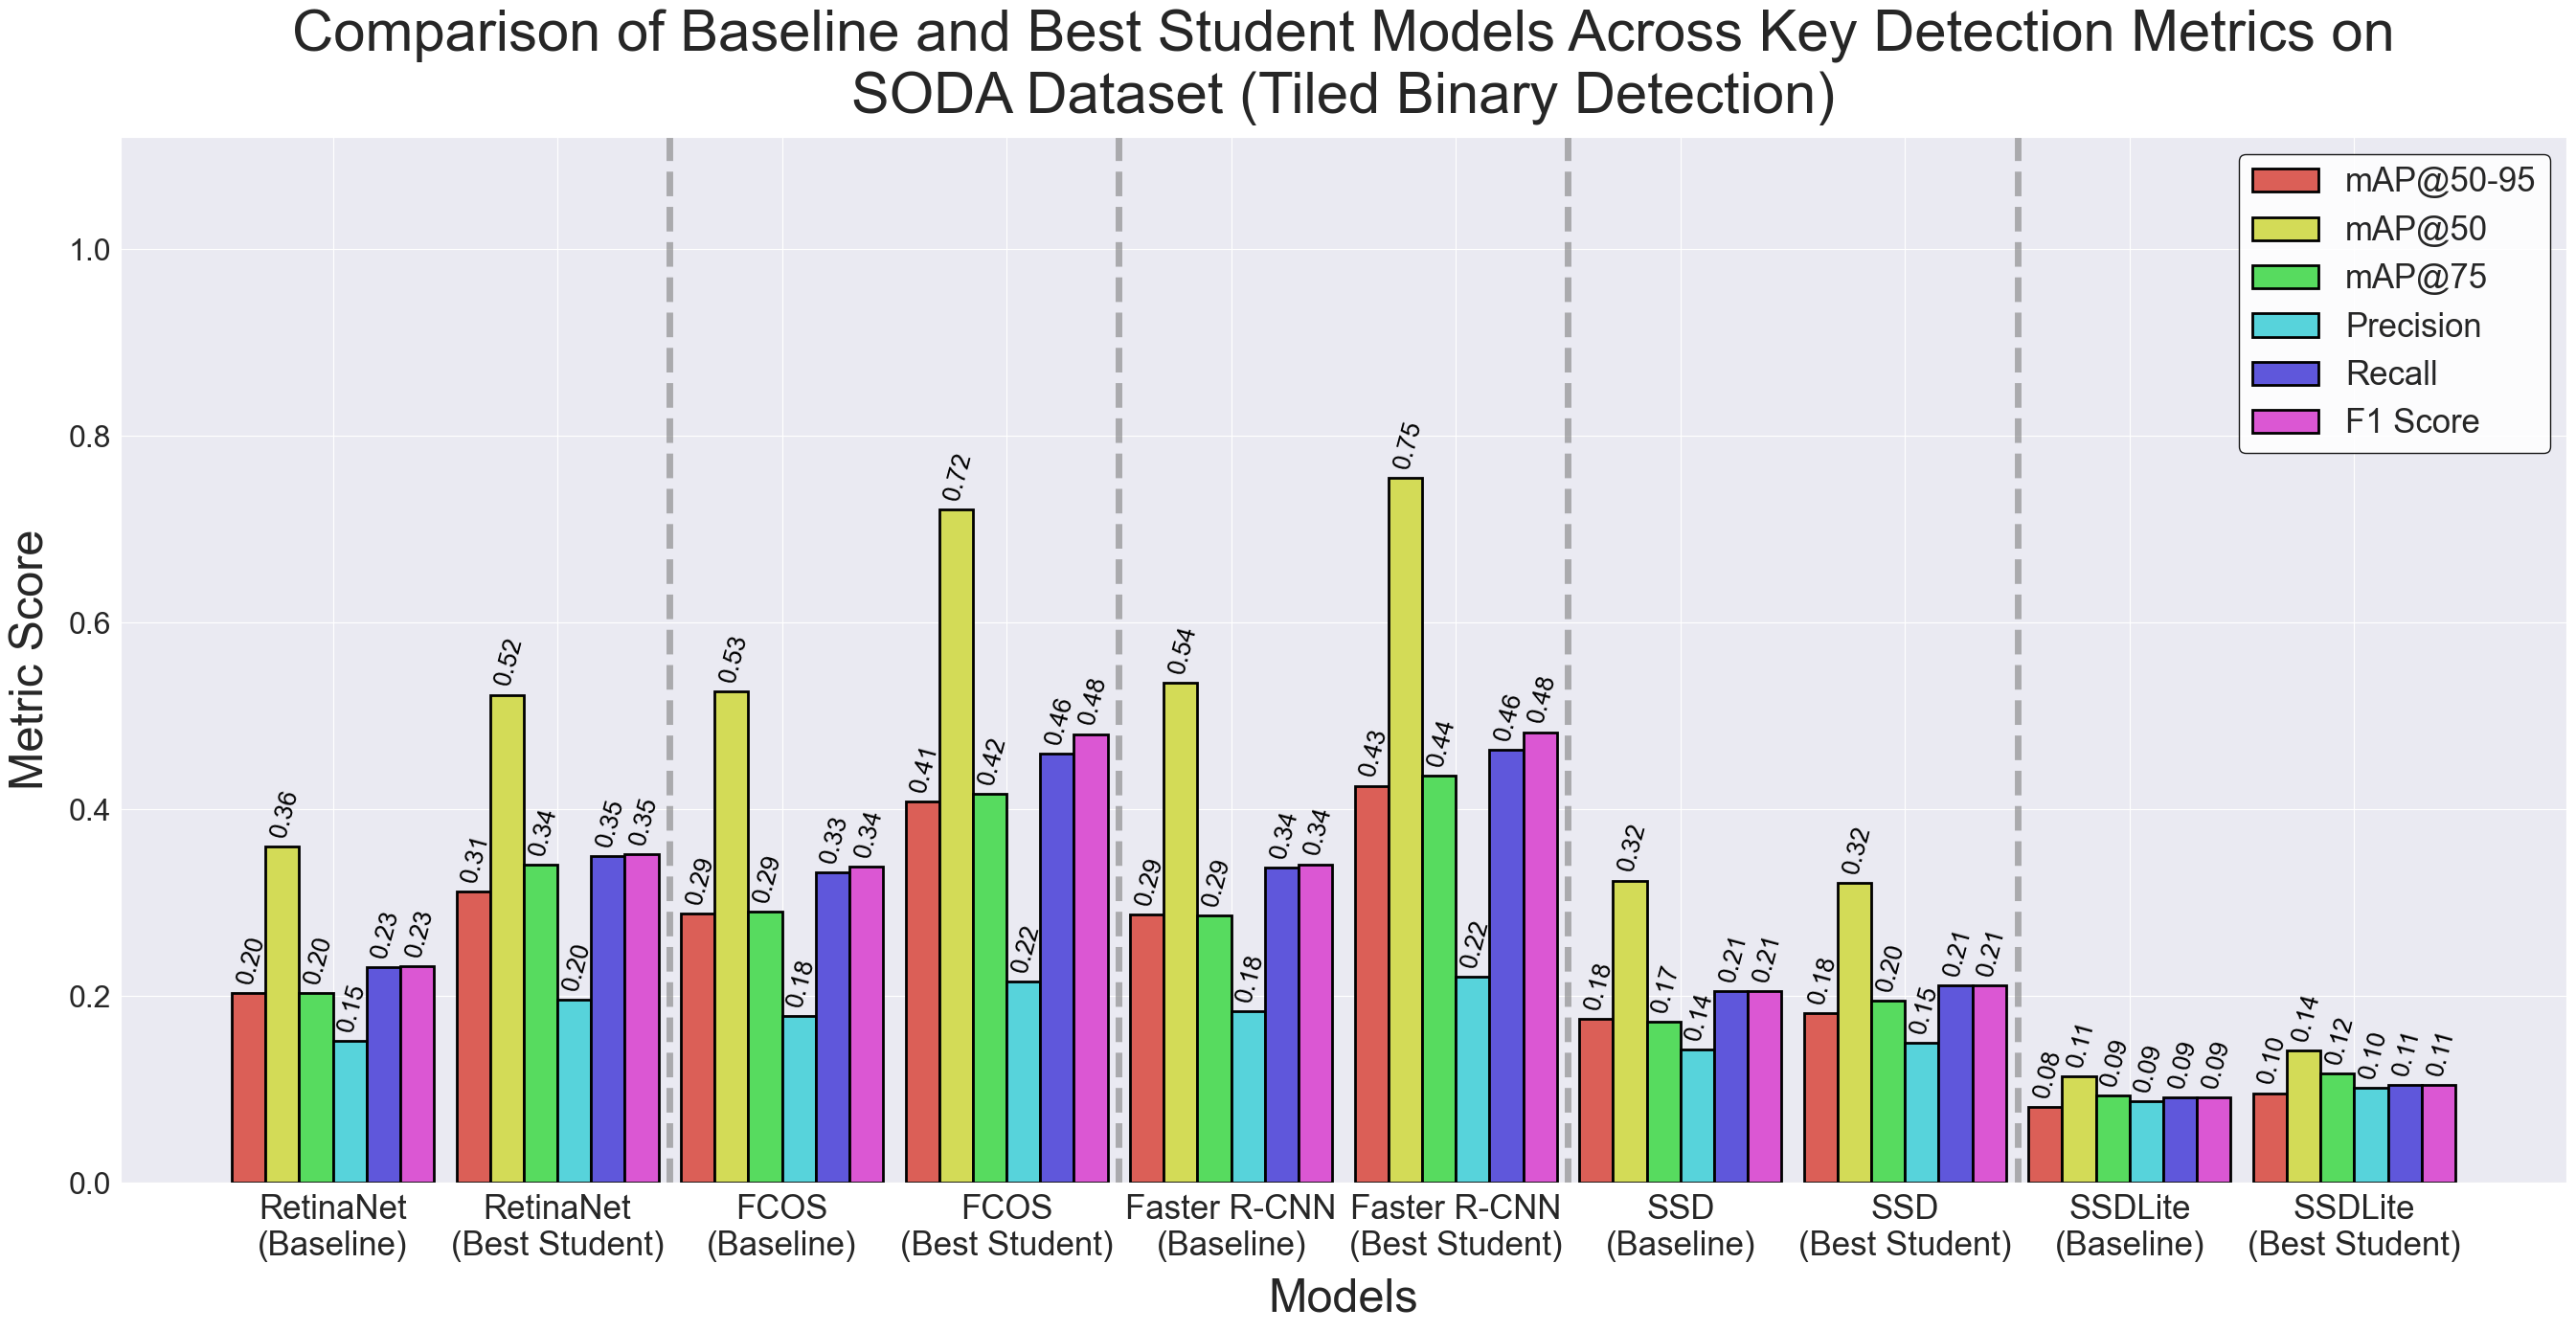

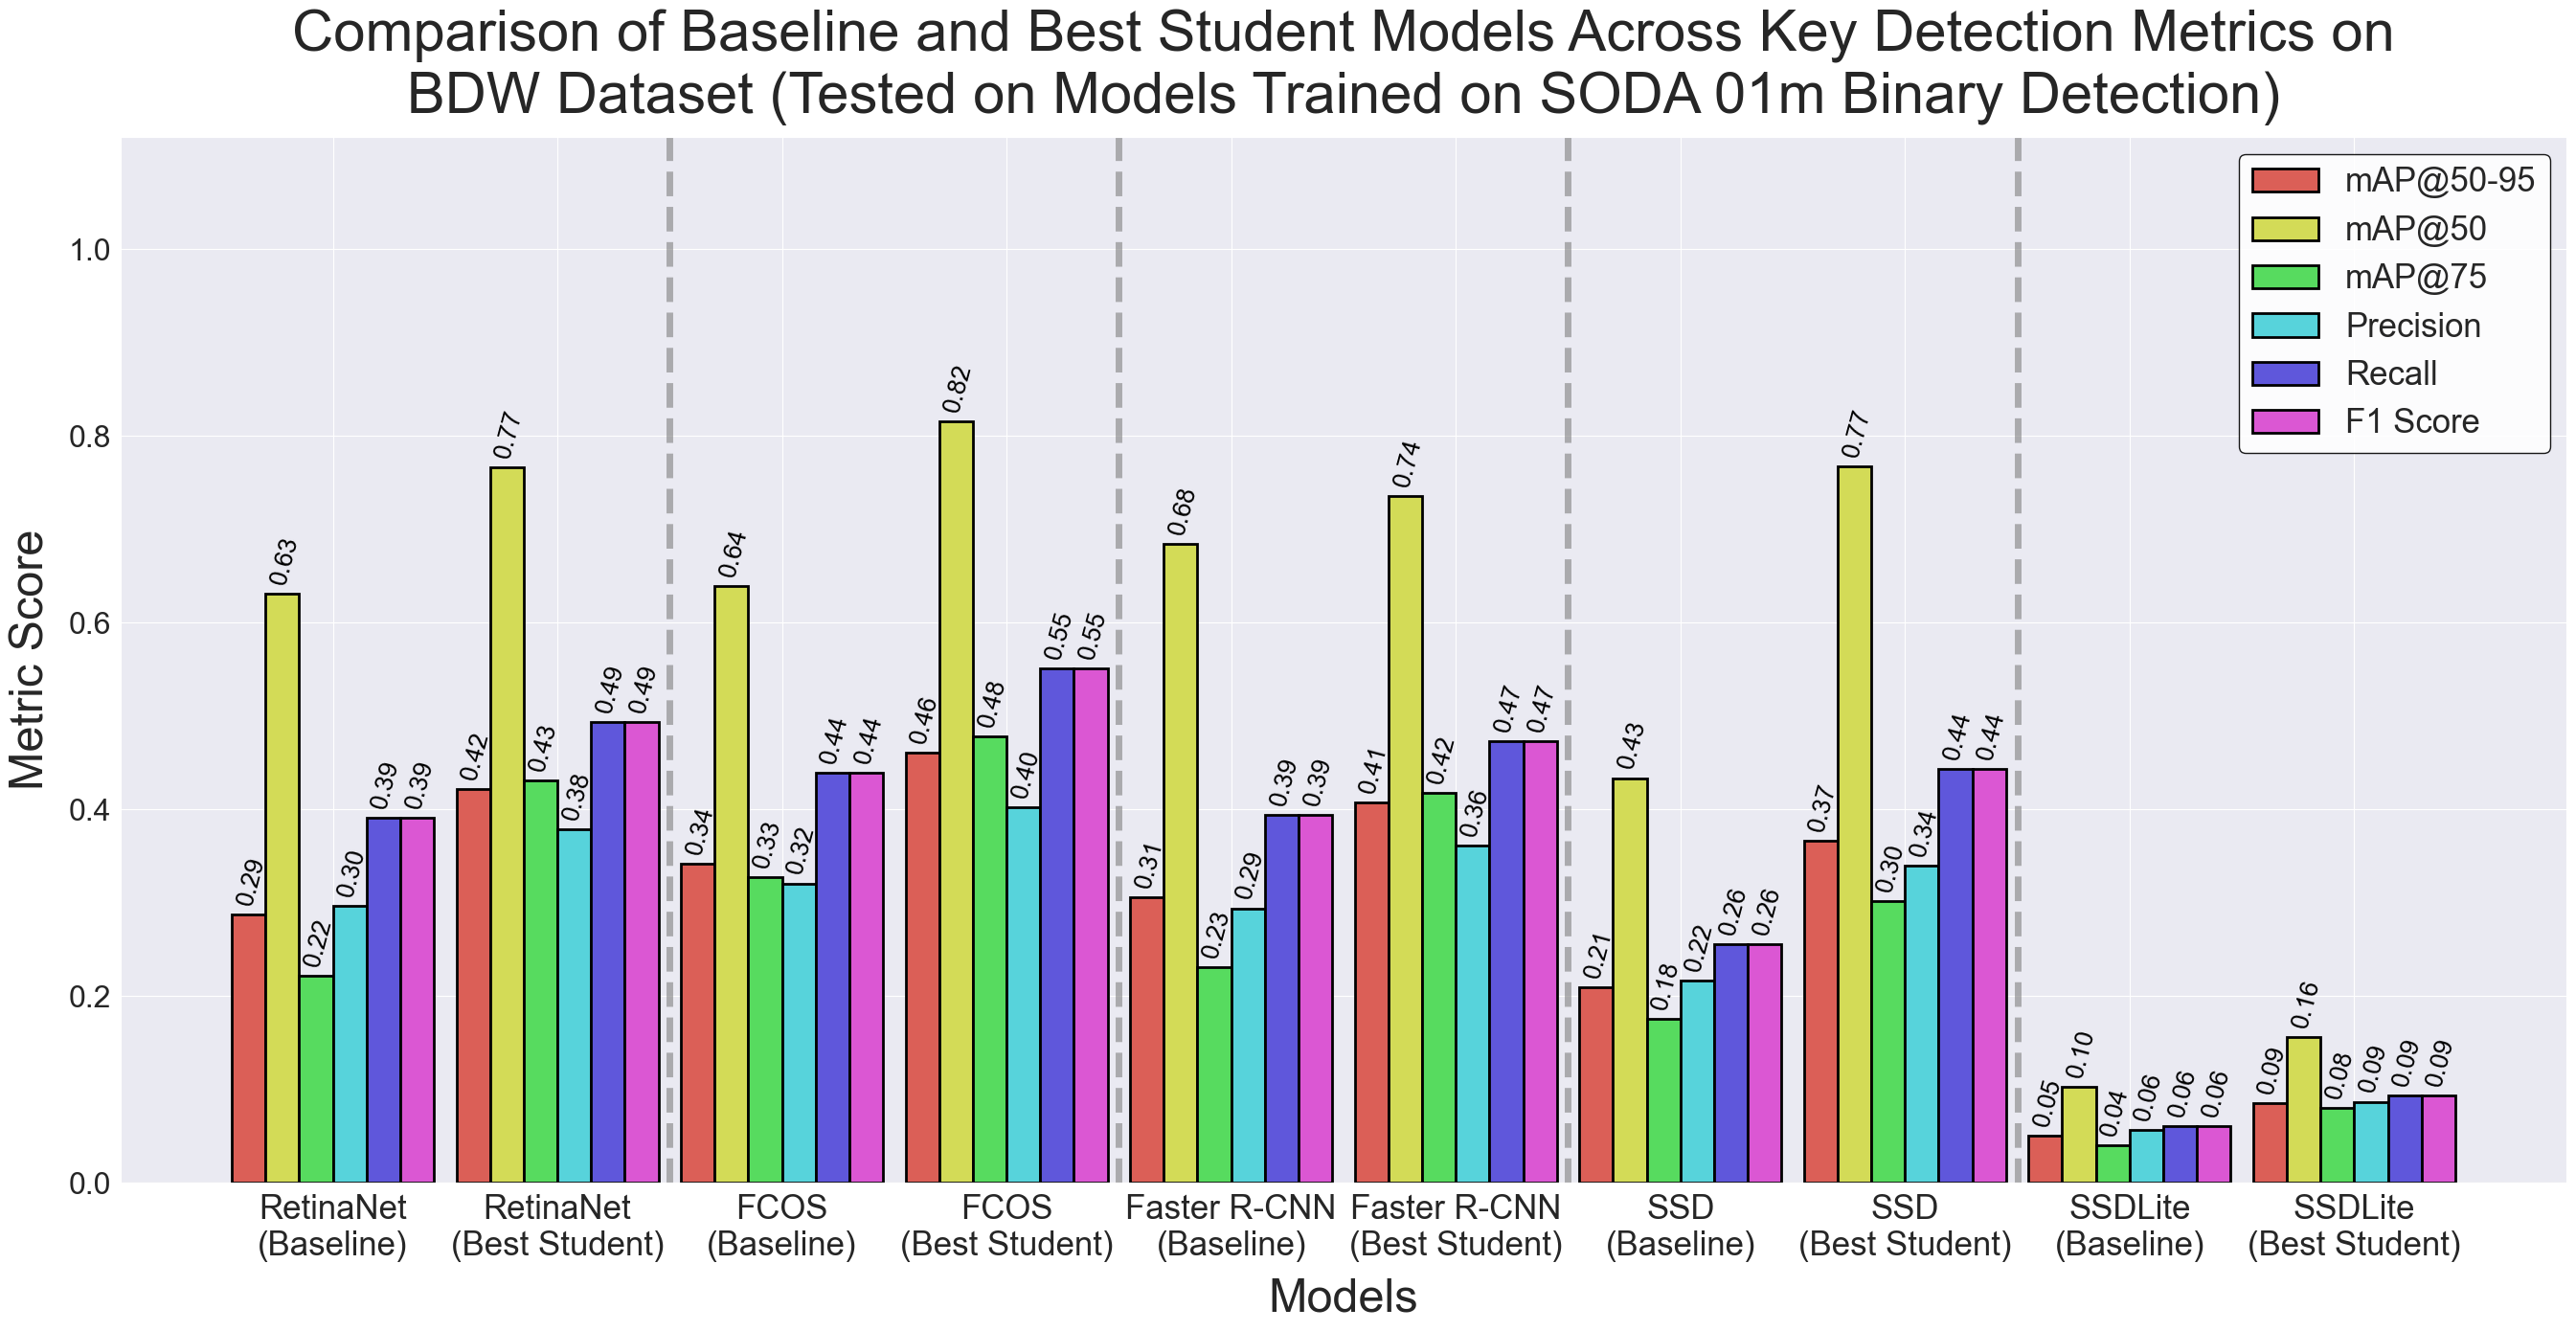

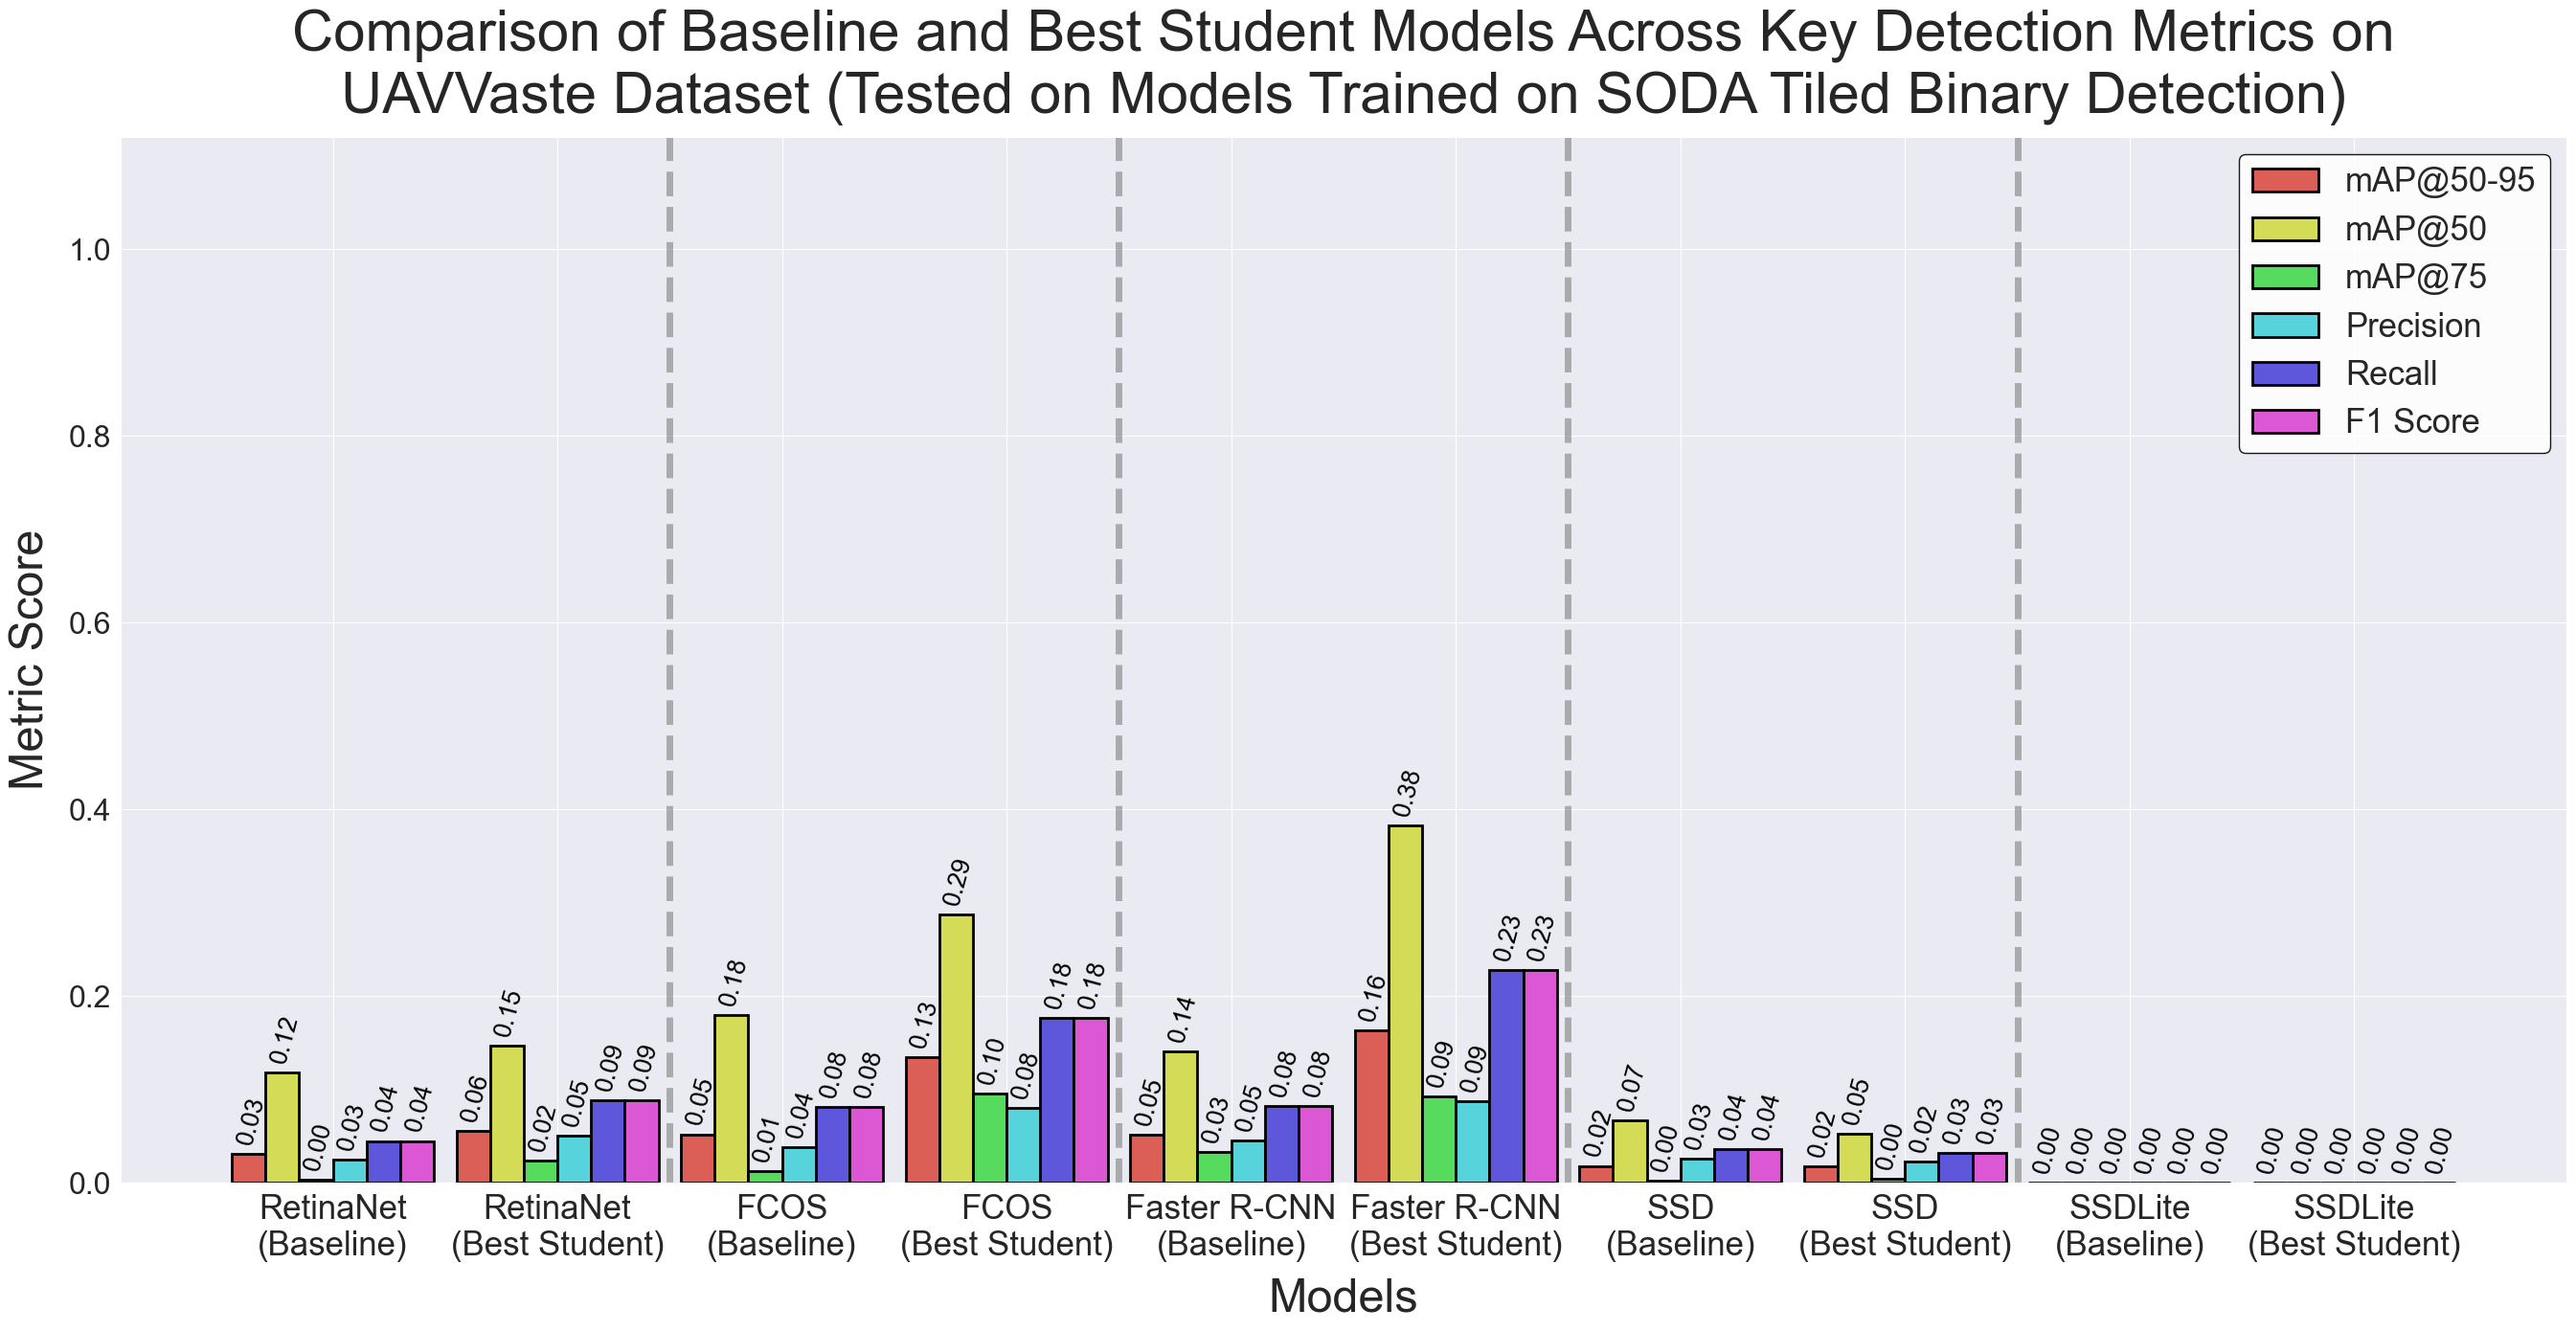

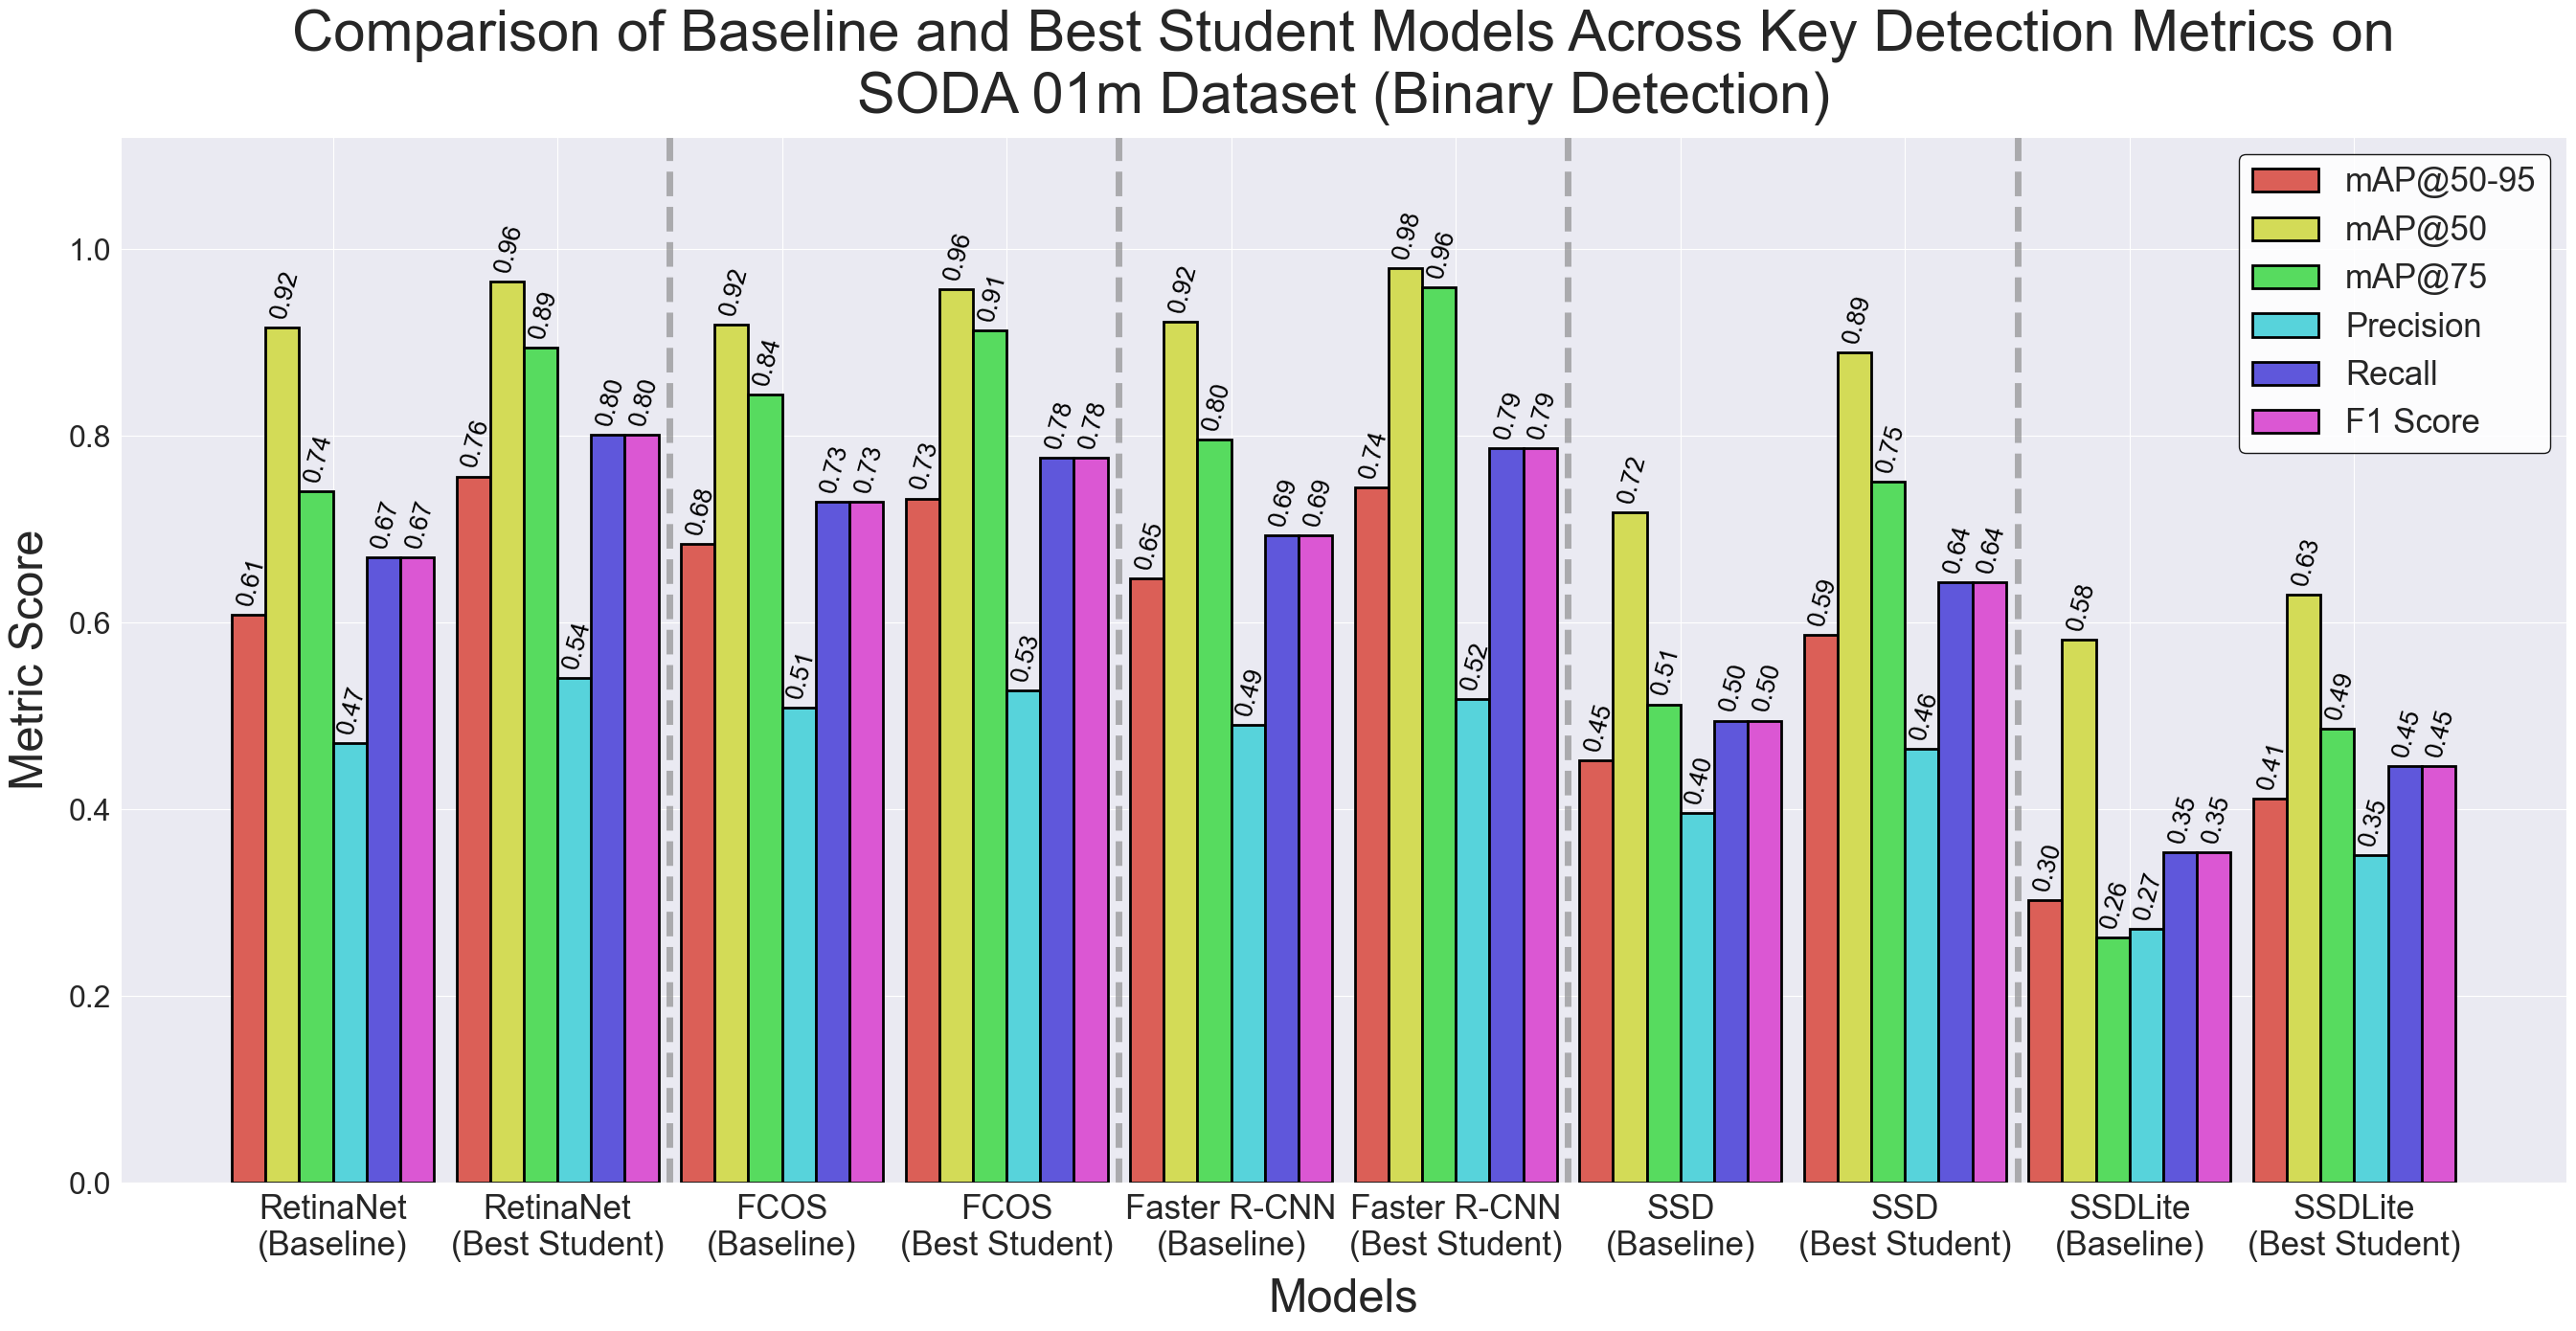

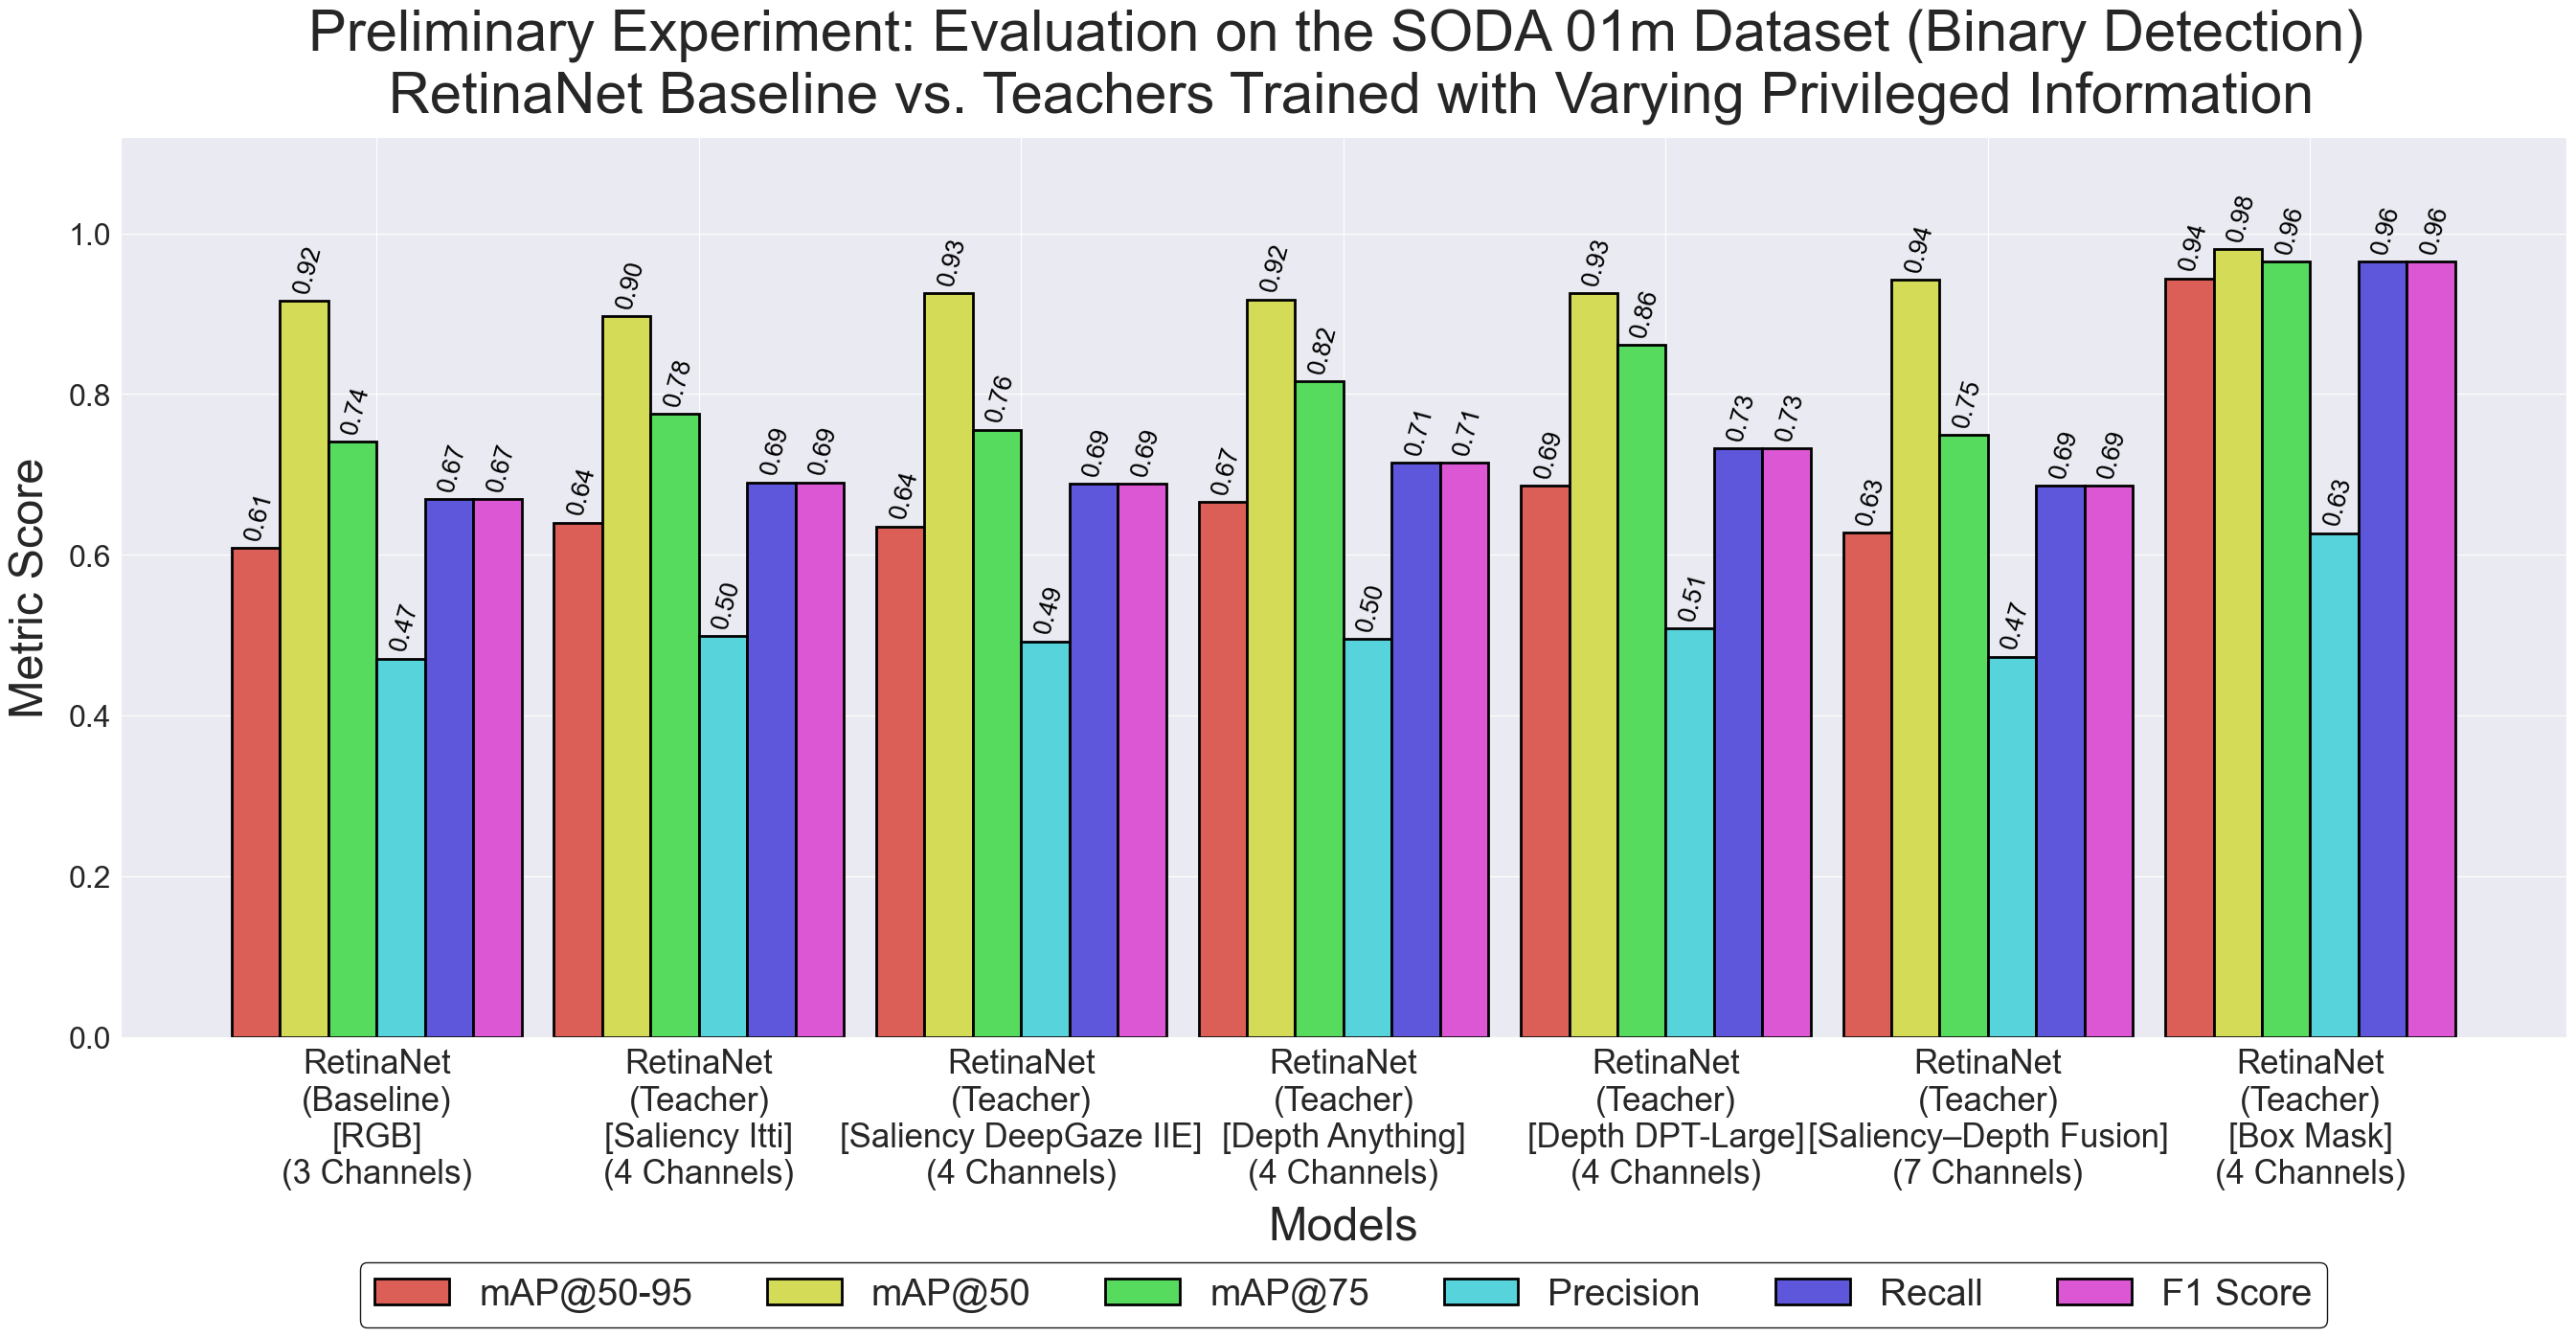

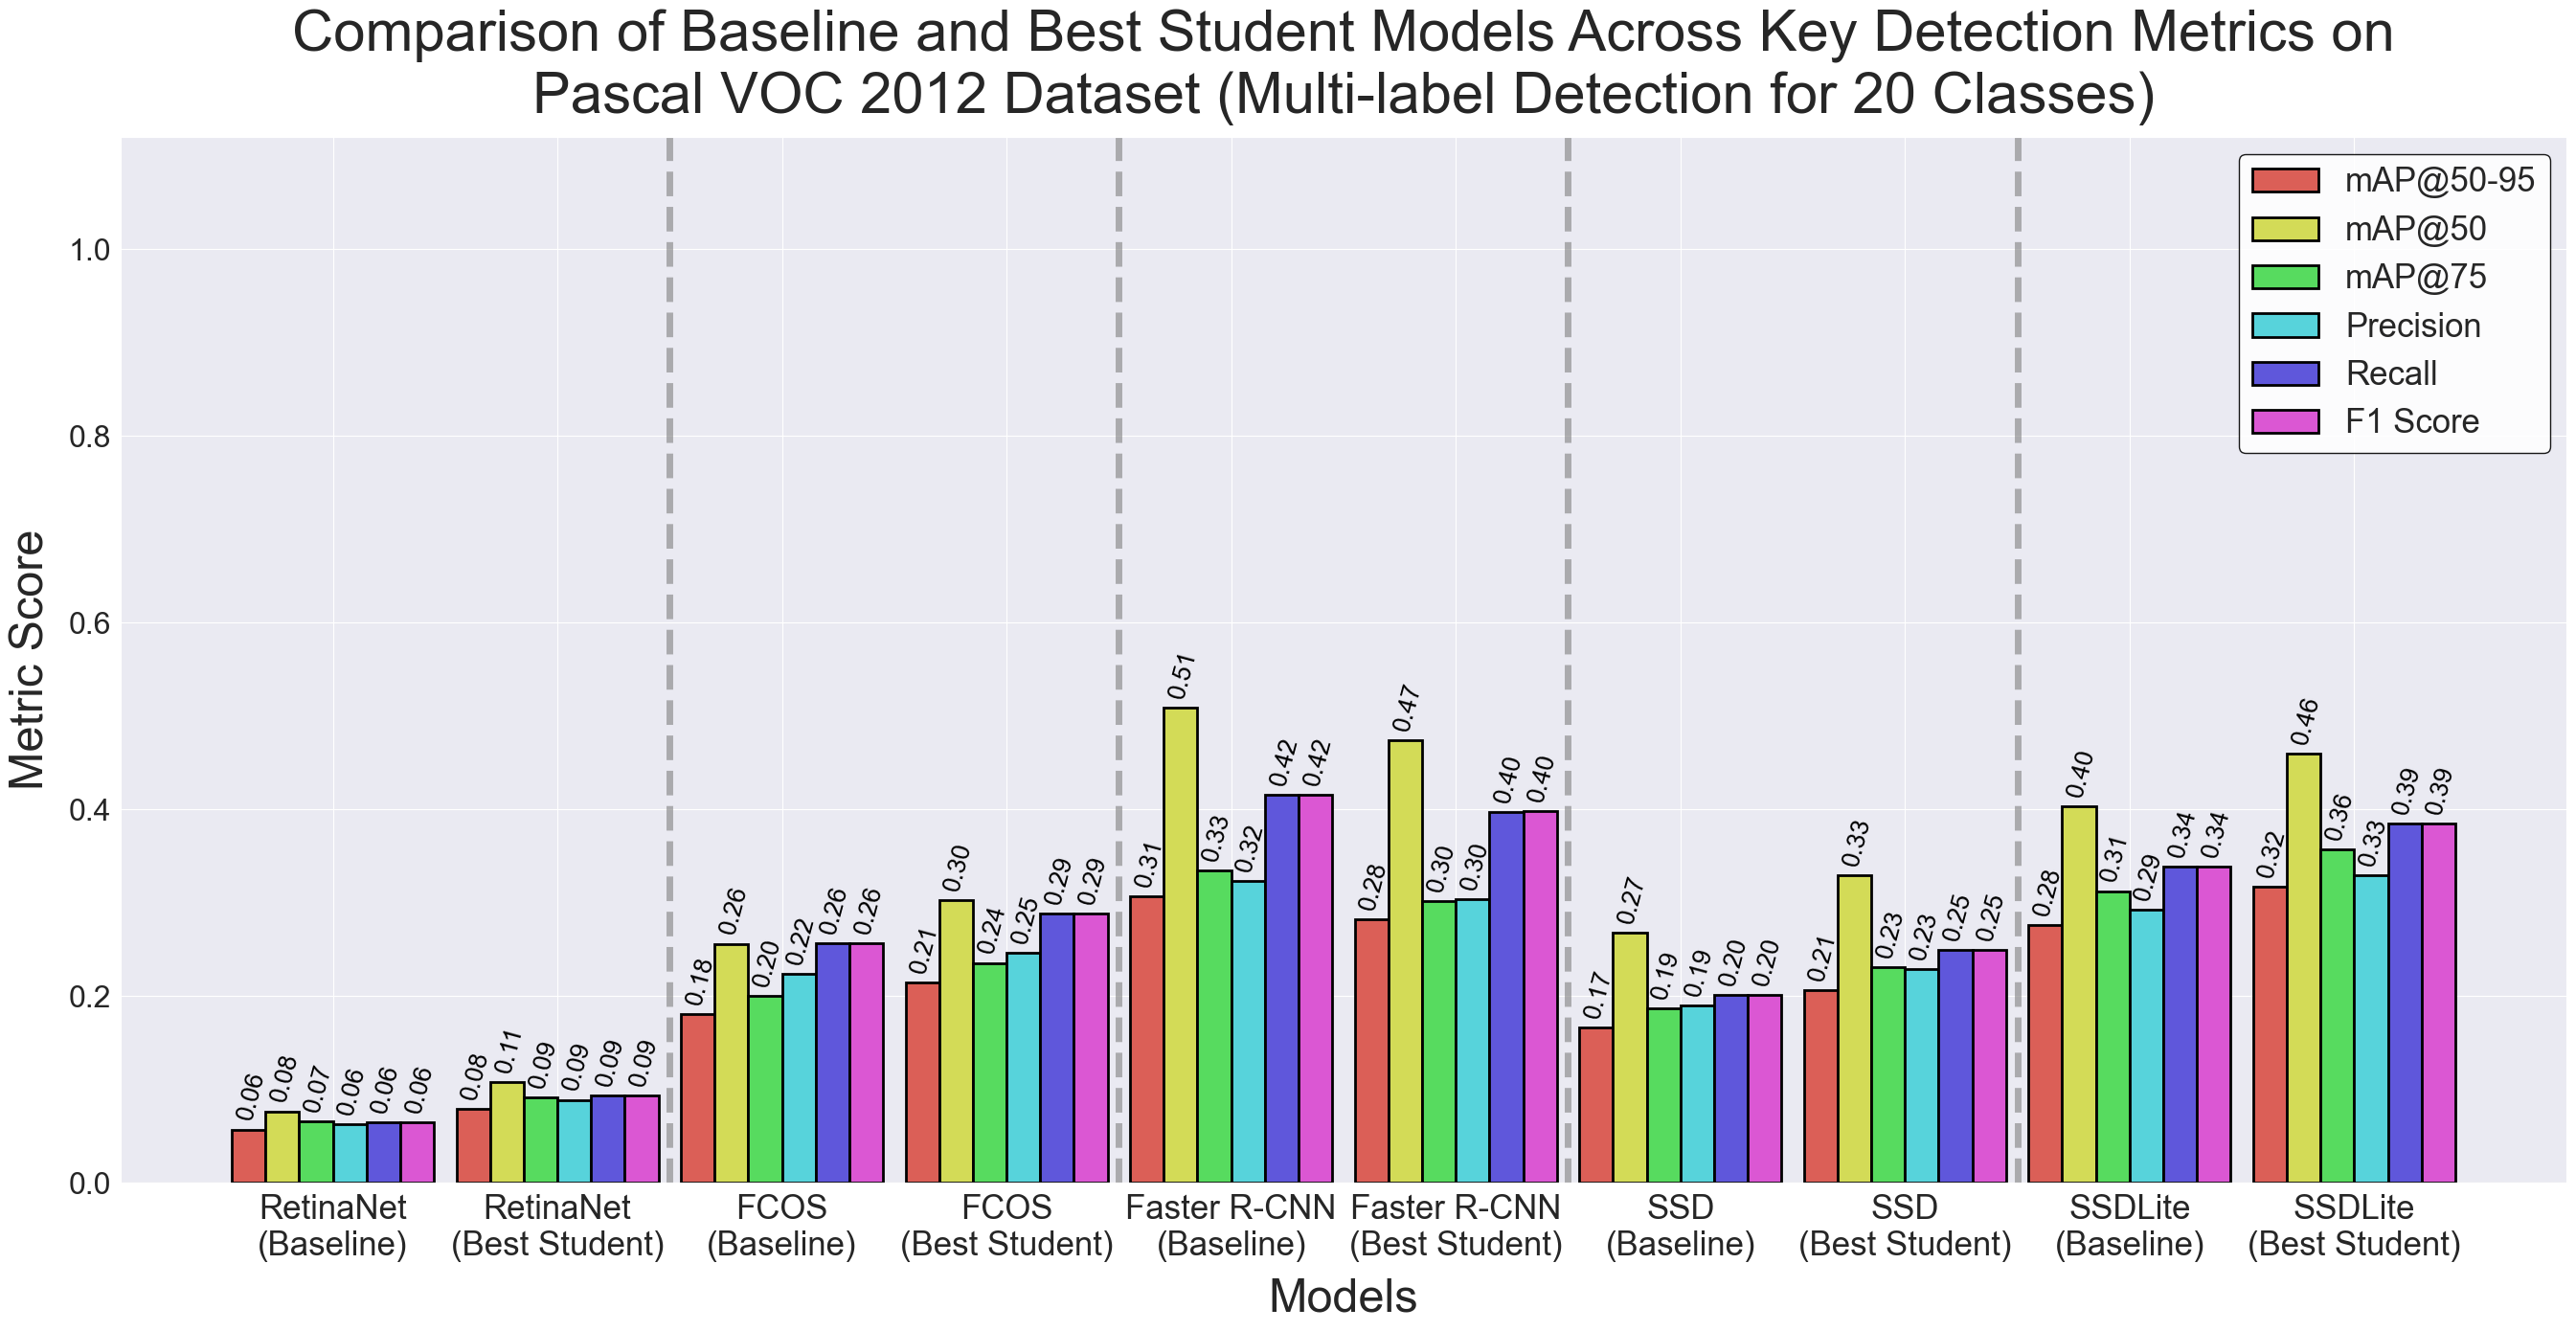

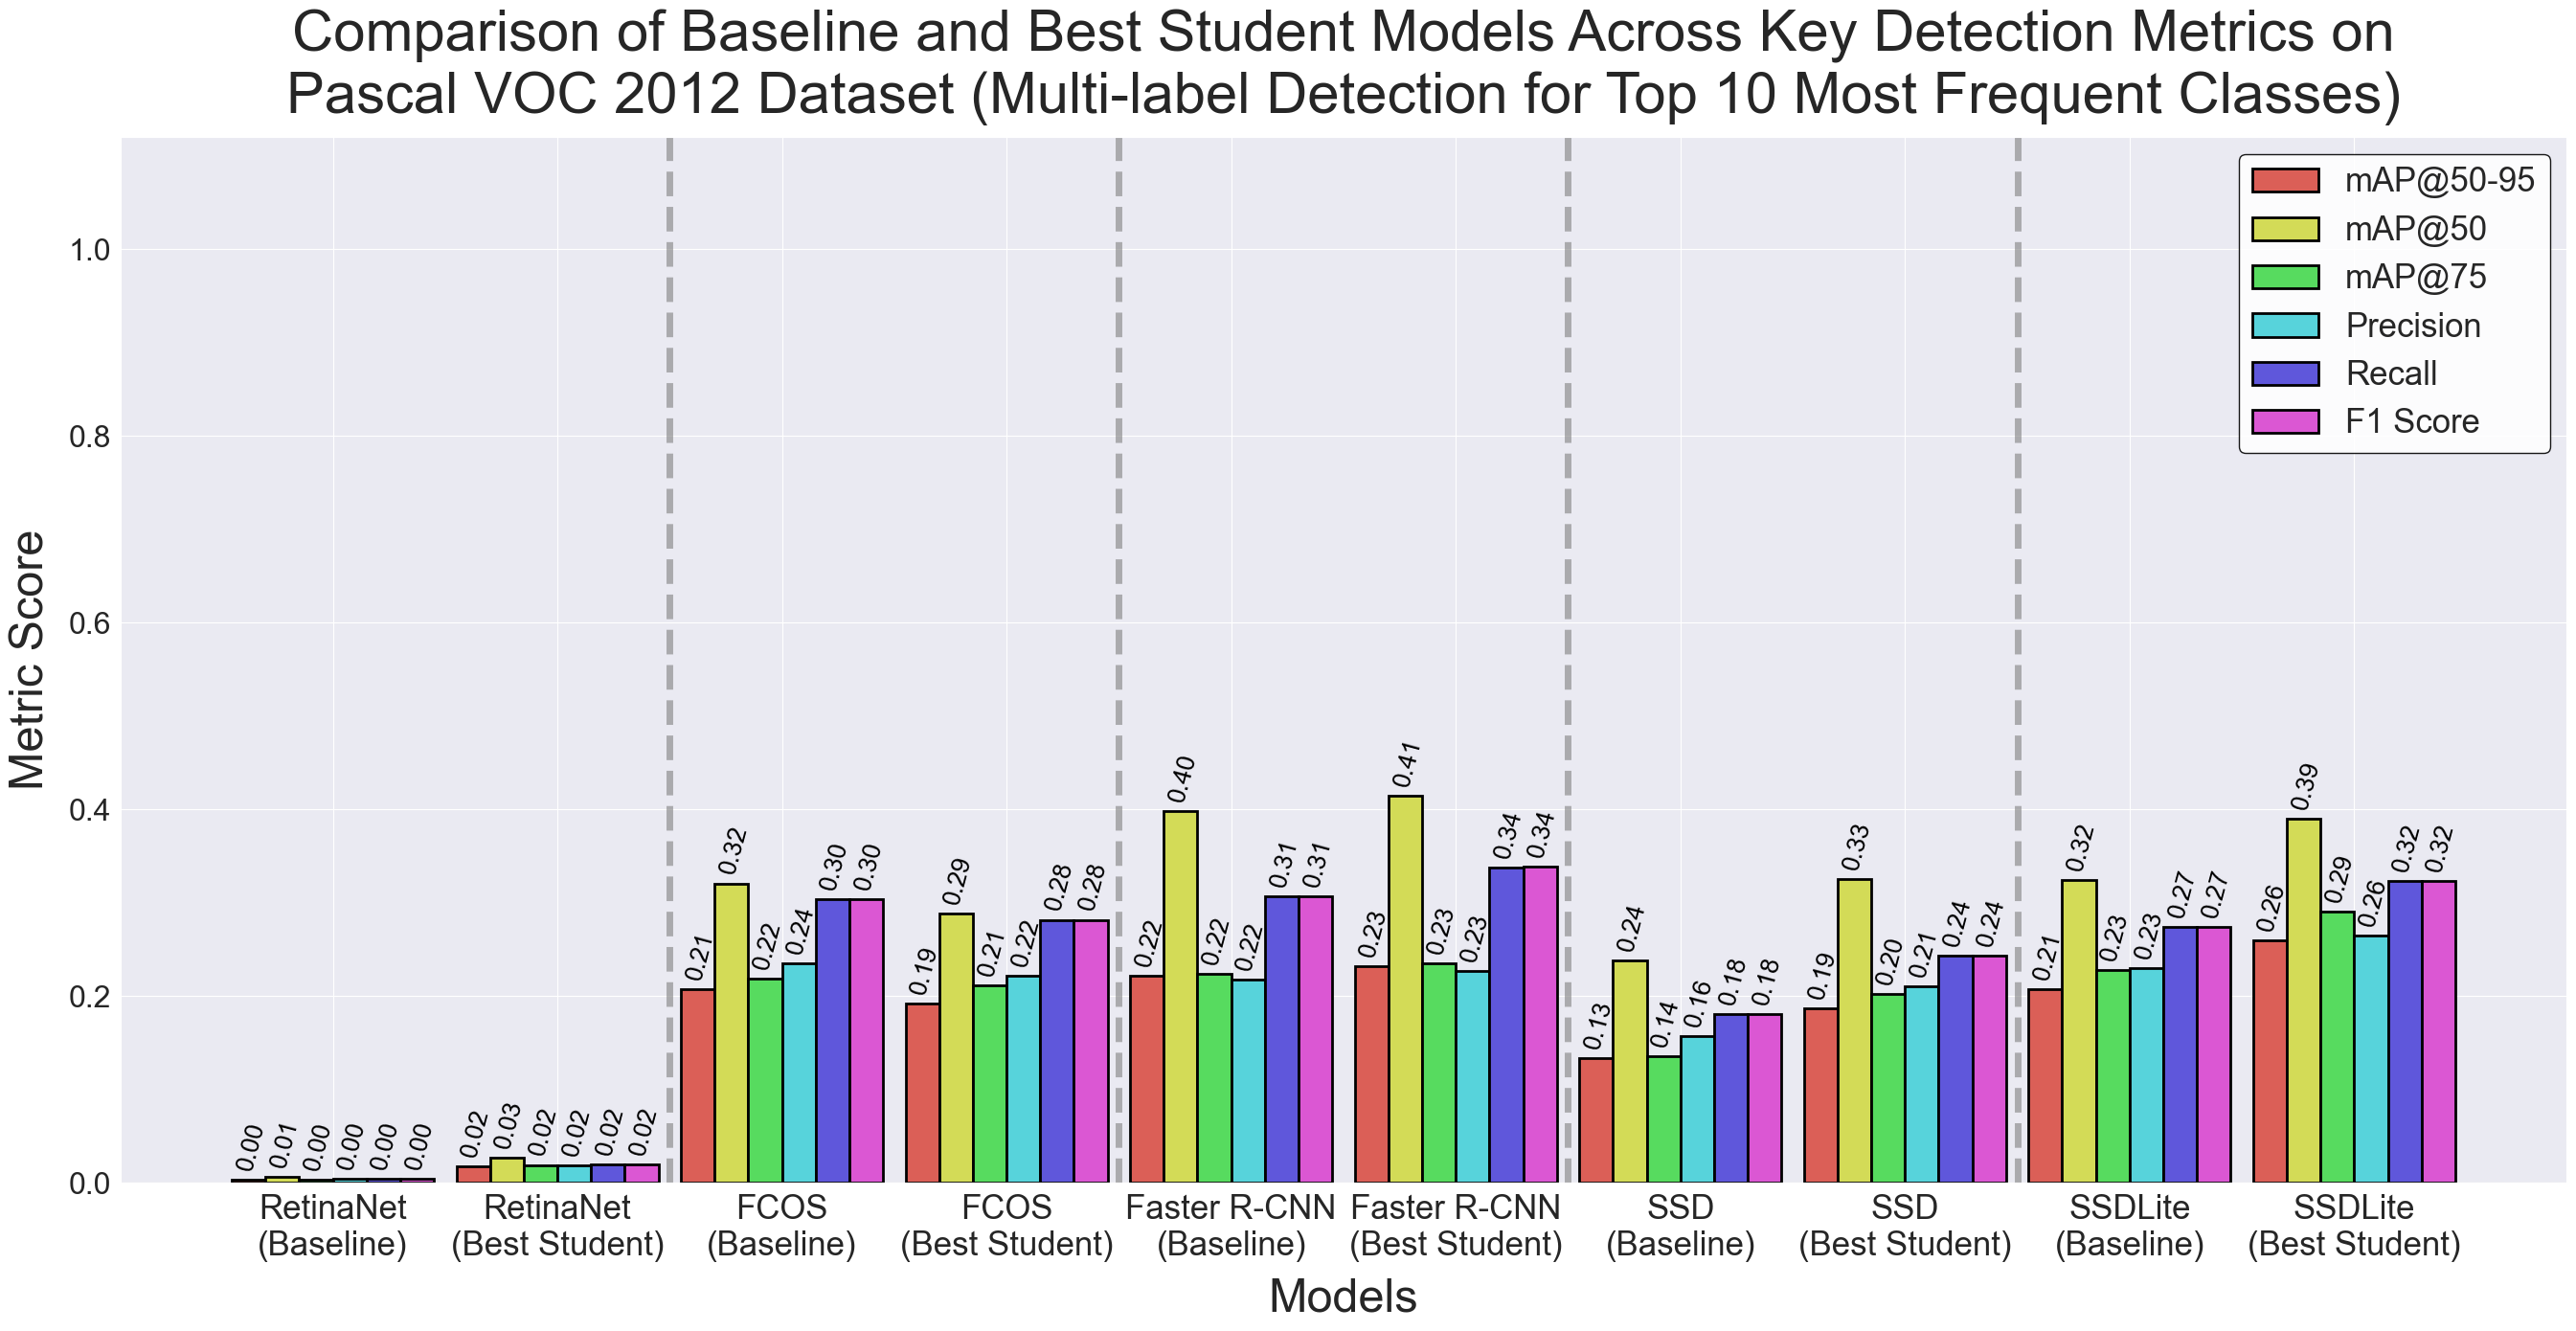

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# import matplotlib.font_manager as fm

# Load Lato font from local folder
# Paths for regular and bold fonts
# lato_regular_path = os.path.join("Lato", "Lato-Regular.ttf")
# lato_bold_path = os.path.join("Lato", "Lato-Bold.ttf")

# # FontProperties objects
# lato_font = fm.FontProperties(fname=lato_regular_path)
# lato_bold_font = fm.FontProperties(fname=lato_bold_path)


# # Register Lato as the default font globally
# plt.rcParams["font.family"] = lato_font.get_name()


# Dictionary of models and paths
MODEL_NAMES = [
        'SODA_Dataset_Tiled_Multi',
        'SODA_Dataset_Tiled_Single',
        'BDW_Dataset_Test2_Single', 
        'UAVVASTE_Dataset_Test_Single',
        'PascalVOC2012'
        'PascalVOC2012_10_Classes'
]
TITLES = [
    "SODA Dataset (Tiled Multi-label Detection)",
    "SODA Dataset (Tiled Binary Detection)",
    "BDW Dataset (Tested on Models Trained on SODA 01m Binary Detection)",
    "UAVVaste Dataset (Tested on Models Trained on SODA Tiled Binary Detection)",
    "Pascal VOC 2012 Dataset (Multi-label Detection for 20 Classes)",
    "Pascal VOC 2012 Dataset (Multi-label Detection for Top 10 Most Frequent Classes)"

]

SAVE_FOLDER = '../Assets/'

plotting_dictionary_comparison_soda01m = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary_student1"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/SODA 01m/FCOS/FCOS_rgb_binary1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/SODA 01m/FCOS/FCOS_rgb_binary_student1"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_binary1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_binary_student1"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SODA 01m/SSD/SSD_rgb_binary1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SODA 01m/SSD/SSD_rgb_binary_student1"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SODA 01m/SSDLite/SSDLite_rgb_binary1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SODA 01m/SSDLite/SSDLite_rgb_binary_student1"},
]

metrics = ["mAP", "mAP@50", "mAP@75", "mAR@1", "mAR@10", "mAR@100", "Precision", "Recall", "F1 Score"]
metric_labels = {
    "mAP": "mAP@50-95",
    "mAP@50": "mAP@50",
    "mAP@75": "mAP@75",
    "mAR@1": "mAR@1",
    "mAR@10": "mAR@10",
    "mAR@100": "mAR@100",
    "Precision": "Precision",
    "Recall": "Recall",
    "F1 Score": "F1 Score"
}

metrics2 = ["mAP", "mAP@50", "mAP@75", "Precision", "Recall", "F1 Score"]
metric_labels2 = {
    "mAP": "mAP@50-95",
    "mAP@50": "mAP@50",
    "mAP@75": "mAP@75",
    "Precision": "Precision",
    "Recall": "Recall",
    "F1 Score": "F1 Score"
}

def load_and_plot_bar(plotting_dictionary, metrics, metric_labels, title, save_title):
    data = []
    labels = []

    # Read metric files
    for entry in plotting_dictionary:
        prf1_path = os.path.join(entry['path'], "precision_recall_f1_metrics.csv")
        map_path = os.path.join(entry['path'], "coco_mAP.csv")
        values = []

        if os.path.exists(map_path):
            df_map = pd.read_csv(map_path)
            values.extend([df_map.iloc[0]["map"], df_map.iloc[0]["map_50"], df_map.iloc[0]["map_75"],
                           df_map.iloc[0]["mar_1"], df_map.iloc[0]["mar_10"], df_map.iloc[0]["mar_100"]])
        else:
            print(f"Warning: {map_path} not found")
            values.extend([None] * 6)

        if os.path.exists(prf1_path):
            df = pd.read_csv(prf1_path)
            mean_values = df[df['Class'] == "Mean"][["Precision", "Recall", "F1 Score"]].values.flatten()
            values.extend(mean_values)
        else:
            print(f"Warning: {prf1_path} not found")
            values.extend([None] * 3)

        data.append(values)
        labels.append(entry['title'])

    data = np.array(data, dtype=float)

    # Aesthetics
    sns.set_style("darkgrid")
    colors = sns.color_palette("hls", len(metrics))
    fig, ax = plt.subplots(figsize=(27, 14))  # Large figure for dissertation

    x = np.arange(len(labels))
    width = 0.15  # Increased bar width

    for i, (metric, color) in enumerate(zip(metrics, colors)):
        offset = (i - len(metrics) / 2) * width + width / 2
        bars = ax.bar(x + offset, data[:, i], width,
                      label=metric_labels[metric],
                      color=color, edgecolor='black', linewidth=2)

        # Bar annotations directly on the bars
        for bar in bars:
            yval = bar.get_height()
            if not np.isnan(yval):  # Only add annotation if bar height is greater than zero
                ax.text(bar.get_x() + bar.get_width() / 2 + 0.012, yval + 0.007,  # Position text just above the bar
                        f"{yval:.2f}", ha='center', va='bottom',  # Adjusted for text to appear on top of the bar
                        fontsize=19, color='black', rotation=75)  # Optional: to ensure readability, text in black

    # Optional vertical dividers
    for i in range(1, len(labels)):
        if i % 2 == 0:
            ax.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=5, alpha=0.6)

    # Axis Labels & Title
    ax.set_xlabel("Models", fontsize=35, labelpad=12)
    ax.set_ylabel("Metric Score", fontsize=35, labelpad=12)
    ax.set_title(title, fontsize=43, pad=18)

    # Tick Labels
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=25, multialignment='center', rotation=0, ha='center', va='top')
    ax.tick_params(axis='y', labelsize=23)
    ax.tick_params(axis='x', width=1.2, length=5)

    # Axis limits
    ax.set_ylim(0, 1.12)

    # Legend in-plot (top right with contrast)
    ax.legend(fontsize=25, loc='upper right', frameon=True, framealpha=0.9,
              facecolor='white', edgecolor='black')

    # Layout adjustments
    plt.subplots_adjust(left=0.07, right=0.96, top=0.9, bottom=0.25)
    plt.tight_layout()

    # Save
    output_path = os.path.join(SAVE_FOLDER, 'figures', save_title)
    plt.savefig(output_path,  bbox_inches='tight')
    plt.show()


def load_and_plot_bar2(plotting_dictionary, metrics, metric_labels, title, save_title):
    data = []
    labels = []

    # Read metric files
    for entry in plotting_dictionary:
        prf1_path = os.path.join(entry['path'], "precision_recall_f1_metrics.csv")
        map_path = os.path.join(entry['path'], "coco_mAP.csv")
        values = []

        if os.path.exists(map_path):
            df_map = pd.read_csv(map_path)
            values.extend([df_map.iloc[0]["map"], df_map.iloc[0]["map_50"], df_map.iloc[0]["map_75"],
                           df_map.iloc[0]["mar_1"], df_map.iloc[0]["mar_10"], df_map.iloc[0]["mar_100"]])
        else:
            print(f"Warning: {map_path} not found")
            values.extend([None] * 6)

        if os.path.exists(prf1_path):
            df = pd.read_csv(prf1_path)
            mean_values = df[df['Class'] == "Mean"][["Precision", "Recall", "F1 Score"]].values.flatten()
            values.extend(mean_values)
        else:
            print(f"Warning: {prf1_path} not found")
            values.extend([None] * 3)

        data.append(values)
        labels.append(entry['title'])

    data = np.array(data, dtype=float)

    # Aesthetics
    sns.set_style("darkgrid")
    colors = sns.color_palette("hls", len(metrics))
    fig, ax = plt.subplots(figsize=(27, 14))  # Large figure for dissertation

    x = np.arange(len(labels))
    width = 0.15  # Increased bar width

    for i, (metric, color) in enumerate(zip(metrics, colors)):
        offset = (i - len(metrics) / 2) * width + width / 2
        bars = ax.bar(x + offset, data[:, i], width,
                      label=metric_labels[metric],
                      color=color, edgecolor='black', linewidth=2)

        # Bar annotations directly on the bars
        for bar in bars:
            yval = bar.get_height()
            if not np.isnan(yval):  # Only add annotation if bar height is greater than zero
                ax.text(bar.get_x() + bar.get_width() / 2 + 0.012, yval + 0.007,  # Position text just above the bar
                        f"{yval:.2f}", ha='center', va='bottom',  # Adjusted for text to appear on top of the bar
                        fontsize=19, color='black', rotation=75)  # Optional: to ensure readability, text in black

    # Optional vertical dividers
    # for i in range(1, len(labels)):
    #     if i % 2 == 0:
    #         ax.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=5, alpha=0.6)

    # Axis Labels & Title
    ax.set_xlabel("Models", fontsize=35, labelpad=12)
    ax.set_ylabel("Metric Score", fontsize=35, labelpad=12)
    ax.set_title(title, fontsize=43, pad=18)

    # Tick Labels
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=25, multialignment='center', rotation=0, ha='center', va='top')
    ax.tick_params(axis='y', labelsize=23)
    ax.tick_params(axis='x', width=1.2, length=5)

    # Axis limits
    ax.set_ylim(0, 1.12)

    # Legend in-plot (top right with contrast)
    ax.legend(fontsize=28, loc='upper center', frameon=True, framealpha=0.9,
              facecolor='white', edgecolor='black', bbox_to_anchor=(0.5, -0.23), ncol=len(metrics))

    # Layout adjustments
    plt.subplots_adjust(left=0.07, right=0.96, top=0.9, bottom=0.25)
    plt.tight_layout()

    # Save
    output_path = os.path.join(SAVE_FOLDER, 'figures', save_title)
    plt.savefig(output_path,  bbox_inches='tight')
    plt.show()

plot_title = f"Comparison of Baseline and Best Student Models Across Key Detection Metrics on\n"
MODEL_NAME = 'SODA_Dataset_Tiled_Multi'
plotting_dictionary_comparison_soda_multi = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student2"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student1"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student2"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1"},
]
load_and_plot_bar(plotting_dictionary_comparison_soda_multi, metrics2, metric_labels2, plot_title+TITLES[0], TITLES[0])

MODEL_NAME = 'SODA_Dataset_Tiled_Single'
plotting_dictionary_comparison_soda_single = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student1"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student2"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student2"},
]
load_and_plot_bar(plotting_dictionary_comparison_soda_single, metrics2, metric_labels2, plot_title+TITLES[1], TITLES[1])

MODEL_NAME = 'BDW_Dataset_Test2_Single'
plotting_dictionary_comparison_bdw = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student2"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student2"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student2"},
]
load_and_plot_bar(plotting_dictionary_comparison_bdw, metrics2, metric_labels2, plot_title+TITLES[2], TITLES[2])

MODEL_NAME = 'UAVVASTE_Dataset_Test_Single'
plotting_dictionary_comparison_uavvaste = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student1"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student1"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1"},
]
load_and_plot_bar(plotting_dictionary_comparison_uavvaste, metrics2, metric_labels2, plot_title+TITLES[3], TITLES[3])

# Plot static SODA 01m comparison
load_and_plot_bar(
    plotting_dictionary_comparison_soda01m,
    metrics2,
    metric_labels2,
    "Comparison of Baseline and Best Student Models Across Key Detection Metrics on\nSODA 01m Dataset (Binary Detection)",
    "SODA 01m Dataset (Single-label)"
)

plotting_dictionary_preliminary_exp = [
    {'title': "RetinaNet\n(Baseline)\n[RGB]\n(3 Channels)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary1"},
    {'title': "RetinaNet\n(Teacher)\n[Saliency Itti]\n(4 Channels)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary_itti1"},
    {'title': "RetinaNet\n(Teacher)\n[Saliency DeepGaze IIE]\n(4 Channels)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary_deepgaze1"},
    {'title': "RetinaNet\n(Teacher)\n[Depth Anything]\n(4 Channels)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary_depth_anything1"},
    {'title': "RetinaNet\n(Teacher)\n[Depth DPT-Large]\n(4 Channels)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary_dpt_large1"},
    {'title': "RetinaNet\n(Teacher)\n[Saliency–Depth Fusion]\n(7 Channels)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary_saliency_and_depth_fusion1"},
    {'title': "RetinaNet\n(Teacher)\n[Box Mask]\n(4 Channels)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_overlay_box_binary1"},
]

load_and_plot_bar2(
    plotting_dictionary_preliminary_exp,
    metrics2,
    metric_labels2,
    "Preliminary Experiment: Evaluation on the SODA 01m Dataset (Binary Detection) \n RetinaNet Baseline vs. Teachers Trained with Varying Privileged Information",
    "Preliminary Experiment Privileged Information Selection"
)

MODEL_NAME = 'PascalVOC2012'
plotting_dictionary_comparison_pascal_voc = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student1"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student1"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1"},
]
load_and_plot_bar(plotting_dictionary_comparison_pascal_voc, metrics2, metric_labels2, plot_title+TITLES[4], TITLES[4])

MODEL_NAME = 'PascalVOC2012_10_Classes'
plotting_dictionary_comparison_pascal_voc2 = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student1"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student1"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1"},
]
load_and_plot_bar(plotting_dictionary_comparison_pascal_voc2, metrics2, metric_labels2, plot_title+TITLES[5], TITLES[5])

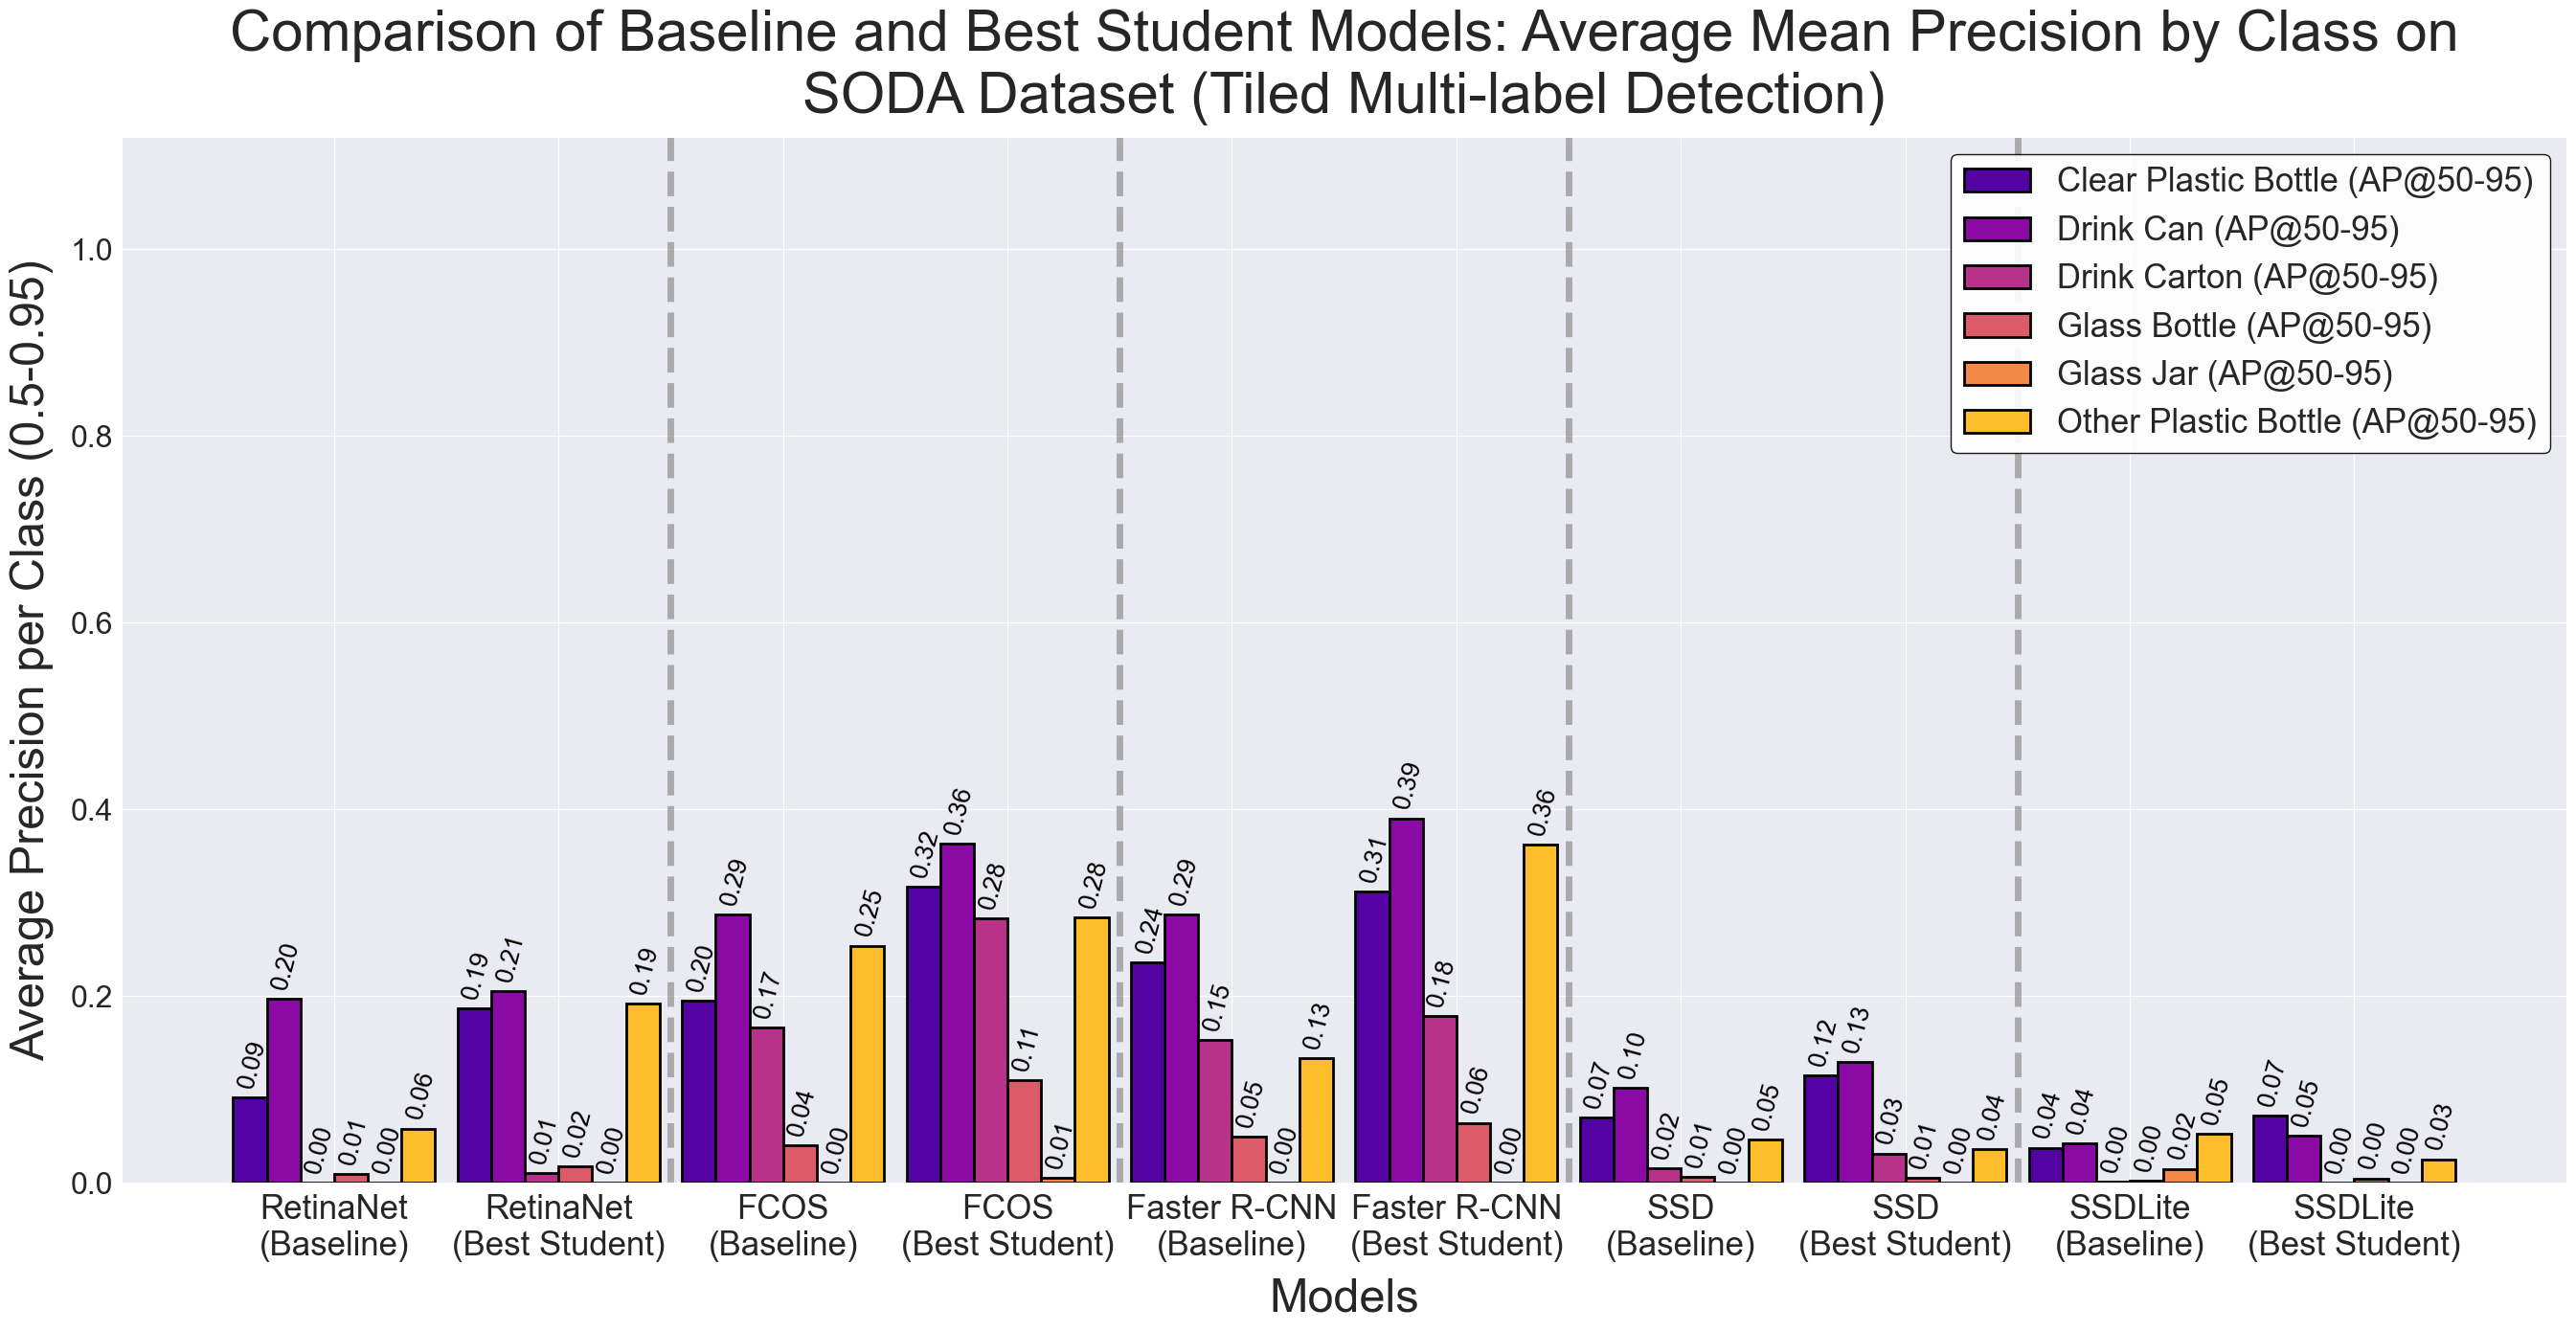

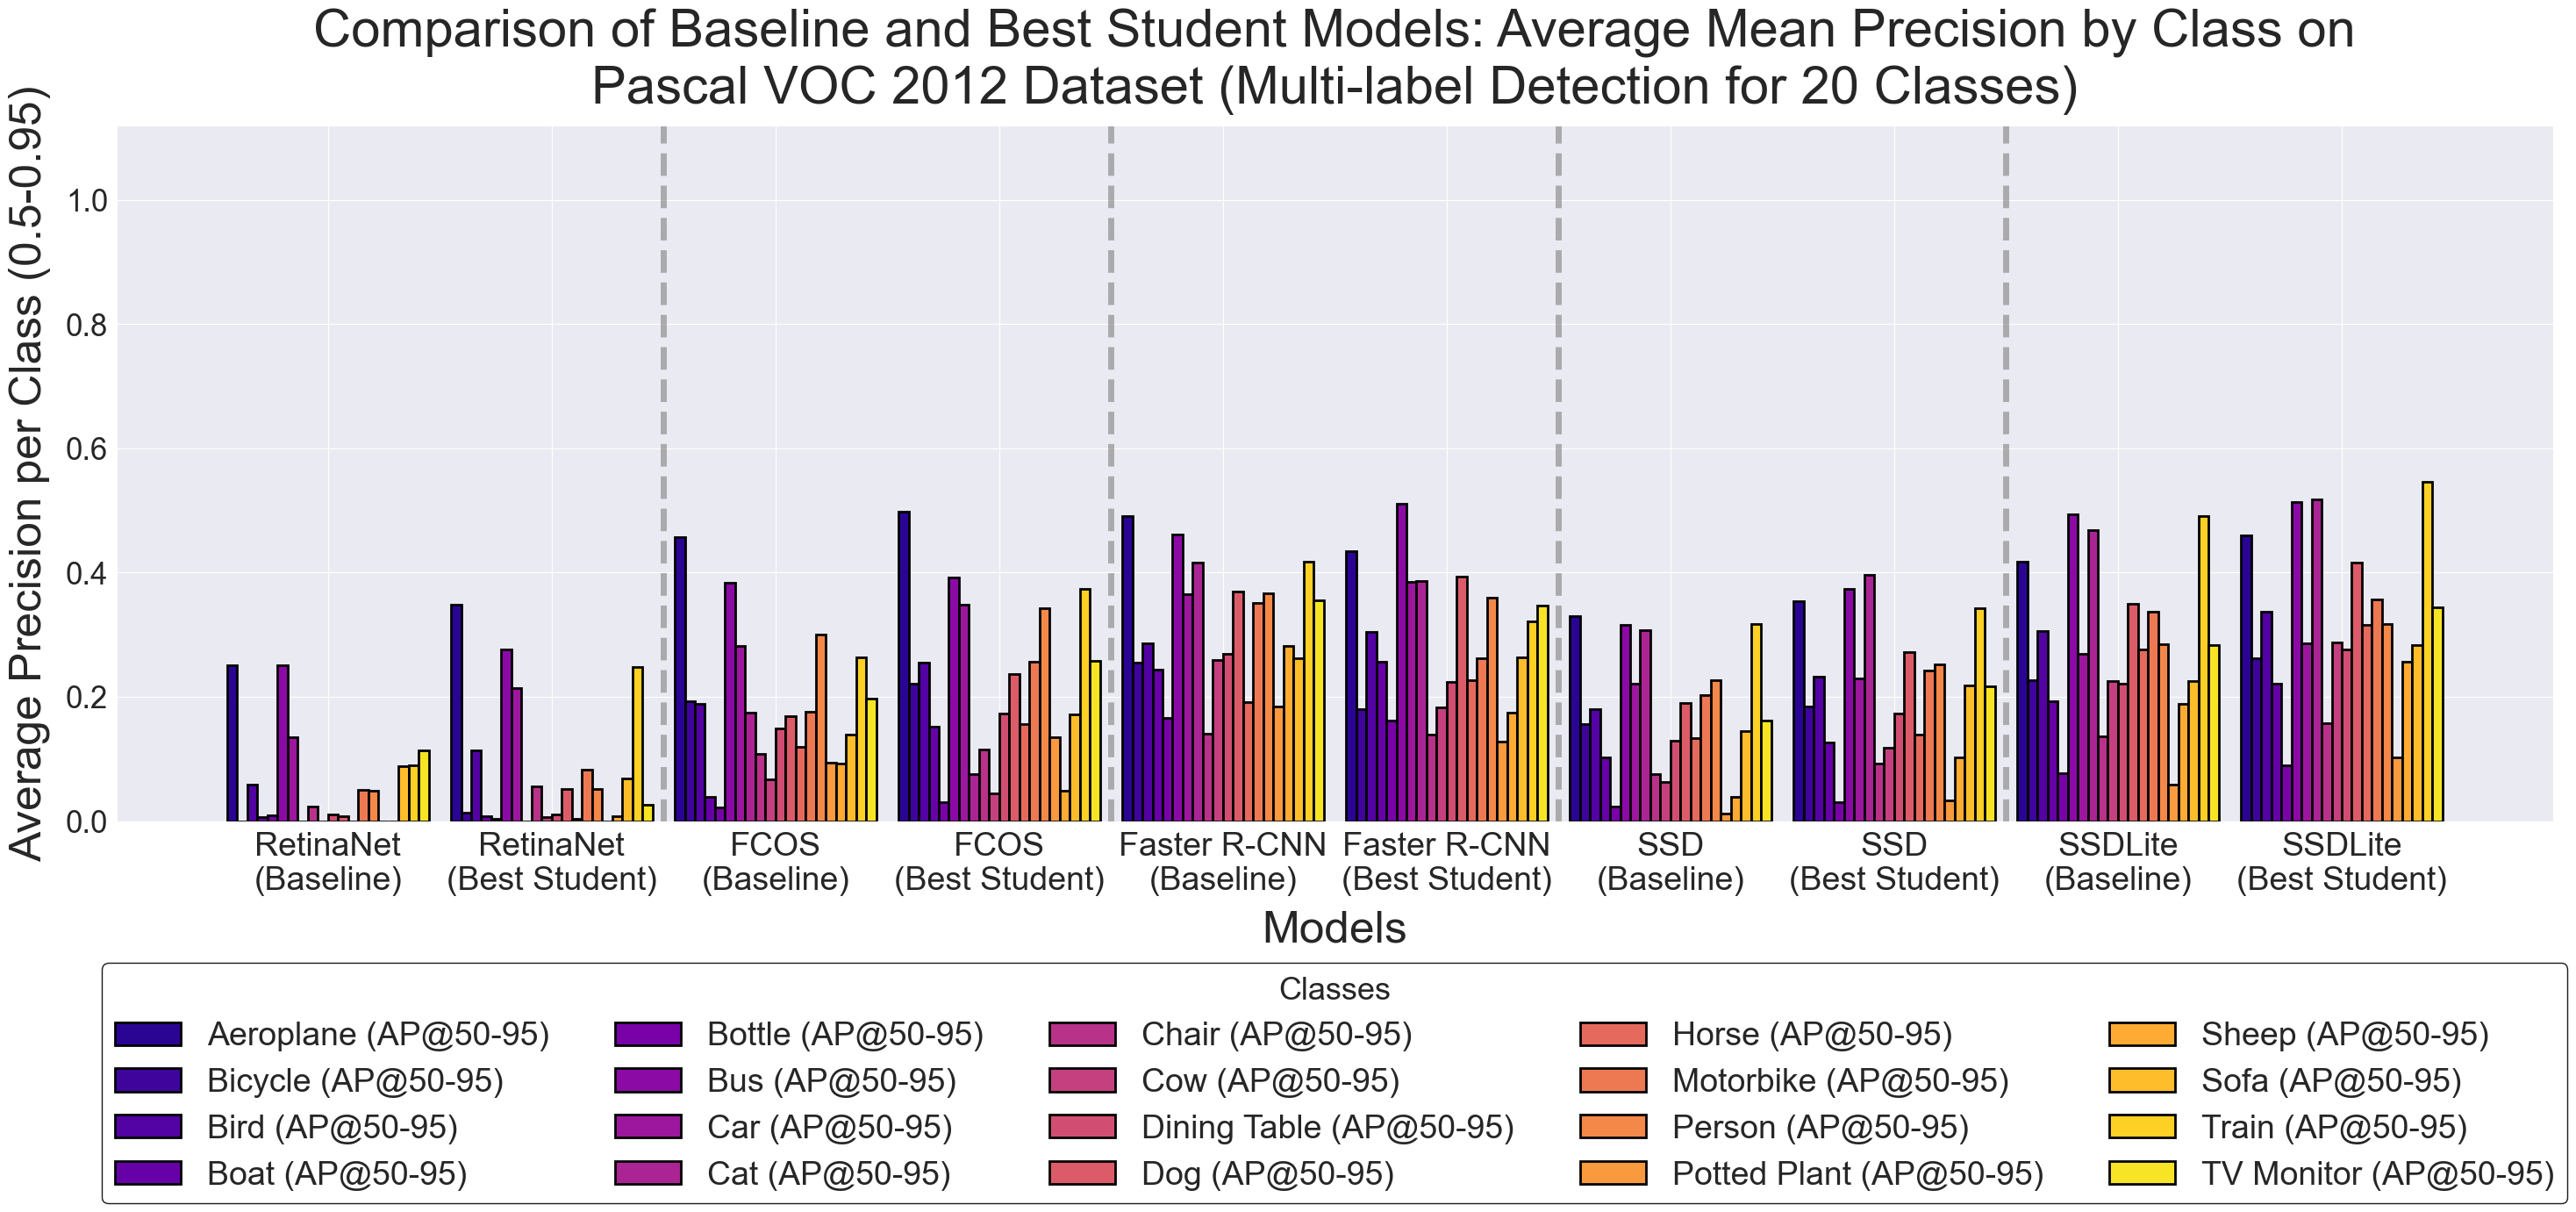

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Folder to save figures
SAVE_FOLDER = '../Assets/'

def plot_map_by_class(plotting_dictionary, class_names, save_title="map_all_classes.jpg", plot_title_extra="Average Precision by Class"):
    # Lists to store extracted data
    data = {}
    classes = None  # To store class labels
    
    # Read data
    for entry in plotting_dictionary:
        file_path = os.path.join(entry['path'], "coco_mAP.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            
            # Extract `map_per_class` and `mar_100_per_class`
            map_per_class = np.fromstring(df.iloc[0]['map_per_class'].strip('[]'), sep=' ')
            mar_100_per_class = np.fromstring(df.iloc[0]['mar_100_per_class'].strip('[]'), sep=' ')
            
            if classes is None:
                classes = np.fromstring(df.iloc[0]['classes'].strip('[]'), sep=' ', dtype=int)
            
            data[entry['title']] = (map_per_class, mar_100_per_class)
        else:
            print(f"Warning: {file_path} not found")
    
    # Aesthetics
    sns.set_style("darkgrid")
    colors = sns.color_palette("plasma", len(classes))  # Unique color per class
    
    # Set up the figure
    fig, ax = plt.subplots(figsize=(27, 14))  # Large figure for dissertation
    width = 0.15  # Increased bar width
    x = np.arange(len(data))  # X positions
    
    for i, class_id in enumerate(classes):
        map_values = [data[model][0][i] if model in data else 0 for model in data]
        offset = (i - len(classes) / 2) * width + width / 2
        bars = ax.bar(x + offset, map_values, width,
                      label=class_names[class_id] + ' (AP@50-95)', 
                      color=colors[i], edgecolor='black', linewidth=2)

        # Bar annotations directly on the bars
        for bar in bars:
            yval = bar.get_height()
            if not np.isnan(yval):  # Only add annotation if bar height is greater than zero
                ax.text(bar.get_x() + bar.get_width() / 2 + 0.012, yval + 0.007,
                        f"{yval:.2f}", ha='center', va='bottom', fontsize=19, color='black', rotation=75)

    # Optional vertical dividers (dotted lines)
    for i in range(1, len(data)):
        if i % 2 == 0:
            ax.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=5, alpha=0.6)

    # Axis Labels & Title
    ax.set_xlabel("Models", fontsize=35, labelpad=12)
    ax.set_ylabel("Average Precision per Class (0.5-0.95)", fontsize=35, labelpad=12)
    ax.set_title(plot_title_extra, fontsize=43, pad=18)

    # Tick Labels
    ax.set_xticks(x)
    ax.set_xticklabels(data.keys(), fontsize=25, rotation=0, ha='center', va='top')
    ax.tick_params(axis='y', labelsize=23)
    ax.tick_params(axis='x', width=1.2, length=5)

    # Axis limits
    ax.set_ylim(0, 1.12)

    # Legend in-plot (top right with contrast)
    ax.legend(fontsize=25, loc='upper right', frameon=True, framealpha=0.9,
              facecolor='white', edgecolor='black')

    # Layout adjustments
    plt.subplots_adjust(left=0.07, right=0.96, top=0.9, bottom=0.25)
    plt.tight_layout()

    # Save
    output_path = os.path.join(SAVE_FOLDER, 'figures', save_title)
    plt.savefig(output_path,  bbox_inches='tight')
    plt.show()

def plot_map_by_class_no_text(plotting_dictionary, class_names, save_title="map_all_classes_under_plot.jpg", plot_title_extra="Average Precision by Class"):
    # Lists to store extracted data
    data = {}
    classes = None  # To store class labels
    
    # Read data
    for entry in plotting_dictionary:
        file_path = os.path.join(entry['path'], "coco_mAP.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            
            # Extract `map_per_class` and `mar_100_per_class`
            map_per_class = np.fromstring(df.iloc[0]['map_per_class'].strip('[]'), sep=' ')
            mar_100_per_class = np.fromstring(df.iloc[0]['mar_100_per_class'].strip('[]'), sep=' ')
            
            if classes is None:
                classes = np.fromstring(df.iloc[0]['classes'].strip('[]'), sep=' ', dtype=int)
            
            data[entry['title']] = (map_per_class, mar_100_per_class)
        else:
            print(f"Warning: {file_path} not found")
    
    # Aesthetics
    sns.set_style("darkgrid")
    colors = sns.color_palette("plasma", len(classes))  # Unique color per class
    
    # Set up the figure with adjusted size to avoid overflow
    fig, ax = plt.subplots(figsize=(30, 14))  # Large figure for dissertation
    width = 0.045  # Slightly smaller bar width to avoid overflow
    x = np.arange(len(data))  # X positions
    
    for i, class_id in enumerate(classes):
        map_values = [data[model][0][i] if model in data else 0 for model in data]
        offset = (i - len(classes) / 2) * width + width / 2
        bars = ax.bar(x + offset, map_values, width,
                      label=class_names[class_id] + ' (AP@50-95)', 
                      color=colors[i], edgecolor='black', linewidth=2)

    # Optional vertical dividers (dotted lines)
    for i in range(1, len(data)):
        if i % 2 == 0:
            ax.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=5, alpha=0.6)

    # Axis Labels & Title
    ax.set_xlabel("Models", fontsize=37, labelpad=12)
    ax.set_ylabel("Average Precision per Class (0.5-0.95)", fontsize=37, labelpad=12)
    ax.set_title(plot_title_extra, fontsize=43, pad=18)

    # Tick Labels
    ax.set_xticks(x)
    ax.set_xticklabels(data.keys(), fontsize=27, rotation=0, ha='center', va='top')
    ax.tick_params(axis='y', labelsize=25)
    ax.tick_params(axis='x', width=1.2, length=5)

    # Axis limits
    ax.set_ylim(0, 1.12)

    # Adjust the legend to be below the plot, in a rectangular shape
    ax.legend(fontsize=27, loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=5, frameon=True, framealpha=0.9,
              facecolor='white', edgecolor='black', title="Classes", title_fontsize=26)

    # Layout adjustments
    plt.subplots_adjust(left=0.07, right=0.96, top=0.9, bottom=0.3)  # Adjust bottom to give room for legend
    plt.tight_layout()

    # Save
    output_path = os.path.join(SAVE_FOLDER, 'figures', save_title)
    plt.savefig(output_path,  bbox_inches='tight')
    plt.show()

TITLES = [
    "SODA Dataset (Tiled Multi-label Detection)",
    "Pascal VOC 2012 Dataset (Multi-label Detection for 20 Classes)",
]
# Example use case
plot_title = f"Comparison of Baseline and Best Student Models: Average Mean Precision by Class on\n"
MODEL_NAME = 'SODA_Dataset_Tiled_Multi'
class_names = ['Background', 'Clear Plastic Bottle', 'Drink Can', 'Drink Carton', 'Glass Bottle', 'Glass Jar', 'Other Plastic Bottle']
plotting_dictionary_comparison_soda_multi = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student2"},
    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student1"},
    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student2"},
    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},
    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1"},
]

plot_map_by_class(plotting_dictionary_comparison_soda_multi, class_names, save_title="map_all_classes_soda_multi.jpg", plot_title_extra=plot_title+TITLES[0])
# plot_map_by_class_no_text(plotting_dictionary_comparison_soda_multi, class_names, save_title="map_all_classes_soda_multi_no_text.jpg", plot_title_extra=plot_title+TITLES[0])

# PascalVOC2012 use case
MODEL_NAME = 'PascalVOC2012'
class_names = ['Background', 'Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle', 'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Dining Table', 'Dog', 'Horse', 'Motorbike', 'Person', 'Potted Plant', 'Sheep', 'Sofa', 'Train', 'TV Monitor']
plotting_dictionary_comparison_pascal_voc = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student1"},
    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},
    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student1"},
    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},
    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1"},
]
# plot_map_by_class(plotting_dictionary_comparison_pascal_voc, class_names, save_title="map_all_classes_pascal_voc.jpg", plot_title_extra=plot_title+TITLES[1])
plot_map_by_class_no_text(plotting_dictionary_comparison_pascal_voc, class_names, save_title="map_all_classes_pascal_voc_no_text.jpg", plot_title_extra=plot_title+TITLES[1])


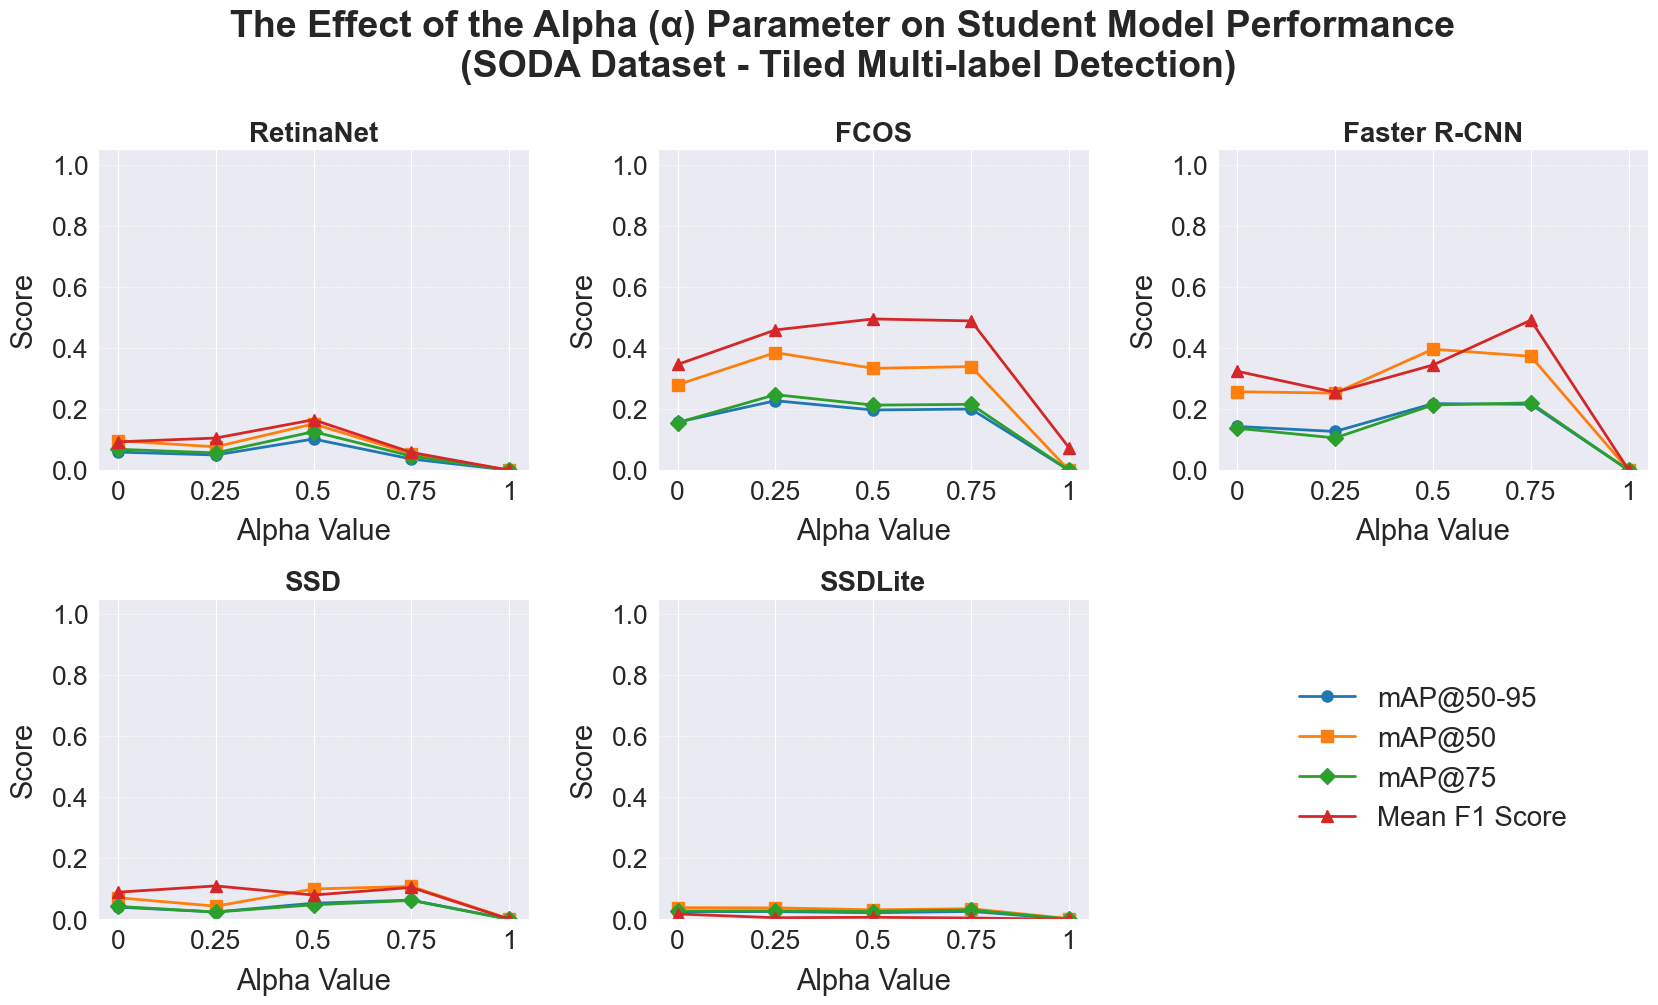

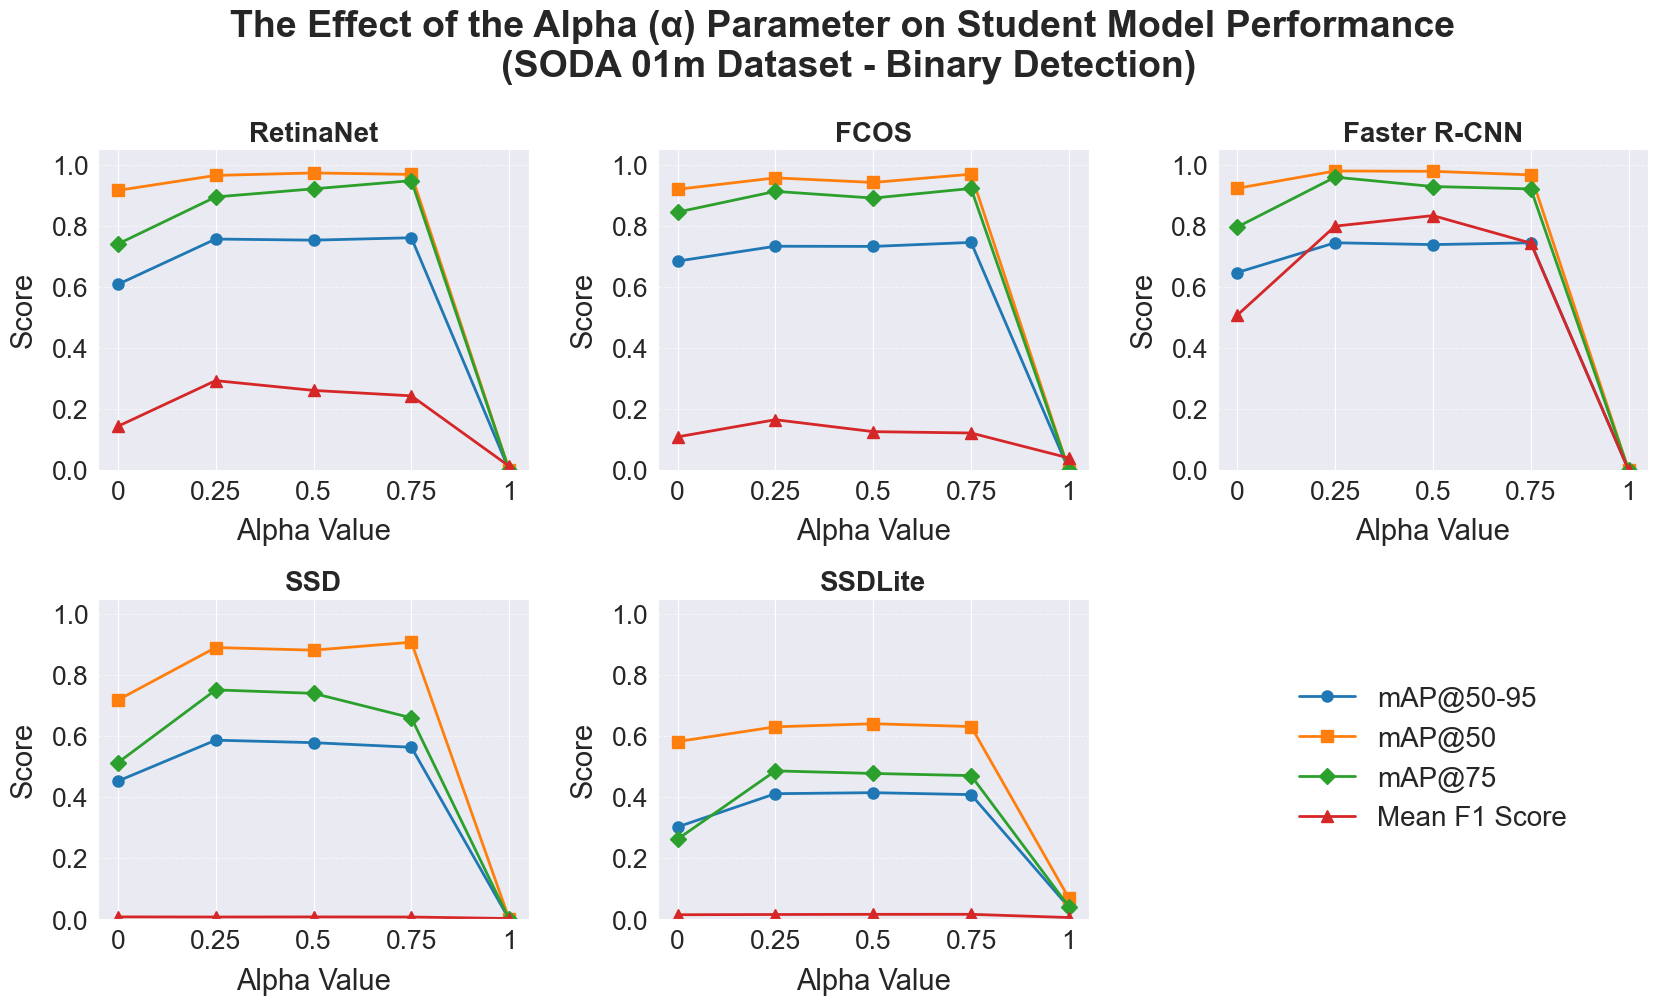

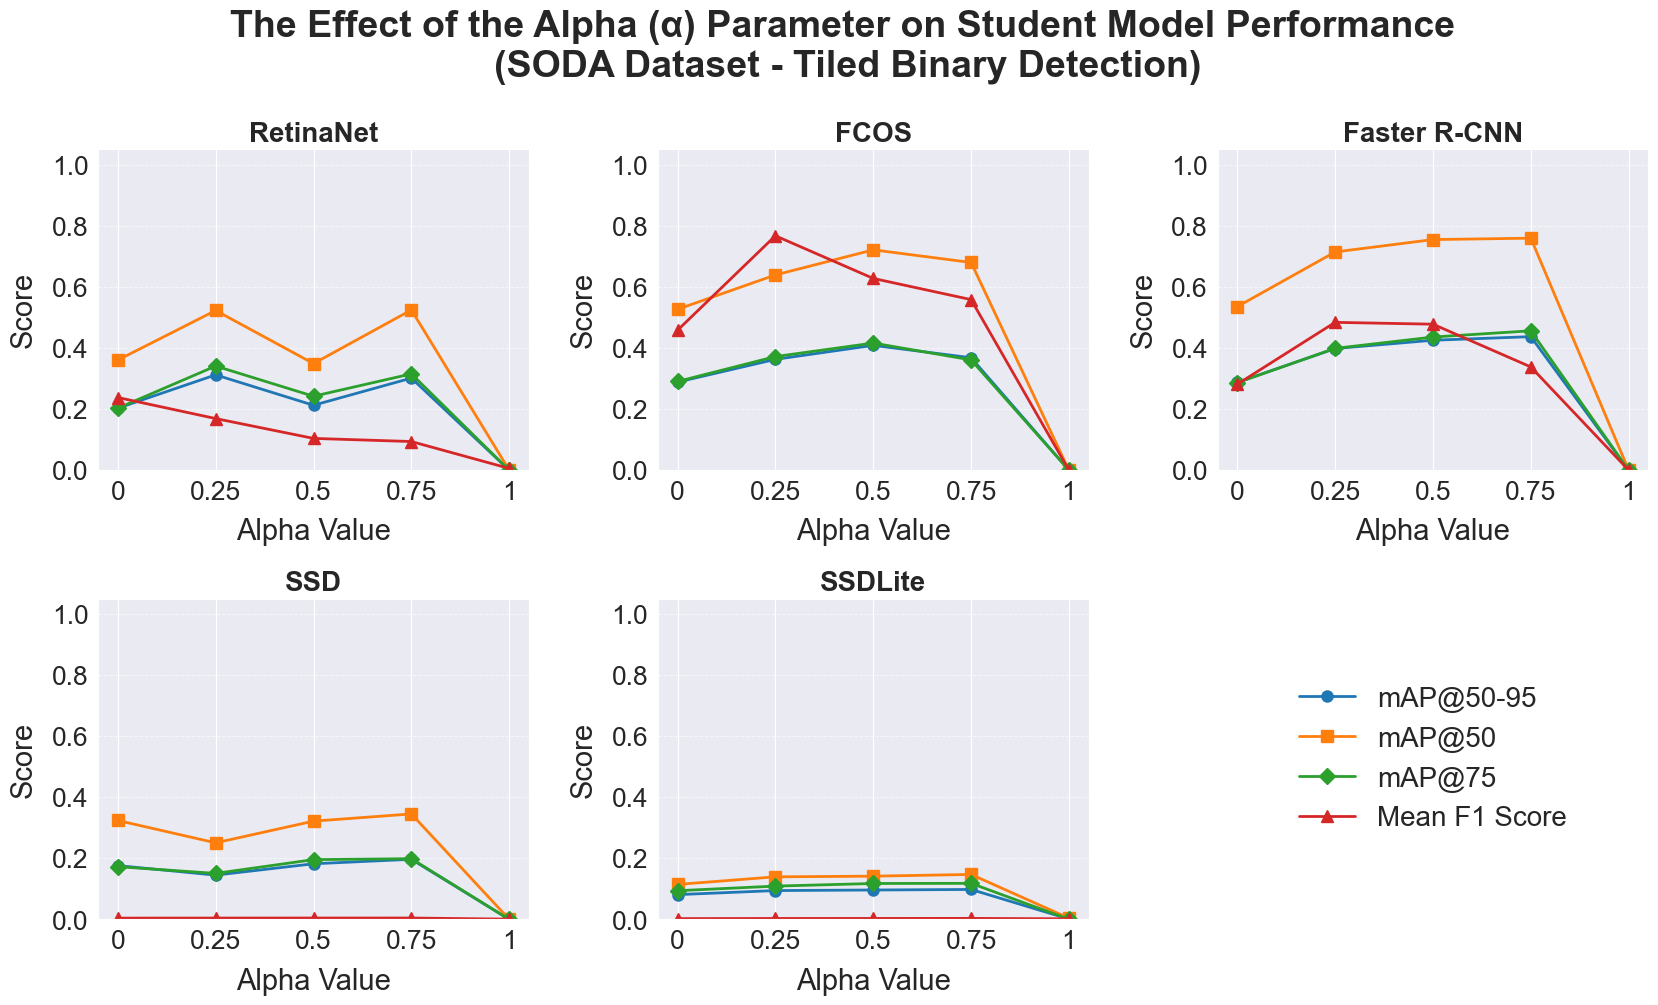

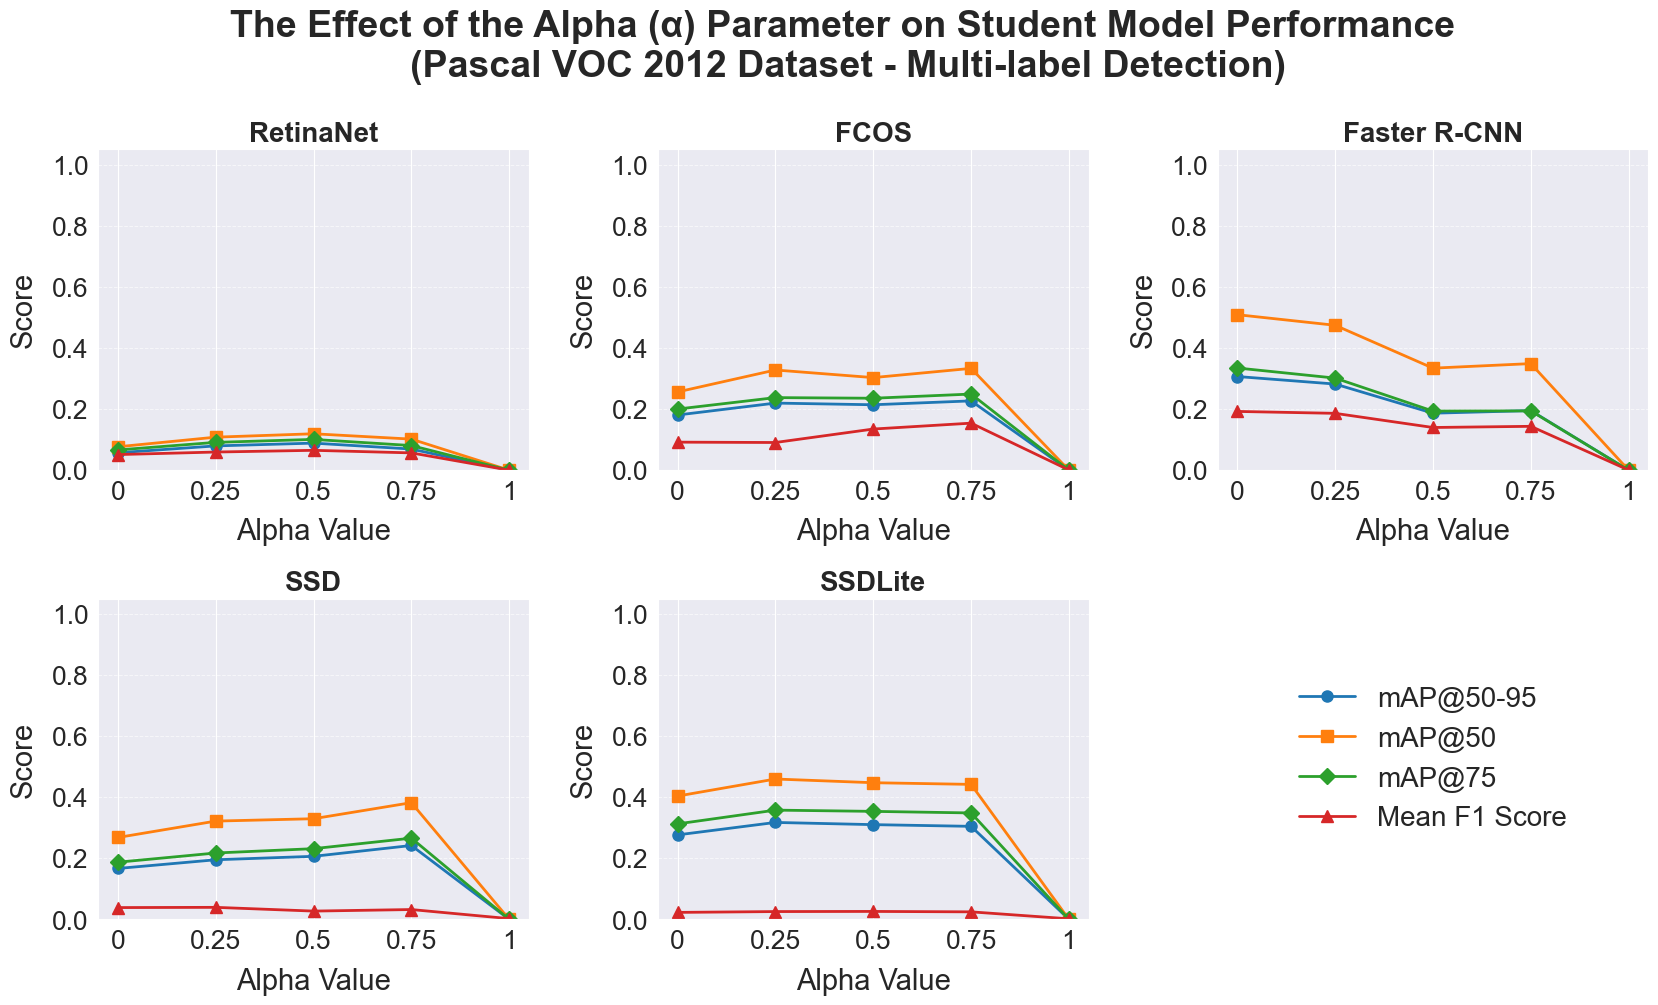

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dictionary of models and paths
MODEL_NAME = 'SODA_Dataset_Tiled_Multi'
TITLE = "The Effect of the Alpha (α) Parameter on Student Model Performance \n(SODA Dataset - Tiled Multi-label Detection)"
plotting_dictionary_retinanet = [
    {'title': "RetinaNet\nAlpha=0", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\nAlpha=0.25", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student1"},
    {'title': "RetinaNet\nAlpha=0.5", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student2"},
    {'title': "RetinaNet\nAlpha=0.75", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student3"},
    {'title': "RetinaNet\nAlpha=1", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student4"},
]

plotting_dictionary_fcos = [
    {'title': "FCOS\nAlpha=0", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\nAlpha=0.25", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student1"},
    {'title': "FCOS\nAlpha=0.5", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},
    {'title': "FCOS\nAlpha=0.75", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student3"},
    {'title': "FCOS\nAlpha=1", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student4"},
]

plotting_dictionary_fasterrcnn = [
    {'title': "Faster R-CNN\nAlpha=0", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\nAlpha=0.25", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student1"},
    {'title': "Faster R-CNN\nAlpha=0.5", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student2"},
    {'title': "Faster R-CNN\nAlpha=0.75", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student3"},
    {'title': "Faster R-CNN\nAlpha=1", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student4"},
]

plotting_dictionary_ssd = [
    {'title': "SSD\nAlpha=0", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\nAlpha=0.25", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student1"},
    {'title': "SSD\nAlpha=0.5", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},
    {'title': "SSD\nAlpha=0.75", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student3"},
    {'title': "SSD\nAlpha=1", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student4"},
]

plotting_dictionary_ssdlite = [
    {'title': "SSDLite\nAlpha=0", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\nAlpha=0.25", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1"},
    {'title': "SSDLite\nAlpha=0.5", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student2"},
    {'title': "SSDLite\nAlpha=0.75", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student3"},
    {'title': "SSDLite\nAlpha=1", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student4"},
]

metrics2 = ["mAP", "mAP@50", "mAP@75", "F1 Score"]
metric_labels2 = {
    "mAP": "mAP@50-95",
    "mAP@50": "mAP@50",
    "mAP@75": "mAP@75",
    "F1 Score": "Mean F1 Score"
}

def load_and_plot_grid(plotting_dicts, metrics, metric_labels, title, save_title="ablation_study.jpg"):
    sns.set_style("darkgrid")
    colors = plt.get_cmap("tab10").colors
    markers = ['o', 's', 'D', '^']

    # Updated figure size for a wider plot
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # Increased height (12) for better spacing
    axes = axes.flatten()

    for i, (plotting_dictionary, ax) in enumerate(zip(plotting_dicts + [None], axes)):
        if plotting_dictionary is None:
            handles = [
                plt.Line2D(
                    [0], [0],
                    color=colors[j],
                    marker=markers[j],
                    label=metric_labels[m],
                    linewidth=2,
                    markersize=8
                )
                for j, m in enumerate(metrics)
            ]
            ax.legend(
                handles=handles,
                fontsize=20,  # Increased font size of the legend
                loc='center',
                frameon=False,
                ncol=1  # Vertical legend layout
            )
            ax.axis('off')
            continue

        data = []
        labels = []

        for entry in plotting_dictionary:
            prf1_path = os.path.join(entry['path'], "precision_recall_f1_metrics.csv")
            map_path = os.path.join(entry['path'], "coco_mAP.csv")
            values = []

            if os.path.exists(map_path):
                df_map = pd.read_csv(map_path)
                values.extend([df_map.iloc[0]["map"], df_map.iloc[0]["map_50"], df_map.iloc[0]["map_75"]])
            else:
                values.extend([None] * 3)

            if os.path.exists(prf1_path):
                df = pd.read_csv(prf1_path)
                mean_values = df[df['Class'] == "Mean"][["Precision", "Recall", "F1 Score"]].values.flatten()
                values.extend(mean_values)
            else:
                values.extend([None] * 3)

            data.append(values)

            alpha_val = entry['title'].split('\n')[-1].replace('Alpha=', '')
            labels.append(alpha_val)

        data = np.array(data, dtype=float)

        for j, metric in enumerate(metrics):
            ax.plot(
                labels,
                data[:, j],
                label=metric_labels[metric],
                color=colors[j],
                marker=markers[j],
                linewidth=2,
                markersize=8,
            )

        ax.set_title(plotting_dictionary[0]['title'].split('\n')[0], fontsize=20, weight='bold')  # Increased title size
        ax.set_xlabel("Alpha Value", fontsize=21, labelpad=10)  # Increased font size of x-axis label
        ax.set_ylabel("Score", fontsize=21, labelpad=10)  # Increased font size of y-axis label
        ax.set_ylim(0, 1.05)  # Small padding above the top of the plot
        ax.tick_params(axis='x', labelsize=19)  # Increased font size for x-axis ticks
        ax.tick_params(axis='y', labelsize=19)  # Increased font size for y-axis ticks

        # Add gridlines for better readability
        ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

    # Set a title for the entire figure with larger font size
    fig.suptitle(title, fontsize=27, weight='bold', y=1.02)

    # Adjust spacing to avoid overlap and ensure the layout is clean
    plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Increased vertical (hspace) and horizontal (wspace) spacing

    # Save the plot
    plt.savefig(f"../Assets/figures/{save_title}",  bbox_inches='tight')
    plt.show()


plotting_dicts = [
    plotting_dictionary_retinanet,
    plotting_dictionary_fcos,
    plotting_dictionary_fasterrcnn,
    plotting_dictionary_ssd,
    plotting_dictionary_ssdlite
]

load_and_plot_grid(plotting_dicts, metrics2, metric_labels2, TITLE)

TITLE = "The Effect of the Alpha (α) Parameter on Student Model Performance \n(SODA 01m Dataset - Binary Detection)"
# RetinaNet Comparison (with Alpha values)
plotting_dictionary_comparison_retinanet = [
    {'title': "RetinaNet\nAlpha=0", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary1"},
    {'title': "RetinaNet\nAlpha=0.25", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary_student1"},
    {'title': "RetinaNet\nAlpha=0.5", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary_student2"},
    {'title': "RetinaNet\nAlpha=0.75", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary_student3"},
    {'title': "RetinaNet\nAlpha=1", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary_student4"},
]

# FCOS Comparison (with Alpha values)
plotting_dictionary_comparison_fcos = [
    {'title': "FCOS\nAlpha=0", 'path': f"../runs/SODA 01m/FCOS/FCOS_rgb_binary1"},
    {'title': "FCOS\nAlpha=0.25", 'path': f"../runs/SODA 01m/FCOS/FCOS_rgb_binary_student1"},
    {'title': "FCOS\nAlpha=0.5", 'path': f"../runs/SODA 01m/FCOS/FCOS_rgb_binary_student2"},
    {'title': "FCOS\nAlpha=0.75", 'path': f"../runs/SODA 01m/FCOS/FCOS_rgb_binary_student3"},
    {'title': "FCOS\nAlpha=1", 'path': f"../runs/SODA 01m/FCOS/FCOS_rgb_binary_student4"},
]

# Faster R-CNN Comparison (with Alpha values)
plotting_dictionary_comparison_fasterrcnn = [
    {'title': "Faster R-CNN\nAlpha=0", 'path': f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_binary1"},
    {'title': "Faster R-CNN\nAlpha=0.25", 'path': f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_binary_student1"},
    {'title': "Faster R-CNN\nAlpha=0.5", 'path': f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_binary_student2"},
    {'title': "Faster R-CNN\nAlpha=0.75", 'path': f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_binary_student3"},
    {'title': "Faster R-CNN\nAlpha=1", 'path': f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_binary_student4"},
]

# SSD Comparison (with Alpha values)
plotting_dictionary_comparison_ssd = [
    {'title': "SSD\nAlpha=0", 'path': f"../runs/SODA 01m/SSD/SSD_rgb_binary1"},
    {'title': "SSD\nAlpha=0.25", 'path': f"../runs/SODA 01m/SSD/SSD_rgb_binary_student1"},
    {'title': "SSD\nAlpha=0.5", 'path': f"../runs/SODA 01m/SSD/SSD_rgb_binary_student2"},
    {'title': "SSD\nAlpha=0.75", 'path': f"../runs/SODA 01m/SSD/SSD_rgb_binary_student3"},
    {'title': "SSD\nAlpha=1", 'path': f"../runs/SODA 01m/SSD/SSD_rgb_binary_student4"},
]

# SSDLite Comparison (with Alpha values)
plotting_dictionary_comparison_ssdlite = [
    {'title': "SSDLite\nAlpha=0", 'path': f"../runs/SODA 01m/SSDLite/SSDLite_rgb_binary1"},
    {'title': "SSDLite\nAlpha=0.25", 'path': f"../runs/SODA 01m/SSDLite/SSDLite_rgb_binary_student1"},
    {'title': "SSDLite\nAlpha=0.5", 'path': f"../runs/SODA 01m/SSDLite/SSDLite_rgb_binary_student2"},
    {'title': "SSDLite\nAlpha=0.75", 'path': f"../runs/SODA 01m/SSDLite/SSDLite_rgb_binary_student3"},
    {'title': "SSDLite\nAlpha=1", 'path': f"../runs/SODA 01m/SSDLite/SSDLite_rgb_binary_student4"},
]

plotting_dicts = [
    plotting_dictionary_comparison_retinanet,
    plotting_dictionary_comparison_fcos,
    plotting_dictionary_comparison_fasterrcnn,
    plotting_dictionary_comparison_ssd,
    plotting_dictionary_comparison_ssdlite
]

load_and_plot_grid(plotting_dicts, metrics2, metric_labels2, TITLE, save_title="ablation_study_soda_01m.jpg")

# Dictionary of models and paths
MODEL_NAME = 'SODA_Dataset_Tiled_Single'
TITLE = "The Effect of the Alpha (α) Parameter on Student Model Performance \n(SODA Dataset - Tiled Binary Detection)"
plotting_dictionary_retinanet = [
    {'title': "RetinaNet\nAlpha=0", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\nAlpha=0.25", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student1"},
    {'title': "RetinaNet\nAlpha=0.5", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student2"},
    {'title': "RetinaNet\nAlpha=0.75", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student3"},
    {'title': "RetinaNet\nAlpha=1", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student4"},
]

plotting_dictionary_fcos = [
    {'title': "FCOS\nAlpha=0", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\nAlpha=0.25", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student1"},
    {'title': "FCOS\nAlpha=0.5", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},
    {'title': "FCOS\nAlpha=0.75", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student3"},
    {'title': "FCOS\nAlpha=1", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student4"},
]

plotting_dictionary_fasterrcnn = [
    {'title': "Faster R-CNN\nAlpha=0", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\nAlpha=0.25", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student1"},
    {'title': "Faster R-CNN\nAlpha=0.5", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student2"},
    {'title': "Faster R-CNN\nAlpha=0.75", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student3"},
    {'title': "Faster R-CNN\nAlpha=1", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student4"},
]

plotting_dictionary_ssd = [
    {'title': "SSD\nAlpha=0", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\nAlpha=0.25", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student1"},
    {'title': "SSD\nAlpha=0.5", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},
    {'title': "SSD\nAlpha=0.75", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student3"},
    {'title': "SSD\nAlpha=1", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student4"},
]

plotting_dictionary_ssdlite = [
    {'title': "SSDLite\nAlpha=0", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\nAlpha=0.25", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1"},
    {'title': "SSDLite\nAlpha=0.5", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student2"},
    {'title': "SSDLite\nAlpha=0.75", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student3"},
    {'title': "SSDLite\nAlpha=1", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student4"},
]

plotting_dicts = [
    plotting_dictionary_retinanet,
    plotting_dictionary_fcos,
    plotting_dictionary_fasterrcnn,
    plotting_dictionary_ssd,
    plotting_dictionary_ssdlite
]


load_and_plot_grid(plotting_dicts, metrics2, metric_labels2, TITLE, save_title="ablation_study_soda_tiled_single.jpg")

# Dictionary of models and paths
MODEL_NAME = 'PascalVOC2012'
TITLE = "The Effect of the Alpha (α) Parameter on Student Model Performance \n(Pascal VOC 2012 Dataset - Multi-label Detection)"
plotting_dictionary_retinanet = [
    {'title': "RetinaNet\nAlpha=0", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\nAlpha=0.25", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student1"},
    {'title': "RetinaNet\nAlpha=0.5", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student2"},
    {'title': "RetinaNet\nAlpha=0.75", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student3"},
    {'title': "RetinaNet\nAlpha=1", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student4"},
]

plotting_dictionary_fcos = [
    {'title': "FCOS\nAlpha=0", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\nAlpha=0.25", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student1"},
    {'title': "FCOS\nAlpha=0.5", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},
    {'title': "FCOS\nAlpha=0.75", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student3"},
    {'title': "FCOS\nAlpha=1", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student4"},
]

plotting_dictionary_fasterrcnn = [
    {'title': "Faster R-CNN\nAlpha=0", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\nAlpha=0.25", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student1"},
    {'title': "Faster R-CNN\nAlpha=0.5", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student2"},
    {'title': "Faster R-CNN\nAlpha=0.75", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student3"},
    {'title': "Faster R-CNN\nAlpha=1", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student4"},
]

plotting_dictionary_ssd = [
    {'title': "SSD\nAlpha=0", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\nAlpha=0.25", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student1"},
    {'title': "SSD\nAlpha=0.5", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},
    {'title': "SSD\nAlpha=0.75", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student3"},
    {'title': "SSD\nAlpha=1", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student4"},
]

plotting_dictionary_ssdlite = [
    {'title': "SSDLite\nAlpha=0", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\nAlpha=0.25", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1"},
    {'title': "SSDLite\nAlpha=0.5", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student2"},
    {'title': "SSDLite\nAlpha=0.75", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student3"},
    {'title': "SSDLite\nAlpha=1", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student4"},
]

plotting_dicts = [
    plotting_dictionary_retinanet,
    plotting_dictionary_fcos,
    plotting_dictionary_fasterrcnn,
    plotting_dictionary_ssd,
    plotting_dictionary_ssdlite
]


load_and_plot_grid(plotting_dicts, metrics2, metric_labels2, TITLE, save_title="ablation_study_pascal_voc.jpg")

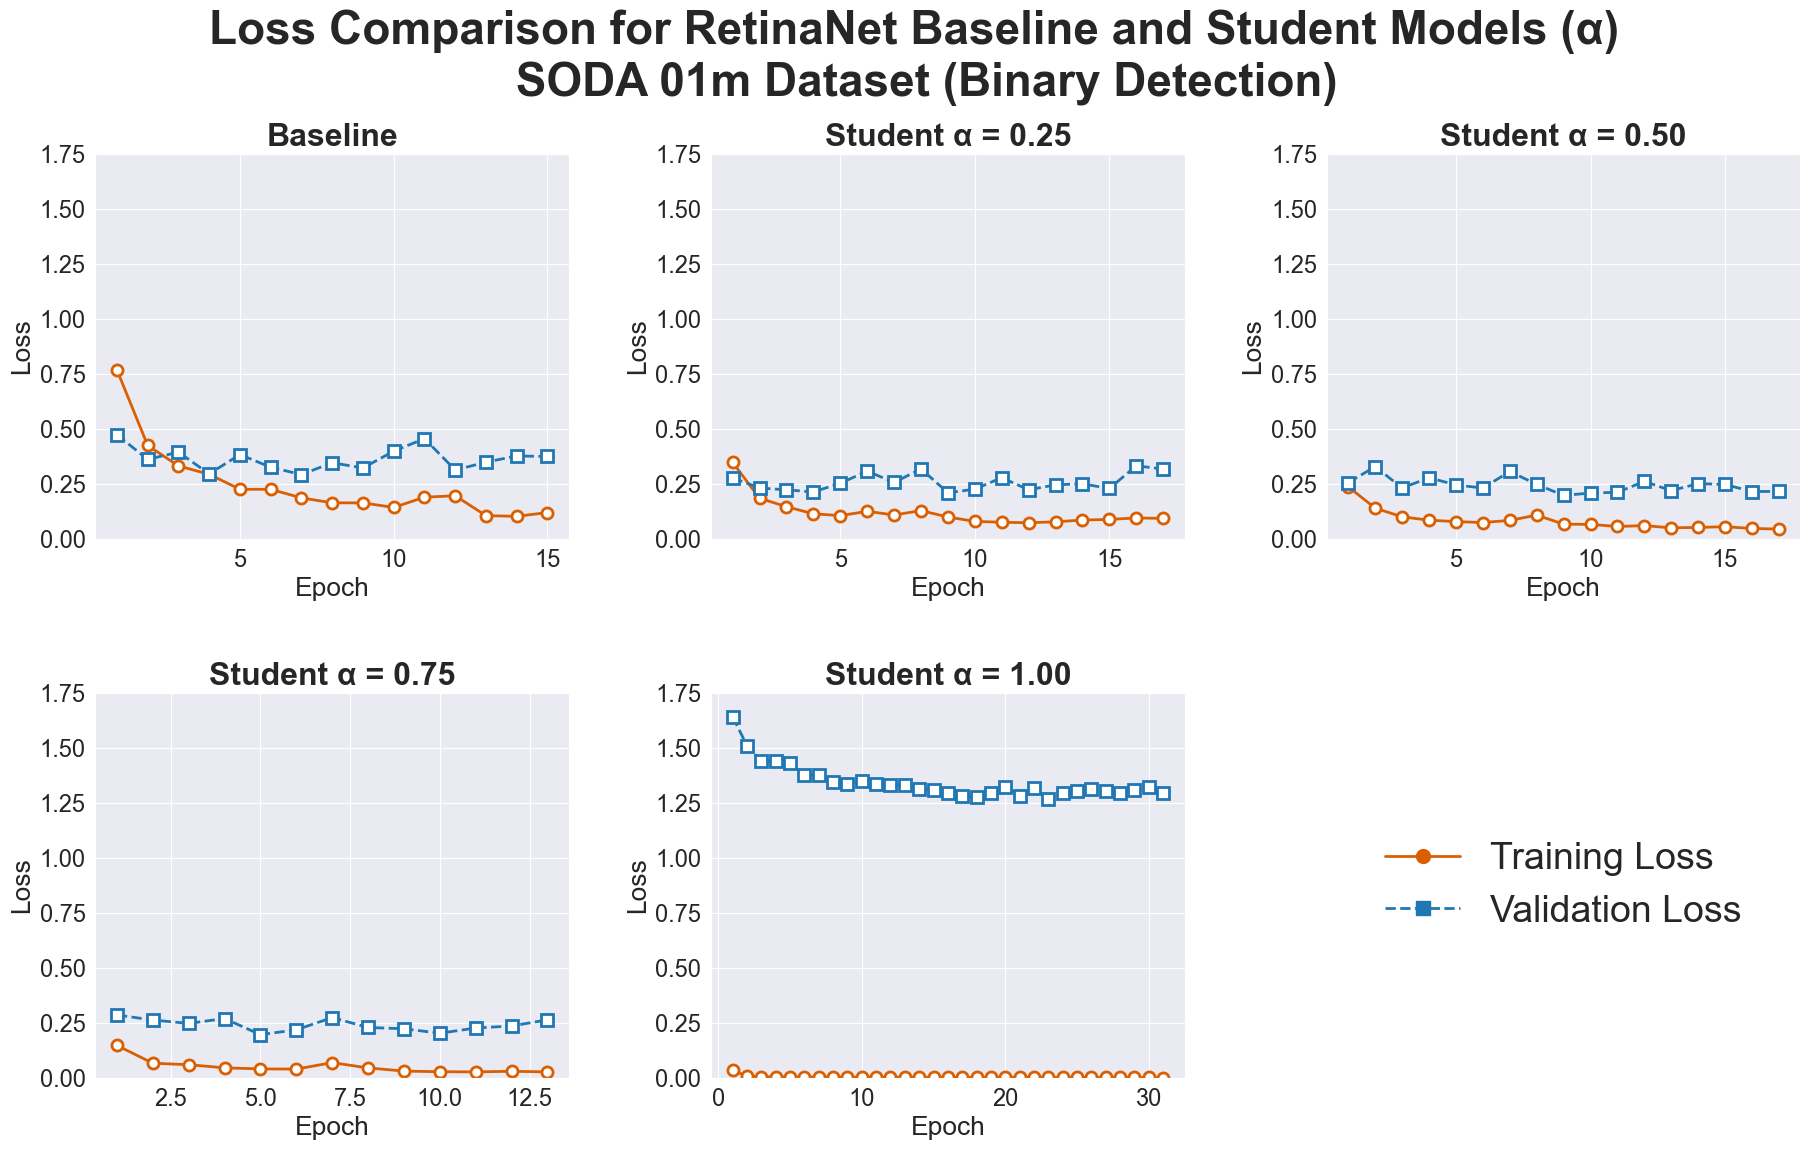

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Base directory path
base_dir = '../runs/SODA 01m/RetinaNet'

# Define models and titles
plot_configs = [
    {'subdir': 'RetinaNet_rgb_binary1', 'title': 'Baseline'},
    {'subdir': 'RetinaNet_rgb_binary_student1', 'title': 'Student α = 0.25'},
    {'subdir': 'RetinaNet_rgb_binary_student2', 'title': 'Student α = 0.50'},
    {'subdir': 'RetinaNet_rgb_binary_student3', 'title': 'Student α = 0.75'},
    {'subdir': 'RetinaNet_rgb_binary_student4', 'title': 'Student α = 1.00'},
]

def plot_retinanet_loss_grid(base_dir, plot_configs, fig_title='RetinaNet Loss Comparison'):
    # Grid dimensions
    n_cols = 3
    n_rows = (len(plot_configs) + 1 + n_cols - 1) // n_cols  # +1 for legend subplot

    # Create figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 6 * n_rows))
    sns.set_style("darkgrid")

    # Adjust spacing manually for more control
    fig.subplots_adjust(hspace=0.4, wspace=0.3)

    # Colour scheme and markers
    loss_settings = [
        {'key': 'train_loss', 'label': 'Training Loss', 'color': '#D95F02', 'marker': 'o', 'linestyle': '-'},
        {'key': 'val_loss', 'label': 'Validation Loss', 'color': '#1F77B4', 'marker': 's', 'linestyle': '--'}
    ]

    axes = axes.flatten()

    # Plot each model config
    for idx, config in enumerate(plot_configs):
        ax = axes[idx]
        file_path = os.path.join(base_dir, config['subdir'], 'results.csv')

        if not os.path.isfile(file_path):
            ax.set_title(f"Missing: {config['title']}", fontsize=18, fontweight='bold')
            ax.axis('off')
            continue

        data = pd.read_csv(file_path)

        for loss in loss_settings:
            ax.plot(
                data['epoch'],
                data[loss['key']],
                label=loss['label'],
                color=loss['color'],
                marker=loss['marker'],
                linestyle=loss['linestyle'],
                linewidth=2,
                markersize=8,
                markerfacecolor='white',
                markeredgewidth=2
            )

        ax.set_title(config['title'], fontsize=23, fontweight='bold')
        ax.set_xlabel('Epoch', fontsize=19)
        ax.set_ylabel('Loss', fontsize=19)
        ax.tick_params(axis='both', labelsize=17)

        # Set ylimits to 1.75 for all plots
        ax.set_ylim(0, 1.75)

    # Legend in final subplot
    legend_ax = axes[len(plot_configs)]
    legend_ax.axis('off')

    handles = []
    for loss in loss_settings:
        h, = legend_ax.plot([], [], label=loss['label'],
                            color=loss['color'], marker=loss['marker'],
                            linestyle=loss['linestyle'], linewidth=2, markersize=10)
        handles.append(h)

    # Add clean legend
    legend_ax.legend(
        handles=handles,
        loc='center',
        fontsize=27,
        ncol=1,
        frameon=False  # No grey box
    )

    # Hide unused axes
    for j in range(len(plot_configs) + 1, len(axes)):
        axes[j].axis('off')

    # Global title
    fig.suptitle(fig_title, fontsize=33, fontweight='bold', y=1)

    # Save and show
    plt.savefig(f"../Assets/figures/RetinaNet_loss_comparison.jpg",  bbox_inches='tight')
    plt.show()
    

# Call the function to plot the loss curves
plot_retinanet_loss_grid(base_dir, plot_configs, fig_title='Loss Comparison for RetinaNet Baseline and Student Models (α) \n SODA 01m Dataset (Binary Detection)')

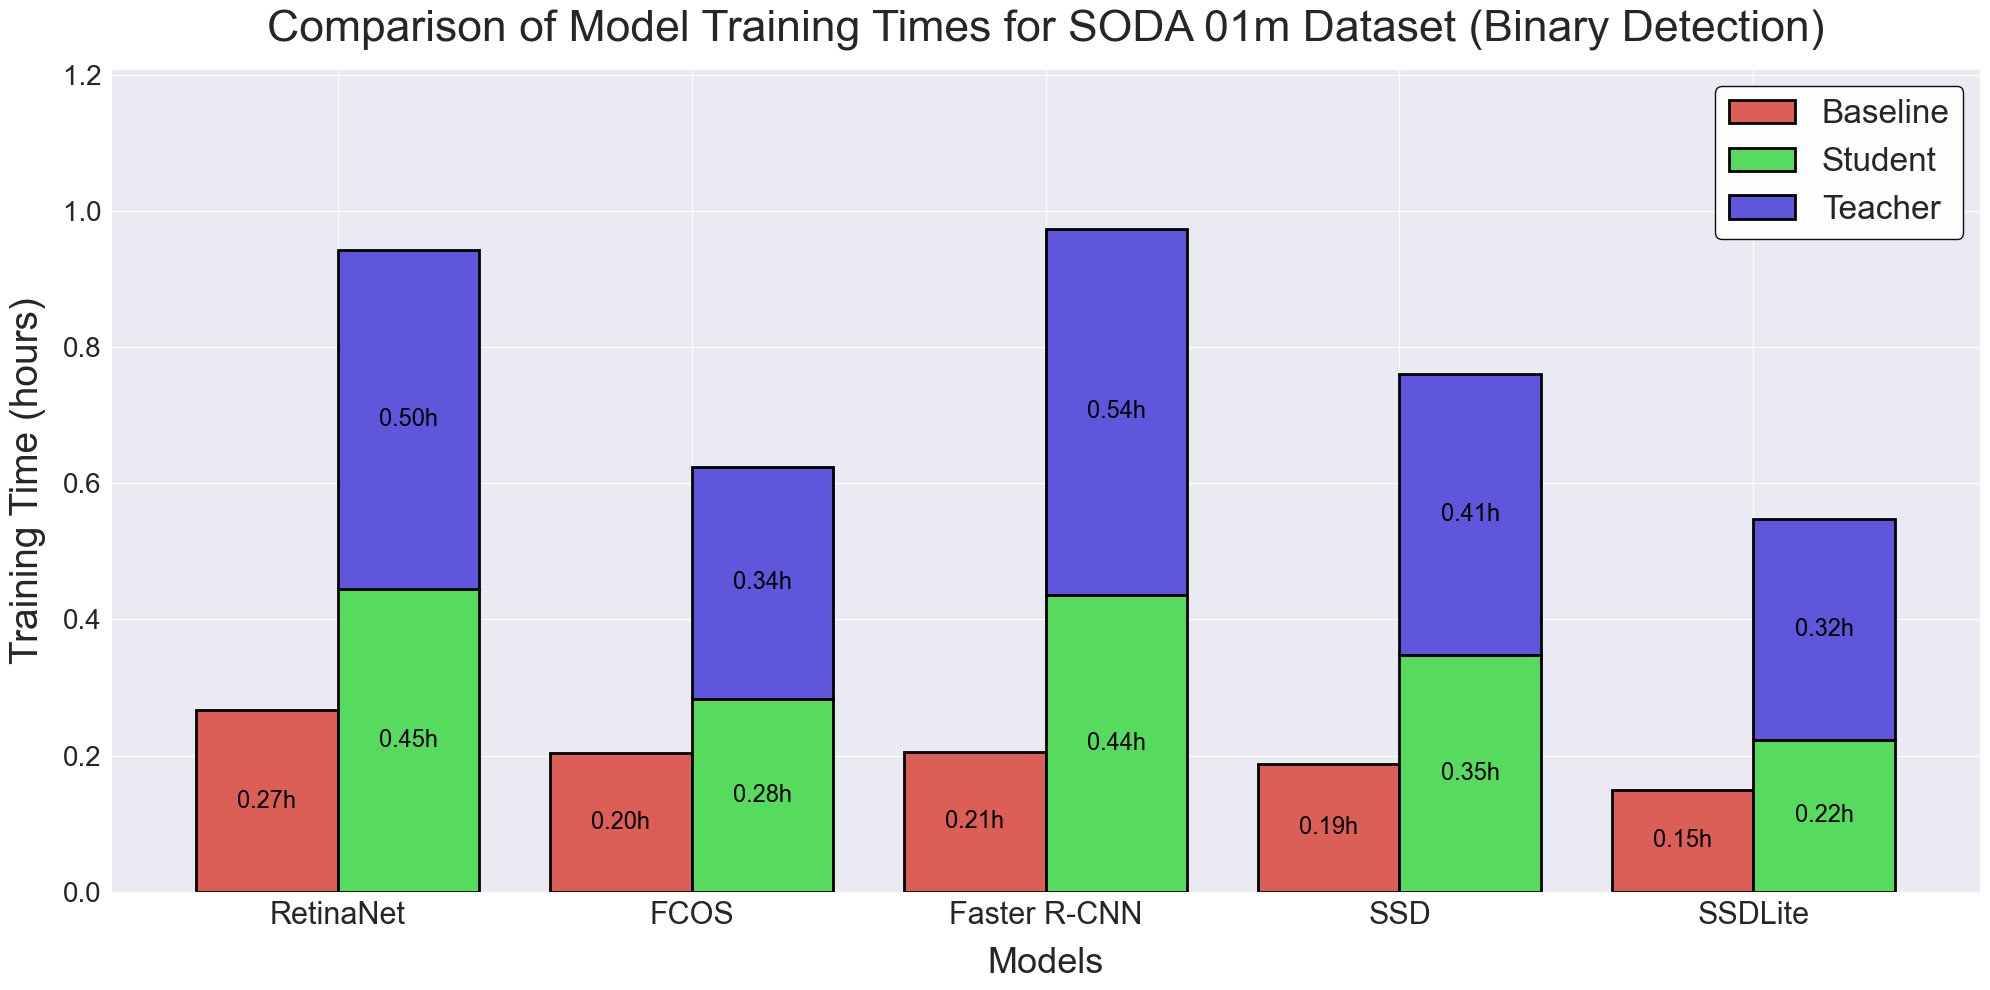

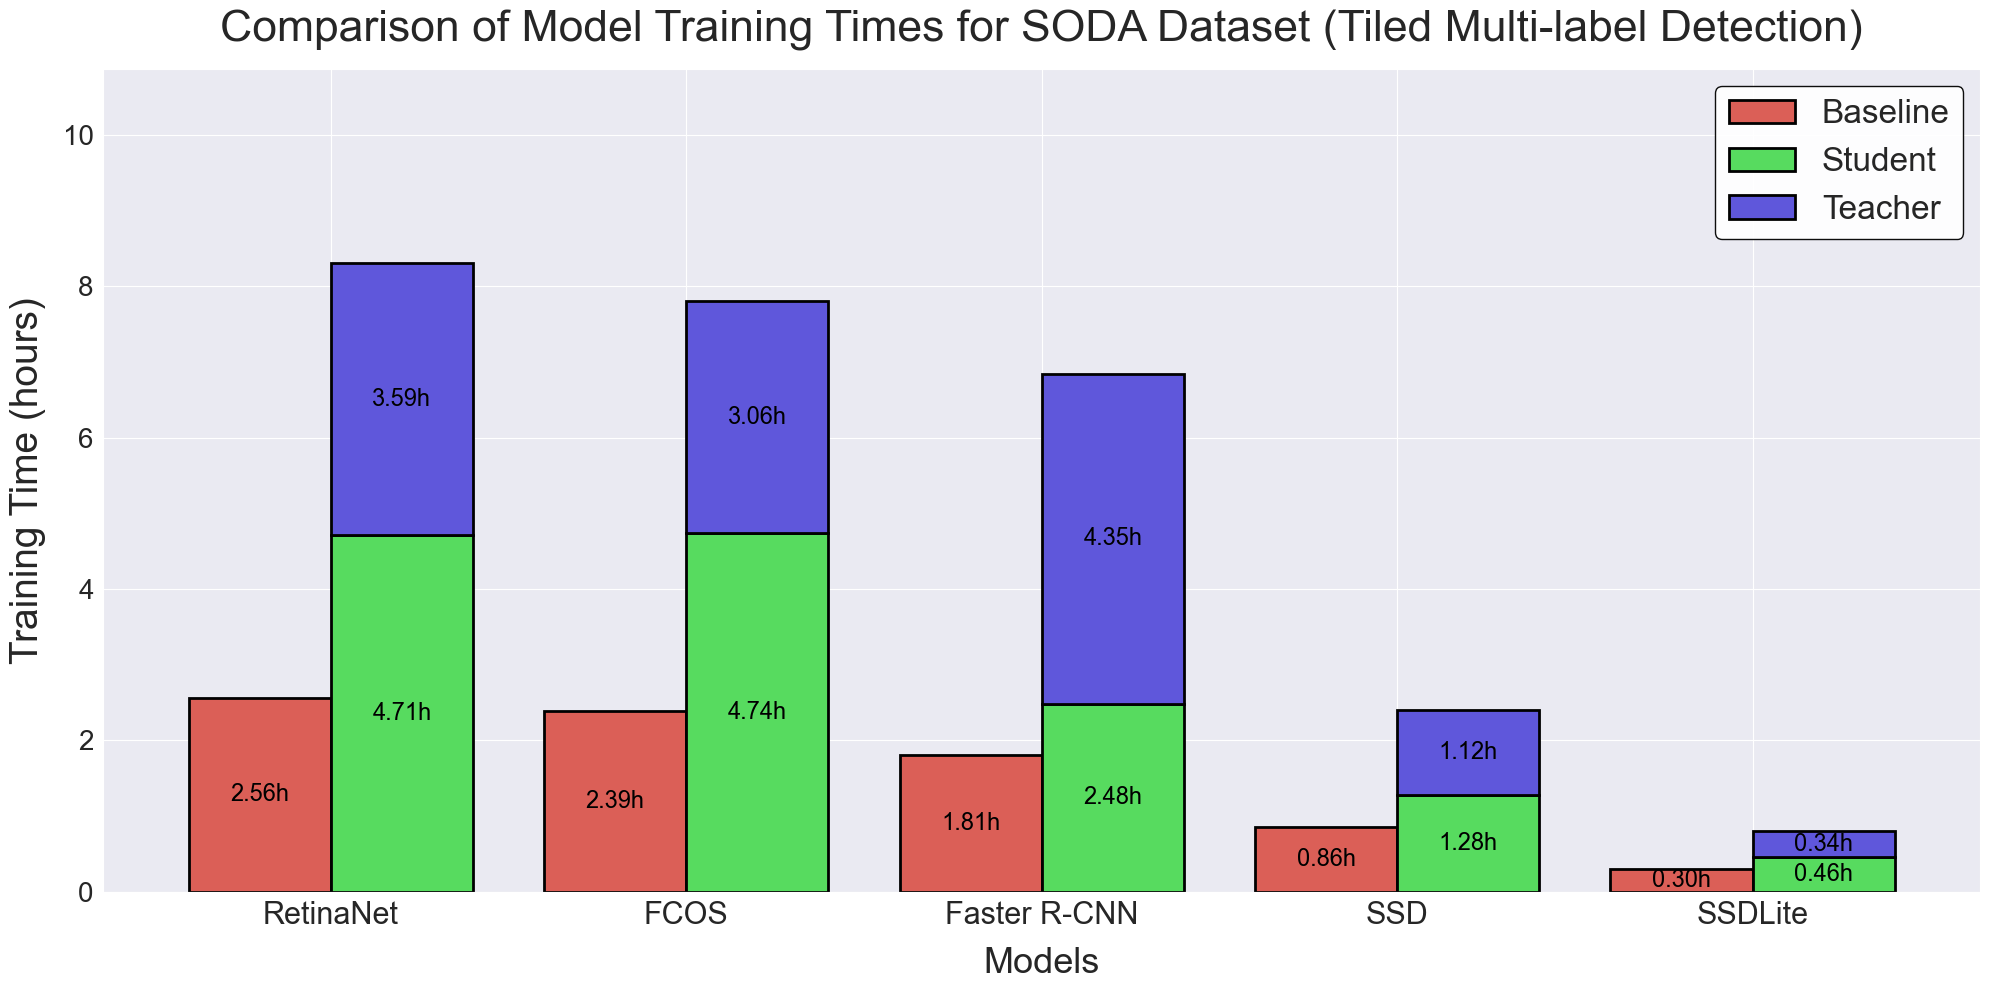

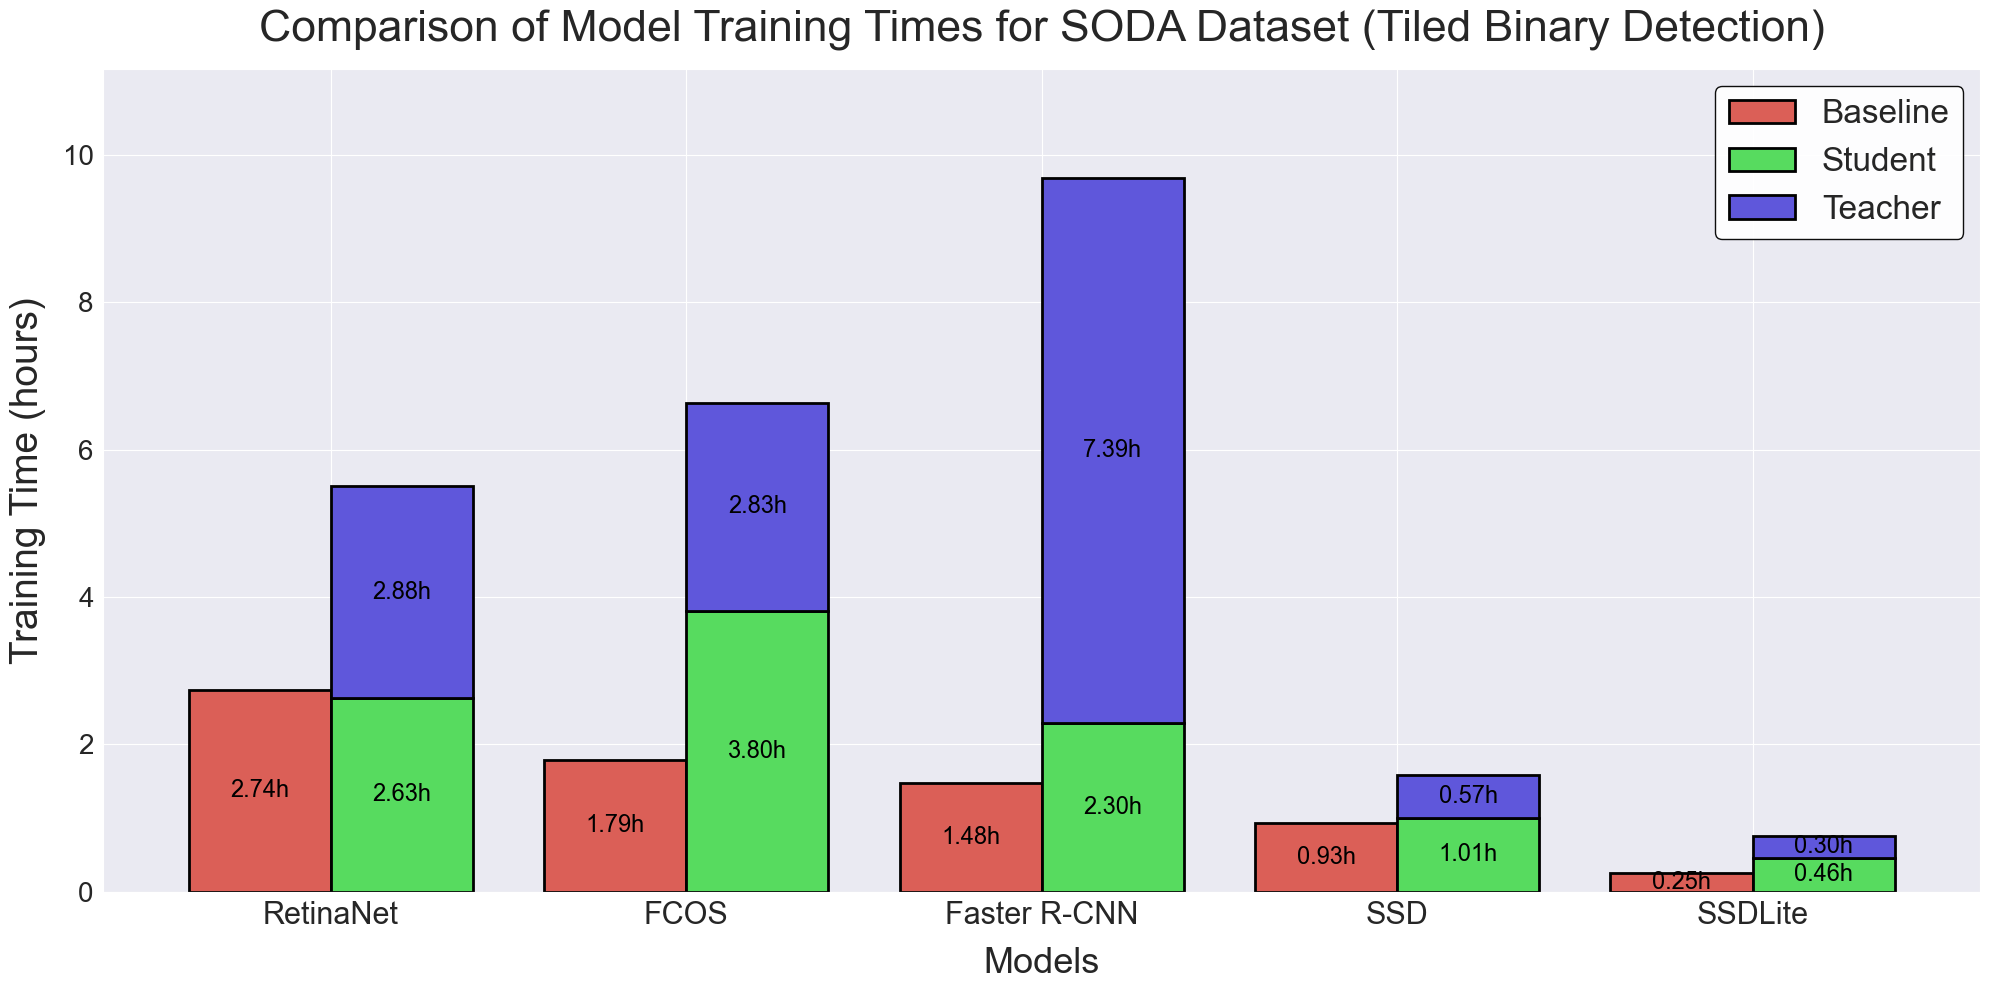

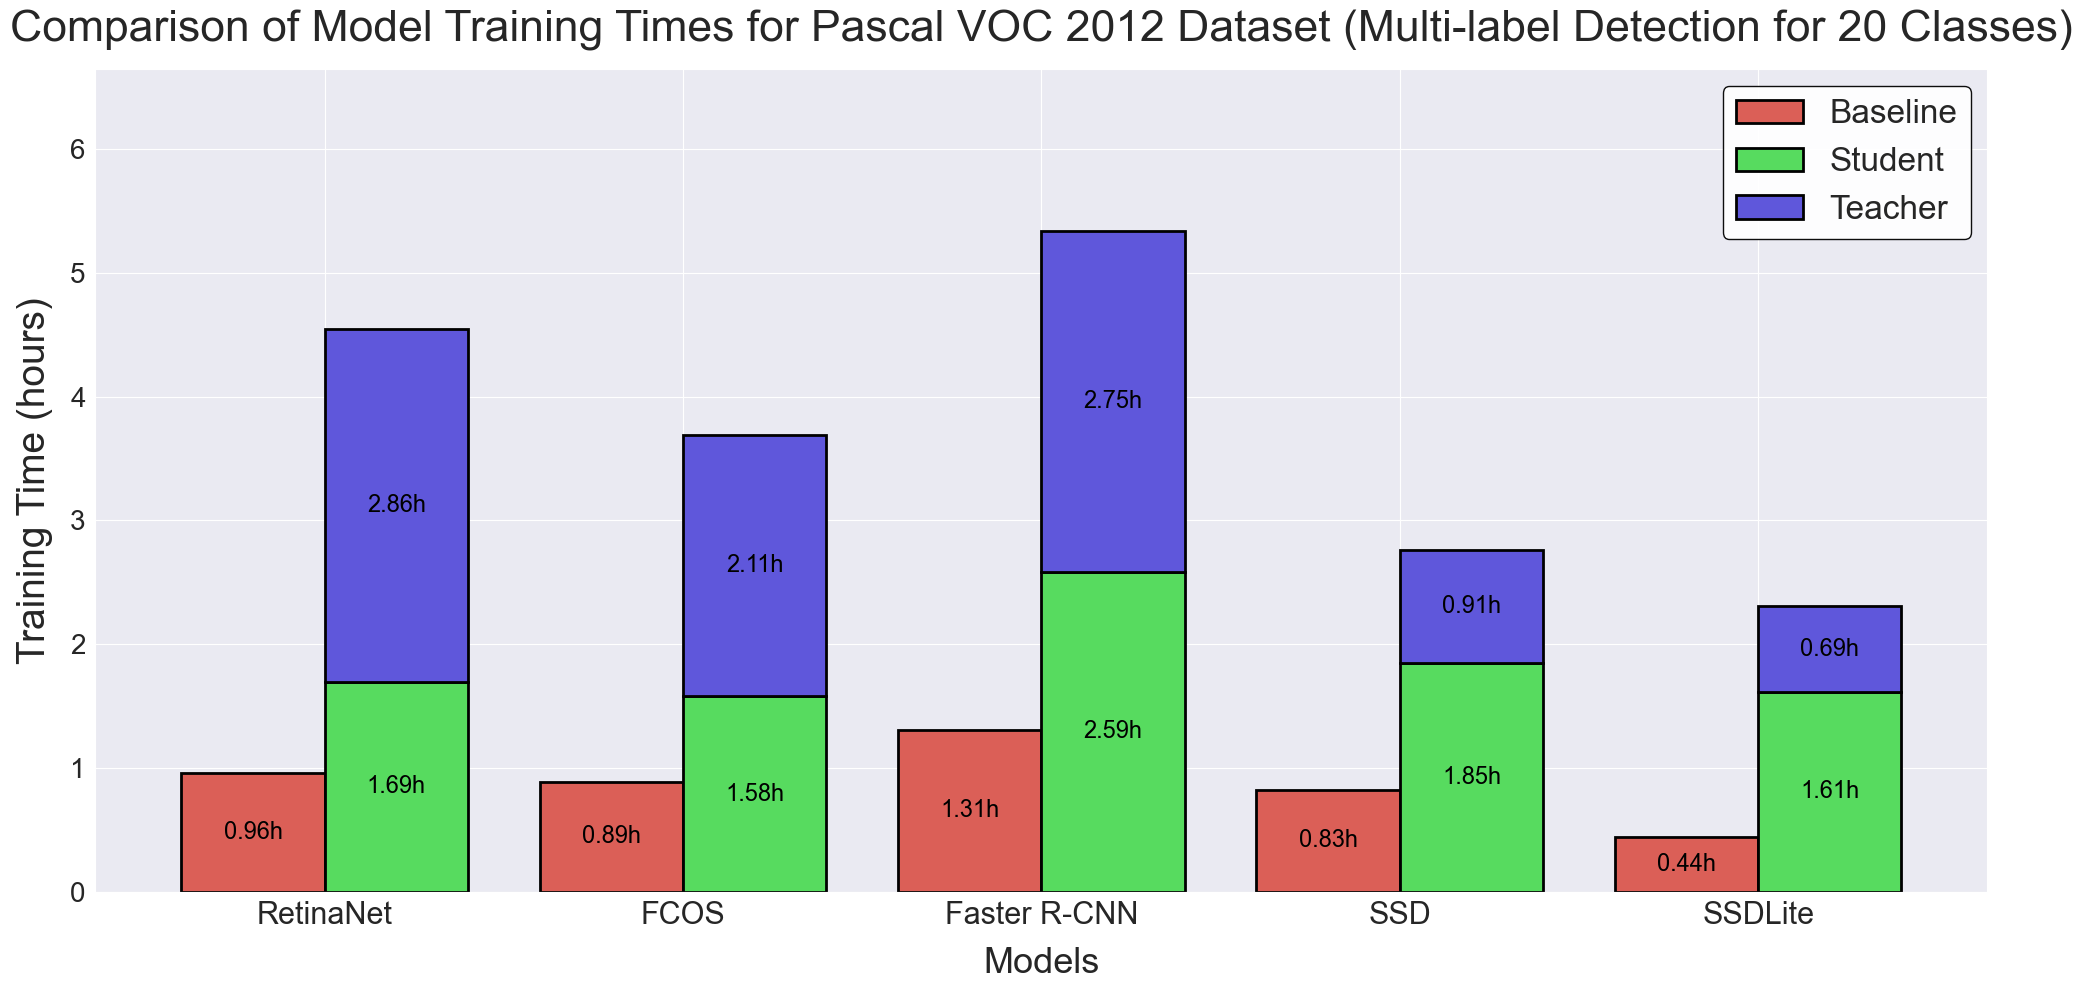

In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plotting_dictionary_comparison_soda01m = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary_student1"},
    {'title': "RetinaNet\n(Teacher)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_overlay_box_binary1"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/SODA 01m/FCOS/FCOS_rgb_binary1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/SODA 01m/FCOS/FCOS_rgb_binary_student1"},
    {'title': "FCOS\n(Teacher)", 'path': f"../runs/SODA 01m/FCOS/FCOS_rgb_overlay_box_binary1"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_binary1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_binary_student1"},
    {'title': "Faster R-CNN\n(Teacher)", 'path': f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_overlay_box_binary1"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SODA 01m/SSD/SSD_rgb_binary1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SODA 01m/SSD/SSD_rgb_binary_student1"},
    {'title': "SSD\n(Teacher)", 'path': f"../runs/SODA 01m/SSD/SSD_rgb_overlay_box_binary1"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SODA 01m/SSDLite/SSDLite_rgb_binary1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SODA 01m/SSDLite/SSDLite_rgb_binary_student1"},
    {'title': "SSDLite\n(Teacher)", 'path': f"../runs/SODA 01m/SSDLite/SSDLite_rgb_overlay_box_binary1"},
]

MODEL_NAME = 'SODA_Dataset_Tiled_Multi'
plotting_dictionary_comparison_soda_multi = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student2"},
    {'title': "RetinaNet\n(Teacher)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_teacher1"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student1"},
    {'title': "FCOS\n(Teacher)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_teacher1"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student2"},
    {'title': "Faster R-CNN\n(Teacher)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_teacher1"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},
    {'title': "SSD\n(Teacher)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_teacher1"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1"},
    {'title': "SSDLite\n(Teacher)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_teacher1"},
]

MODEL_NAME = 'SODA_Dataset_Tiled_Single'
plotting_dictionary_comparison_soda_single = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student1"},
    {'title': "RetinaNet\n(Teacher)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_teacher1"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},
    {'title': "FCOS\n(Teacher)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_teacher1"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student2"},
    {'title': "Faster R-CNN\n(Teacher)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_teacher1"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},
    {'title': "SSD\n(Teacher)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_teacher1"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student2"},
    {'title': "SSDLite\n(Teacher)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_teacher1"},
]

MODEL_NAME= 'PascalVOC2012'
plotting_dictionary_comparison_pascal_voc = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student1"},
    {'title': "RetinaNet\n(Teacher)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_teacher1"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},
    {'title': "FCOS\n(Teacher)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_teacher1"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student1"},
    {'title': "Faster R-CNN\n(Teacher)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_teacher1"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},
    {'title': "SSD\n(Teacher)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_teacher1"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1"},
    {'title': "SSDLite\n(Teacher)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_teacher1"},
]

def extract_total_training_times(plotting_dict):
    times = []
    titles = []

    for entry in plotting_dict:
        # Ensure 'title' exists in the entry
        if 'title' not in entry:
            print(f"Warning: Missing 'title' in entry: {entry}")
            continue  # Skip this entry if no title is found

        title = entry['title']  # Retrieve the title
        titles.append(title)

        # Construct the path to the CSV file containing elapsed time data
        csv_path = os.path.join(entry['path'], "time_elapsed.csv")

        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            total_time = df['total_time_elapsed'].iloc[-1]  # Get the last row's total time
            times.append(total_time / 3600)  # Convert time to hours
        else:
            print(f"Missing file: {csv_path}")
            times.append(0)  # If the file is missing, append 0

    # Ensure the length of the times list is 15 (matching number of titles)
    while len(times) < 15:
        times.append(0)

    return titles, times

def plot_training_times(titles, times, plot_title="Model Training Times", save_title="training_times.jpg"):
    if len(titles) % 3 != 0 or len(titles) != len(times):
        print(f"Error: Titles and times must be in groups of three. Titles: {len(titles)}, Times: {len(times)}")
        return

    sns.set_style("darkgrid")
    colors = sns.color_palette("hls", 3)  # Baseline, Student, Teacher

    num_models = len(titles) // 3
    model_names = [' '.join(titles[i * 3].split()[:-1]) for i in range(num_models)]

    baseline_times = np.array(times[::3])
    student_times = np.array(times[1::3])
    teacher_times = np.array(times[2::3])

    x = np.arange(num_models)
    width = 0.4

    fig, ax = plt.subplots(figsize=(20, 10))

    # Bars
    bars_baseline = ax.bar(x - width / 2, baseline_times, width, label='Baseline',
                           color=colors[0], edgecolor='black', linewidth=2)

    bars_student = ax.bar(x + width / 2, student_times, width, label='Student',
                          color=colors[1], edgecolor='black', linewidth=2)

    bars_teacher = ax.bar(x + width / 2, teacher_times, width,
                          bottom=student_times, label='Teacher',
                          color=colors[2], edgecolor='black', linewidth=2)

    # Bar labels
    for i in range(num_models):
        ax.text(x[i] - width / 2, baseline_times[i] / 2, f"{baseline_times[i]:.2f}h",
                ha='center', va='center', fontsize=17, color='black')

        ax.text(x[i] + width / 2, student_times[i] / 2, f"{student_times[i]:.2f}h",
                ha='center', va='center', fontsize=17, color='black')

        ax.text(x[i] + width / 2, student_times[i] + teacher_times[i] / 2, f"{teacher_times[i]:.2f}h",
                ha='center', va='center', fontsize=17, color='black')

    # Axis labels and title
    ax.set_xlabel("Models", fontsize=26, labelpad=12)
    ax.set_ylabel("Training Time (hours)", fontsize=28, labelpad=12)
    ax.set_title(plot_title, fontsize=32, pad=20)

    ax.set_xticks(x)
    ax.set_xticklabels(model_names, fontsize=22, rotation=0)
    ax.tick_params(axis='y', labelsize=20)

    # Dynamic ylim
    max_time = max(baseline_times + student_times + teacher_times)
    ax.set_ylim(0, max_time )

    # Legend
    ax.legend(fontsize=24, loc='upper right', frameon=True, framealpha=0.95,
              facecolor='white', edgecolor='black')

    plt.subplots_adjust(left=0.07, right=0.97, top=0.9, bottom=0.2)
    plt.tight_layout()
    # Save the plot
    plt.savefig(f"../Assets/figures/training_times_{save_title}.jpg",  bbox_inches='tight')
    plt.show()
    
# Replace these with the actual variable names you've defined
datasets = {
    "SODA 01m Dataset (Binary Detection)": plotting_dictionary_comparison_soda01m,
    "SODA Dataset (Tiled Multi-label Detection)": plotting_dictionary_comparison_soda_multi,
    "SODA Dataset (Tiled Binary Detection)": plotting_dictionary_comparison_soda_single,
    "Pascal VOC 2012 Dataset (Multi-label Detection for 20 Classes)": plotting_dictionary_comparison_pascal_voc
}

for dataset_name, plotting_dict in datasets.items():
    titles, times = extract_total_training_times(plotting_dict)
    plot_training_times(titles, times, plot_title=f"Comparison of Model Training Times for {dataset_name}", save_title=dataset_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_").lower())


In [6]:
import torch
import torchvision
import pandas as pd
from functools import partial
from torchvision.models.detection.retinanet import RetinaNetClassificationHead
from torchvision.models.detection.fcos import FCOSClassificationHead
from torchvision.models.detection.ssd import SSDClassificationHead
from torchvision.models.detection.ssdlite import SSDLiteClassificationHead
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def calculate_model_size(model):
    model_size = sum(p.numel() for p in model.parameters()) * 4 / (1024 ** 2)  # MB
    num_params = sum(p.numel() for p in model.parameters())
    return model_size, num_params

def load_and_analyze_model(model_name, configuration, model_type, weight_path, num_classes, num_channels):
    model = None
    try:
        if model_type == 'retinanet':
            # Load pre-trained RetinaNet model and modify it
            pre_trained_model = torchvision.models.detection.retinanet_resnet50_fpn(weights=torchvision.models.detection.RetinaNet_ResNet50_FPN_Weights.DEFAULT)
            model = pre_trained_model.to(device)
            in_features = model.head.classification_head.cls_logits.in_channels
            num_anchors = model.head.classification_head.num_anchors
            model.head.classification_head = RetinaNetClassificationHead(
                in_channels=in_features,
                num_classes=num_classes,
                num_anchors=num_anchors,
                norm_layer=partial(torch.nn.GroupNorm, 32)
            )

        elif model_type == 'fcos':
            # Load pre-trained FCOS model and modify it
            pre_trained_model = torchvision.models.detection.fcos_resnet50_fpn(weights=torchvision.models.detection.FCOS_ResNet50_FPN_Weights.DEFAULT)
            model = pre_trained_model.to(device)
            model.backbone.body.conv1 = torch.nn.Conv2d(num_channels, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
            torch.nn.init.kaiming_normal_(model.backbone.body.conv1.weight, mode='fan_out', nonlinearity='relu')
            in_features = model.head.classification_head.cls_logits.in_channels
            num_anchors = model.head.classification_head.num_anchors
            model.head.classification_head = FCOSClassificationHead(
                in_channels=in_features,
                num_classes=num_classes,
                num_anchors=num_anchors,
                norm_layer=partial(torch.nn.GroupNorm, 32)
            )

        elif model_type == 'fasterrcnn':
            # Load pre-trained Faster R-CNN model and modify it
            pre_trained_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT)
            model = pre_trained_model.to(device)
            model.backbone.body.conv1 = torch.nn.Conv2d(num_channels, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
            torch.nn.init.kaiming_normal_(model.backbone.body.conv1.weight, mode='fan_out', nonlinearity='relu')
            in_features = model.roi_heads.box_predictor.cls_score.in_features
            model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

        elif model_type == 'ssd':
            # Load pre-trained SSD model and modify it
            pre_trained_model = torchvision.models.detection.ssd300_vgg16(weights=torchvision.models.detection.SSD300_VGG16_Weights.DEFAULT)
            model = pre_trained_model.to(device)
            in_channels = [layer.in_channels for layer in model.head.classification_head.module_list]
            num_anchors = model.anchor_generator.num_anchors_per_location()
            model.head.classification_head = SSDClassificationHead(
                in_channels=in_channels,
                num_anchors=num_anchors,
                num_classes=num_classes,
            )

        elif model_type == 'ssdlite':
            # Load pre-trained SSDLite model and modify it
            pre_trained_model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(weights=torchvision.models.detection.SSDLite320_MobileNet_V3_Large_Weights.DEFAULT)
            model = pre_trained_model.to(device)
            model.backbone.features[0][0][0] = torch.nn.Conv2d(num_channels, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
            torch.nn.init.kaiming_normal_(model.backbone.features[0][0][0].weight, mode='fan_out', nonlinearity='relu')
            model.to(device)
            tmp_img = torch.zeros((1, num_channels, 640, 640), dtype=torch.float32, device=device)
            with torch.no_grad():
                features = model.backbone(tmp_img)
            in_channels = [features.shape[1]] if isinstance(features, torch.Tensor) else [f.shape[1] for f in features.values()]
            num_anchors = model.anchor_generator.num_anchors_per_location()
            model.head.classification_head = SSDLiteClassificationHead(
                in_channels=in_channels,
                num_anchors=num_anchors,
                num_classes=num_classes,
                norm_layer=partial(torch.nn.GroupNorm, 32)
            )

        else:
            raise ValueError(f"Unsupported model type: {model_type}")

        # Load weights and evaluate model
        model.load_state_dict(torch.load(weight_path, map_location=device))
        model.eval().to(device)

        size, params = calculate_model_size(model)

        # Round the parameters to Million
        params = round(params / 1e6, 2)

        return {
            "Model Name": model_name,
            "Configuration": configuration,
            "Type": model_type.upper(),
            "Size (MB)": round(size, 2),
            "Parameters(M)": params,
            "Number of Classes": num_classes,
            "Number of Channels": num_channels,
        }

    except Exception as e:
        return {
            "Model Name": model_name,
            "Configuration": configuration,
            "Type": model_type.upper(),
            "Size (MB)": None,
            "Parameters(M)": None,
            "Number of Classes": num_classes,
            "Number of Channels": num_channels,
            "Error": str(e)
        }

# Example usage
MODEL_NAME_LIST = ["SODA_Dataset_Tiled_Single",
                     "SODA_Dataset_Tiled_Multi", 
                     "PascalVOC2012"]
NUM_CLASSES_LIST = [2, 7, 21]

for model_name, num_classes in zip(MODEL_NAME_LIST, NUM_CLASSES_LIST):
    print(f"Model Name: {model_name}, Number of Classes: {num_classes}")
    MODEL_NAME = model_name
    NUM_CLASSES = num_classes

    models_info = [
        (MODEL_NAME, "Baseline", "retinanet", f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1/weights/best.pth", 3, NUM_CLASSES),
        (MODEL_NAME, "Student", "retinanet", f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student1/weights/best.pth", 3, NUM_CLASSES),
        # (MODEL_NAME, "Teacher", "retinanet", f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_teacher1/weights/best.pth", 4, NUM_CLASSES),

        (MODEL_NAME, "Baseline", "fcos", f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1/weights/best.pth", 3, NUM_CLASSES),
        (MODEL_NAME, "Student", "fcos", f"../runs/FCOS/FCOS_{MODEL_NAME}_student1/weights/best.pth", 3, NUM_CLASSES),
        # (MODEL_NAME, "Teacher", "fcos", f"../runs/FCOS/FCOS_{MODEL_NAME}_teacher1/weights/best.pth", 4, NUM_CLASSES),

        (MODEL_NAME, "Baseline", "fasterrcnn", f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1/weights/best.pth", 3, NUM_CLASSES),
        (MODEL_NAME, "Student", "fasterrcnn", f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student1/weights/best.pth", 3, NUM_CLASSES),
        # (MODEL_NAME, "Teacher", "fasterrcnn", f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_teacher1/weights/best.pth", 4, NUM_CLASSES),

        (MODEL_NAME, "Baseline", "ssd", f"../runs/SSD/SSD_{MODEL_NAME}_baseline1/weights/best.pth", 3, NUM_CLASSES),
        (MODEL_NAME, "Student", "ssd", f"../runs/SSD/SSD_{MODEL_NAME}_student1/weights/best.pth", 3, NUM_CLASSES),
        # (MODEL_NAME, "Teacher", "ssd", f"../runs/SSD/SSD_{MODEL_NAME}_teacher1/weights/best.pth", 4, NUM_CLASSES),

        (MODEL_NAME, "Baseline", "ssdlite", f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1/weights/best.pth", 3, NUM_CLASSES),    
        (MODEL_NAME, "Student", "ssdlite", f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1/weights/best.pth", 3, NUM_CLASSES),
        # (MODEL_NAME, "Teacher", "ssdlite", f"../runs/SSDLite/SSDLite_{MODEL_NAME}_teacher1/weights/best.pth", 4, NUM_CLASSES),
    ]

    results = []
    for model_name, configuration, model_type, path, num_channels, num_classes in models_info:
        info = load_and_analyze_model(model_name, configuration, model_type, path, num_classes, num_channels)
        results.append(info)

    df = pd.DataFrame(results)
    # Save the DataFrame to a CSV file
    df.to_csv(f"../Assets/figures/model_sizes_analysis_{MODEL_NAME}.csv", index=True)
    display(df)

# Doing one for soda 01m dataset
MODEL_NAME = 'SODA_01m_Dataset_Single'
NUM_CLASSES = 2

models_info = [
    (MODEL_NAME, "Baseline", "retinanet", f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary1/weights/best.pth", 3, NUM_CLASSES),
    (MODEL_NAME, "Student", "retinanet", f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary_student1/weights/best.pth", 3, NUM_CLASSES),
    # (MODEL_NAME, "Teacher", "retinanet", f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_overlay_box_binary1/weights/best.pth", 4, NUM_CLASSES),

    (MODEL_NAME, "Baseline", "fcos", f"../runs/SODA 01m/FCOS/FCOS_rgb_binary1/weights/best.pth", 3, NUM_CLASSES),
    (MODEL_NAME, "Student", "fcos", f"../runs/SODA 01m/FCOS/FCOS_rgb_binary_student1/weights/best.pth", 3, NUM_CLASSES),
    # (MODEL_NAME, "Teacher", "fcos", f"../runs/SODA 01m/FCOS/FCOS_rgb_overlay_box_binary1/weights/best.pth", 4, NUM_CLASSES),

    (MODEL_NAME, "Baseline", "fasterrcnn", f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_binary1/weights/best.pth", 3, NUM_CLASSES),
    (MODEL_NAME, "Student", "fasterrcnn", f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_binary_student1/weights/best.pth", 3, NUM_CLASSES),
    # (MODEL_NAME, "Teacher", "fasterrcnn", f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_overlay_box_binary1/weights/best.pth", 4, NUM_CLASSES),

    (MODEL_NAME, "Baseline", "ssd", f"../runs/SODA 01m/SSD/SSD_rgb_binary1/weights/best.pth", 3, NUM_CLASSES),
    (MODEL_NAME, "Student", "ssd", f"../runs/SODA 01m/SSD/SSD_rgb_binary_student1/weights/best.pth", 3, NUM_CLASSES),
    # (MODEL_NAME, "Teacher", "ssd", f"../runs/SODA 01m/SSD/SSD_rgb_overlay_box_binary1/weights/best.pth", 4, NUM_CLASSES),

    (MODEL_NAME, "Baseline", "ssdlite", f"../runs/SODA 01m/SSDLite/SSDLite_rgb_binary1/weights/best.pth", 3, NUM_CLASSES),
    (MODEL_NAME, "Student", "ssdlite", f"../runs/SODA 01m/SSDLite/SSDLite_rgb_binary_student1/weights/best.pth", 3, NUM_CLASSES),
    # (MODEL_NAME, "Teacher", "ssdlite", f"../runs/SODA 01m/SSDLite/SSDLite_rgb_overlay_box_binary1/weights/best.pth", 4, NUM_CLASSES),
]

results = []
for model_name, configuration, model_type, path, num_channels, num_classes in models_info:
    info = load_and_analyze_model(model_name, configuration, model_type, path, num_classes, num_channels)
    results.append(info)

df = pd.DataFrame(results)
# Save the DataFrame to a CSV file
df.to_csv(f"../Assets/figures/model_sizes_analysis_soda_01m.csv", index=True)
print("Model Name:", MODEL_NAME, "Number of Classes:", NUM_CLASSES)
display(df)

Model Name: SODA_Dataset_Tiled_Single, Number of Classes: 2


Model Name Configuration        Type  Size (MB)  \
0  SODA_Dataset_Tiled_Single      Baseline   RETINANET     122.72   
1  SODA_Dataset_Tiled_Single       Student   RETINANET     122.72   
2  SODA_Dataset_Tiled_Single      Baseline        FCOS     122.32   
3  SODA_Dataset_Tiled_Single       Student        FCOS     122.32   
4  SODA_Dataset_Tiled_Single      Baseline  FASTERRCNN     157.54   
5  SODA_Dataset_Tiled_Single       Student  FASTERRCNN     157.54   
6  SODA_Dataset_Tiled_Single      Baseline         SSD      90.58   
7  SODA_Dataset_Tiled_Single       Student         SSD      90.58   
8  SODA_Dataset_Tiled_Single      Baseline     SSDLITE       8.42   
9  SODA_Dataset_Tiled_Single       Student     SSDLITE       8.42   

   Parameters(M)  Number of Classes  Number of Channels  
0          32.17                  2                   3  
1          32.17                  2                   3  
2          32.06                  2                   3  
3          32.06                  2                   3  
4          41.30                  2                   3  
5          41.30                  2                   3  
6          23.75                  2                   3  
7          23.75                  2                   3  
8           2.21                  2                   3  
9           2.21                  2                   3

Model Name: SODA_Dataset_Tiled_Multi, Number of Classes: 7


Model Name Configuration        Type  Size (MB)  \
0  SODA_Dataset_Tiled_Multi      Baseline   RETINANET     123.11   
1  SODA_Dataset_Tiled_Multi       Student   RETINANET     123.11   
2  SODA_Dataset_Tiled_Multi      Baseline        FCOS     122.36   
3  SODA_Dataset_Tiled_Multi       Student        FCOS     122.36   
4  SODA_Dataset_Tiled_Multi      Baseline  FASTERRCNN     157.64   
5  SODA_Dataset_Tiled_Multi       Student  FASTERRCNN     157.64   
6  SODA_Dataset_Tiled_Multi      Baseline         SSD      93.13   
7  SODA_Dataset_Tiled_Multi       Student         SSD      93.13   
8  SODA_Dataset_Tiled_Multi      Baseline     SSDLITE       8.68   
9  SODA_Dataset_Tiled_Multi       Student     SSDLITE       8.68   

   Parameters(M)  Number of Classes  Number of Channels  
0          32.27                  7                   3  
1          32.27                  7                   3  
2          32.08                  7                   3  
3          32.08                  7                   3  
4          41.32                  7                   3  
5          41.32                  7                   3  
6          24.41                  7                   3  
7          24.41                  7                   3  
8           2.28                  7                   3  
9           2.28                  7                   3

Model Name: PascalVOC2012, Number of Classes: 21


Model Name Configuration        Type  Size (MB)  Parameters(M)  \
0  PascalVOC2012      Baseline   RETINANET     124.22          32.56   
1  PascalVOC2012       Student   RETINANET     124.22          32.56   
2  PascalVOC2012      Baseline        FCOS     122.48          32.11   
3  PascalVOC2012       Student        FCOS     122.48          32.11   
4  PascalVOC2012      Baseline  FASTERRCNN     157.92          41.40   
5  PascalVOC2012       Student  FASTERRCNN     157.92          41.40   
6  PascalVOC2012      Baseline         SSD     100.27          26.29   
7  PascalVOC2012       Student         SSD     100.27          26.29   
8  PascalVOC2012      Baseline     SSDLITE       9.42           2.47   
9  PascalVOC2012       Student     SSDLITE       9.42           2.47   

   Number of Classes  Number of Channels  
0                 21                   3  
1                 21                   3  
2                 21                   3  
3                 21                   3  
4                 21                   3  
5                 21                   3  
6                 21                   3  
7                 21                   3  
8                 21                   3  
9                 21                   3

Model Name: SODA_01m_Dataset_Single Number of Classes: 2


Model Name Configuration        Type  Size (MB)  \
0  SODA_01m_Dataset_Single      Baseline   RETINANET     122.72   
1  SODA_01m_Dataset_Single       Student   RETINANET     122.72   
2  SODA_01m_Dataset_Single      Baseline        FCOS     122.32   
3  SODA_01m_Dataset_Single       Student        FCOS     122.32   
4  SODA_01m_Dataset_Single      Baseline  FASTERRCNN     157.54   
5  SODA_01m_Dataset_Single       Student  FASTERRCNN     157.54   
6  SODA_01m_Dataset_Single      Baseline         SSD      90.58   
7  SODA_01m_Dataset_Single       Student         SSD      90.58   
8  SODA_01m_Dataset_Single      Baseline     SSDLITE       8.42   
9  SODA_01m_Dataset_Single       Student     SSDLITE       8.42   

   Parameters(M)  Number of Classes  Number of Channels  
0          32.17                  2                   3  
1          32.17                  2                   3  
2          32.06                  2                   3  
3          32.06                  2                   3  
4          41.30                  2                   3  
5          41.30                  2                   3  
6          23.75                  2                   3  
7          23.75                  2                   3  
8           2.21                  2                   3  
9           2.21                  2                   3

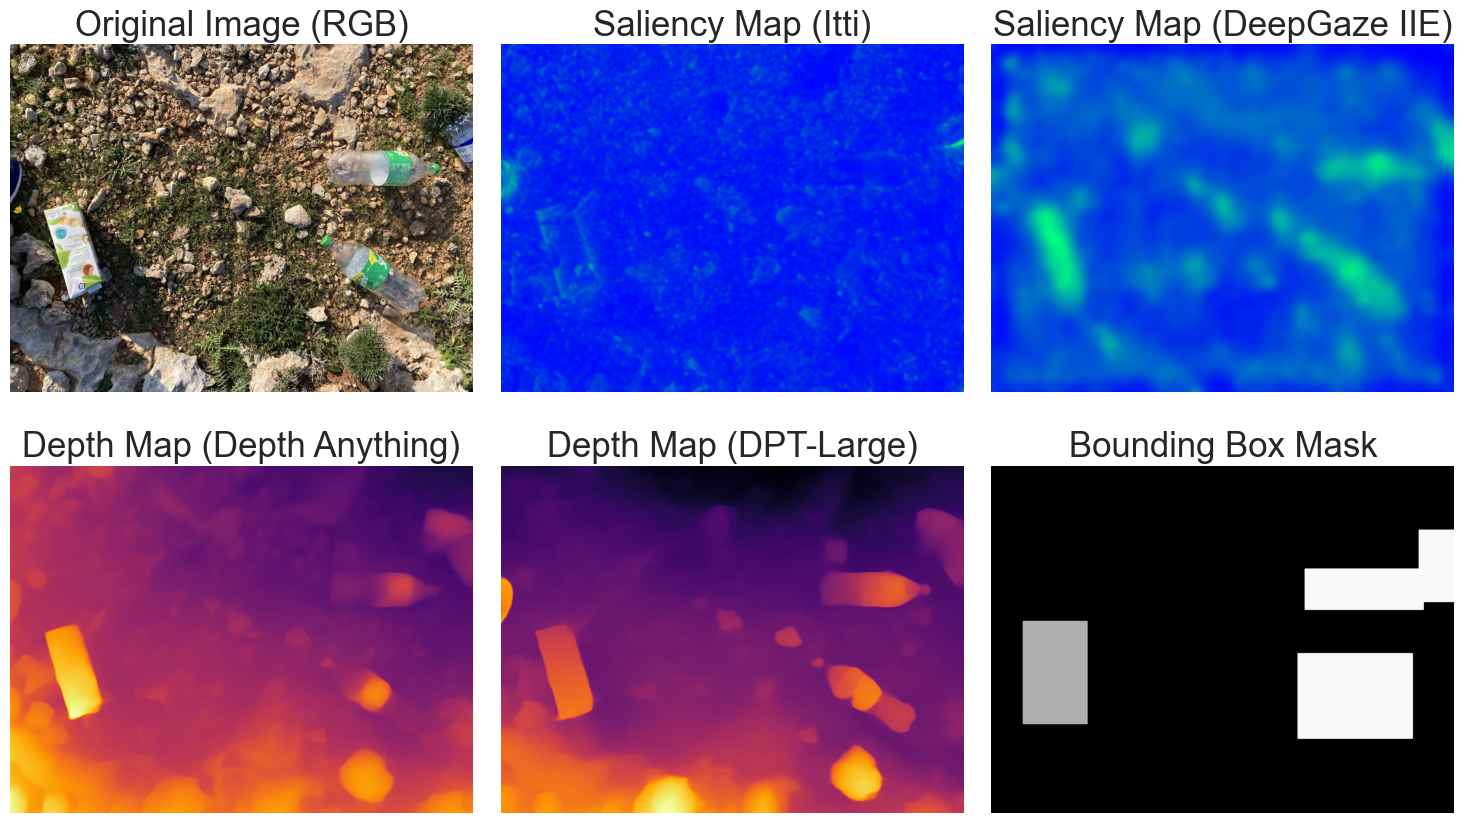

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

# Base path for the images
base_path = "../Assets/test_images/Privileged Information - SODA 01m/"

# Image filenames and metadata
image_data = [
    ("IMG_1092_00_jpeg.rf.ed4de83bb7c6614dc83882861b2e1486.jpg", "Original Image (RGB)", "gray"),
    ("saliency_itti.jpg", "Saliency Map (Itti)", "winter"),
    ("saliency_deepgaze.jpg", "Saliency Map (DeepGaze IIE)", "winter"),
    ("depth_DA.jpg", "Depth Map (Depth Anything)", "inferno"),
    ("depth_dpt_large.jpg", "Depth Map (DPT-Large)", "inferno"),
    ("box_mask.jpg", "Bounding Box Mask", "gray"),
]

# Grid settings
columns = 3
rows = (len(image_data) + columns - 1) // columns
fig, axes = plt.subplots(rows, columns, figsize=(15, 4.5 * rows))

# Ensure axes is always iterable
axes = axes.flatten()

# Plot each image
for i, ax in enumerate(axes):
    if i < len(image_data):
        filename, title, cmap = image_data[i]
        img_path = os.path.join(base_path, filename)
        img = mpimg.imread(img_path)            

        ax.imshow(img, cmap=cmap)
        ax.set_title(title, fontsize=25)
        ax.axis('off')
    else:
        ax.axis('off')

# Neat layout and consistent spacing
plt.tight_layout(pad=2.0)
plt.savefig("../Assets/figures/privileged_information_soda_01m.jpg",  bbox_inches='tight')
plt.show()


In [8]:
import os
import pandas as pd
import numpy as np

metrics2 = ["mAP", "mAP@50", "mAP@75", "mAR@1", "mAR@10", "mAR@100", "Precision", "Recall", "F1 Score"]
metric_labels2 = {
    "mAP": "mAP@50-95",
    "mAP@50": "mAP@50",
    "mAP@75": "mAP@75",
    "mAR@1": "mAR@1",
    "mAR@10": "mAR@10",
    "mAR@100": "mAR@100",
    "Precision": "Precision",
    "Recall": "Recall",
    "F1 Score": "F1 Score"
}

def load_and_display_table(plotting_dictionary, metrics, metric_labels, title):
    data = []
    labels = []

    # Read data
    for entry in plotting_dictionary:
        prf1_path = os.path.join(entry['path'], "precision_recall_f1_metrics.csv")
        map_path = os.path.join(entry['path'], "coco_mAP.csv")
        
        values = []
        
        if os.path.exists(map_path):
            df_map = pd.read_csv(map_path)
            values.extend([df_map.iloc[0]["map"], df_map.iloc[0]["map_50"], df_map.iloc[0]["map_75"],
                        df_map.iloc[0]["mar_1"], df_map.iloc[0]["mar_10"], df_map.iloc[0]["mar_100"]])
        else:
            print(f"Warning: {map_path} not found")
            values.extend([None] * 6)
        
        if os.path.exists(prf1_path):
            df = pd.read_csv(prf1_path)
            mean_values = df[df['Class'] == "Mean"][["Precision", "Recall", "F1 Score"]].values.flatten()
            values.extend(mean_values)
        else:
            print(f"Warning: {prf1_path} not found")
            values.extend([None] * 3)
        
        data.append(values)
        labels.append(entry['title'])

    # Convert data into a DataFrame for tabular representation
    columns = [metric_labels[metric] for metric in metrics]
    # Round to 2 decimal places
    data = np.array(data, dtype=float)
    data = np.round(data, 2)
    # Create DataFrame
    df = pd.DataFrame(data, index=labels, columns=columns)

    # Display the DataFrame as a table
    print(f"\nComparison of Metrics Across Models - {title}")
    display(df)
    # Save the DataFrame to a CSV file
    df.to_csv(f"../Assets/figures/teacher_comparison_{title.replace(' ', '_').replace('-', '_').lower()}.csv", index=True)

# Dictionary of models and paths
MODEL_NAME = 'SODA_01m_Dataset_Single'
teacher_dictionary1 = [
    {'title': "RetinaNet (Teacher)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_overlay_box_binary1"},
    {'title': "FCOS (Teacher)", 'path': f"../runs/SODA 01m/FCOS/FCOS_rgb_overlay_box_binary1"},
    {'title': "Faster R-CNN (Teacher)", 'path': f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_overlay_box_binary1"},
    {'title': "SSD (Teacher)", 'path': f"../runs/SODA 01m/SSD/SSD_rgb_overlay_box_binary1"},
    {'title': "SSDLite (Teacher)", 'path': f"../runs/SODA 01m/SSDLite/SSDLite_rgb_overlay_box_binary1"},
]

# Call the function to display the table
load_and_display_table(teacher_dictionary1, metrics2, metric_labels2, MODEL_NAME)

# Dictionary of models and paths
MODEL_NAME = 'SODA_Dataset_Tiled_Single'
teacher_dictionary2 = [
    {'title': "RetinaNet (Teacher)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_teacher1"},
    {'title': "FCOS (Teacher)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_teacher1"},
    {'title': "Faster R-CNN (Teacher)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_teacher1"},
    {'title': "SSD (Teacher)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_teacher1"},
    {'title': "SSDLite (Teacher)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_teacher1"},
]

# Call the function to display the table
load_and_display_table(teacher_dictionary2, metrics2, metric_labels2, MODEL_NAME)

# Dictionary of models and paths
MODEL_NAME = 'SODA_Dataset_Tiled_Multi'
teacher_dictionary3 = [
    {'title': "RetinaNet (Teacher)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_teacher1"},
    {'title': "FCOS (Teacher)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_teacher1"},
    {'title': "Faster R-CNN (Teacher)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_teacher1"},
    {'title': "SSD (Teacher)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_teacher1"},
    {'title': "SSDLite (Teacher)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_teacher1"},
]

# Call the function to display the table
load_and_display_table(teacher_dictionary3, metrics2, metric_labels2, MODEL_NAME)

# Dictionary of models and paths
MODEL_NAME = 'PascalVOC2012'
teacher_dictionary4 = [
    {'title': "RetinaNet (Teacher)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_teacher1"},
    {'title': "FCOS (Teacher)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_teacher1"},
    {'title': "Faster R-CNN (Teacher)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_teacher1"},
    {'title': "SSD (Teacher)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_teacher1"},
    {'title': "SSDLite (Teacher)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_teacher1"},
]

# Call the function to display the table
load_and_display_table(teacher_dictionary4, metrics2, metric_labels2, MODEL_NAME)


Comparison of Metrics Across Models - SODA_01m_Dataset_Single


mAP@50-95  mAP@50  mAP@75  mAR@1  mAR@10  mAR@100  \
RetinaNet (Teacher)          0.94    0.98    0.96   0.63    0.96     0.96   
FCOS (Teacher)               0.96    0.98    0.97   0.63    0.97     0.97   
Faster R-CNN (Teacher)       0.96    0.99    0.98   0.63    0.98     0.98   
SSD (Teacher)                0.78    0.96    0.94   0.54    0.81     0.81   
SSDLite (Teacher)            0.61    0.73    0.72   0.48    0.63     0.63   

                        Precision  Recall  F1 Score  
RetinaNet (Teacher)          0.93    0.99      0.96  
FCOS (Teacher)               0.81    0.99      0.89  
Faster R-CNN (Teacher)       0.99    0.99      0.99  
SSD (Teacher)                0.65    0.99      0.79  
SSDLite (Teacher)            0.02    0.99      0.03


Comparison of Metrics Across Models - SODA_Dataset_Tiled_Single


mAP@50-95  mAP@50  mAP@75  mAR@1  mAR@10  mAR@100  \
RetinaNet (Teacher)          0.90    0.95    0.94   0.34    0.83     0.91   
FCOS (Teacher)               0.89    0.94    0.93   0.34    0.82     0.90   
Faster R-CNN (Teacher)       0.96    0.99    0.98   0.35    0.87     0.97   
SSD (Teacher)                0.49    0.62    0.59   0.27    0.51     0.51   
SSDLite (Teacher)            0.18    0.23    0.19   0.17    0.19     0.19   

                        Precision  Recall  F1 Score  
RetinaNet (Teacher)          0.41    0.98      0.58  
FCOS (Teacher)               0.97    0.96      0.96  
Faster R-CNN (Teacher)       0.96    0.99      0.98  
SSD (Teacher)                0.16    0.97      0.27  
SSDLite (Teacher)            0.00    0.79      0.01


Comparison of Metrics Across Models - SODA_Dataset_Tiled_Multi


mAP@50-95  mAP@50  mAP@75  mAR@1  mAR@10  mAR@100  \
RetinaNet (Teacher)          0.88    0.92    0.91   0.66    0.89     0.89   
FCOS (Teacher)               0.91    0.95    0.94   0.68    0.92     0.92   
Faster R-CNN (Teacher)       0.95    0.99    0.98   0.70    0.96     0.96   
SSD (Teacher)                0.36    0.49    0.45   0.33    0.41     0.41   
SSDLite (Teacher)            0.11    0.13    0.13   0.13    0.13     0.13   

                        Precision  Recall  F1 Score  
RetinaNet (Teacher)          0.76    0.97      0.85  
FCOS (Teacher)               0.91    0.97      0.94  
Faster R-CNN (Teacher)       0.96    0.99      0.97  
SSD (Teacher)                0.59    0.76      0.63  
SSDLite (Teacher)            0.00    0.37      0.01


Comparison of Metrics Across Models - PascalVOC2012


mAP@50-95  mAP@50  mAP@75  mAR@1  mAR@10  mAR@100  \
RetinaNet (Teacher)          0.77    0.86    0.79   0.60    0.81     0.81   
FCOS (Teacher)               0.80    0.88    0.82   0.61    0.84     0.84   
Faster R-CNN (Teacher)       0.77    0.91    0.82   0.59    0.82     0.82   
SSD (Teacher)                0.42    0.56    0.49   0.41    0.48     0.48   
SSDLite (Teacher)            0.49    0.61    0.54   0.46    0.55     0.55   

                        Precision  Recall  F1 Score  
RetinaNet (Teacher)          0.26    0.90      0.38  
FCOS (Teacher)               0.43    0.91      0.56  
Faster R-CNN (Teacher)       0.56    0.91      0.68  
SSD (Teacher)                0.25    0.69      0.36  
SSDLite (Teacher)            0.04    0.79      0.07

### Evaluation Metrics for Paper

In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.backends.backend_pdf import PdfPages

def save_image_as_pdf(image_path):
    # Load the image
    img = mpimg.imread(image_path)

    # Create a PDF path
    pdf_path = os.path.splitext(image_path)[0] + '.pdf'

    # Save to PDF using Matplotlib
    with PdfPages(pdf_path) as pdf:
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        pdf.savefig(bbox_inches='tight', pad_inches=0)  # Save to PDF
        plt.close()

    print(f"Saved {image_path} as PDF.")

# Example usage
image_paths = ["../Assets/Diagrams/Architecture LUPIv2.png"]
for image_path in image_paths:
    save_image_as_pdf(image_path)


Saved ../Assets/Diagrams/Architecture LUPIv2.png as PDF.


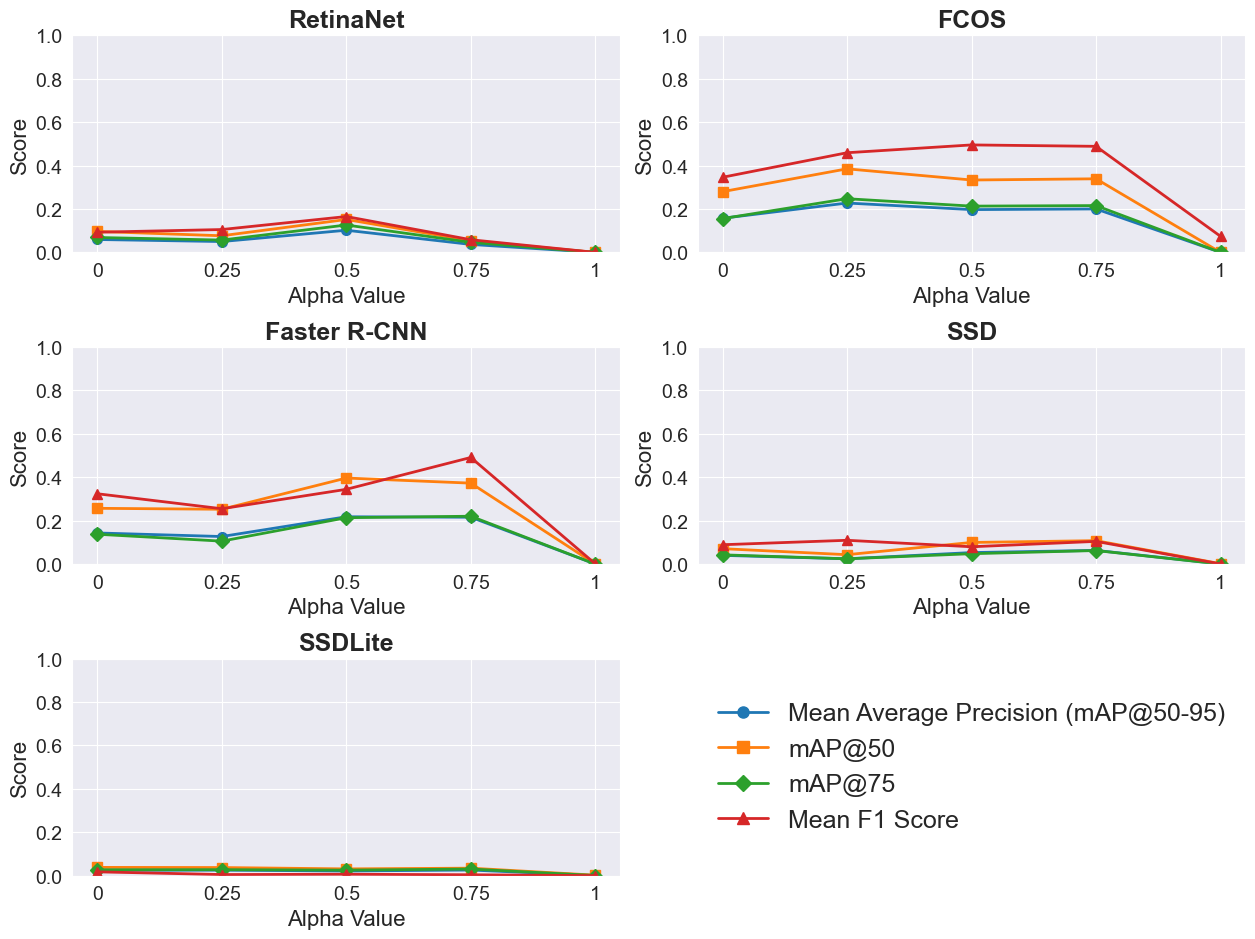

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dictionary of models and paths
MODEL_NAME = 'SODA_Dataset_Tiled_Multi'
TITLE = "The Effect of the Alpha (α) Parameter on Student Model Performance \n(SODA Dataset - Tiled Multi-label)"
plotting_dictionary_retinanet = [
    {'title': "RetinaNet\nAlpha=0", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\nAlpha=0.25", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student1"},
    {'title': "RetinaNet\nAlpha=0.5", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student2"},
    {'title': "RetinaNet\nAlpha=0.75", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student3"},
    {'title': "RetinaNet\nAlpha=1", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student4"},
]

plotting_dictionary_fcos = [
    {'title': "FCOS\nAlpha=0", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\nAlpha=0.25", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student1"},
    {'title': "FCOS\nAlpha=0.5", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},
    {'title': "FCOS\nAlpha=0.75", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student3"},
    {'title': "FCOS\nAlpha=1", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student4"},
]

plotting_dictionary_fasterrcnn = [
    {'title': "Faster R-CNN\nAlpha=0", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\nAlpha=0.25", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student1"},
    {'title': "Faster R-CNN\nAlpha=0.5", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student2"},
    {'title': "Faster R-CNN\nAlpha=0.75", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student3"},
    {'title': "Faster R-CNN\nAlpha=1", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student4"},
]

plotting_dictionary_ssd = [
    {'title': "SSD\nAlpha=0", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\nAlpha=0.25", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student1"},
    {'title': "SSD\nAlpha=0.5", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},
    {'title': "SSD\nAlpha=0.75", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student3"},
    {'title': "SSD\nAlpha=1", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student4"},
]

plotting_dictionary_ssdlite = [
    {'title': "SSDLite\nAlpha=0", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\nAlpha=0.25", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1"},
    {'title': "SSDLite\nAlpha=0.5", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student2"},
    {'title': "SSDLite\nAlpha=0.75", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student3"},
    {'title': "SSDLite\nAlpha=1", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student4"},
]


metrics2 = ["mAP", "mAP@50", "mAP@75", "F1 Score"]
metric_labels2 = {
    "mAP": "Mean Average Precision (mAP@50-95)",
    "mAP@50": "mAP@50",
    "mAP@75": "mAP@75",
    "F1 Score": "Mean F1 Score"
}

def load_and_plot_grid(plotting_dicts, metrics, metric_labels, title):
    sns.set_style("darkgrid")
    colors = plt.get_cmap("tab10").colors
    markers = ['o', 's', 'D', '^']

    fig, axes = plt.subplots(3, 2, figsize=(13, 10))
    axes = axes.flatten()

    for i, (plotting_dictionary, ax) in enumerate(zip(plotting_dicts + [None], axes)):
        if plotting_dictionary is None:
            handles = [
                plt.Line2D(
                    [0], [0],
                    color=colors[j],
                    marker=markers[j],
                    label=metric_labels[m],
                    linewidth=2,
                    markersize=8
                )
                for j, m in enumerate(metrics)
            ]
            ax.legend(
                handles=handles,
                fontsize=18,
                loc='center',
                frameon=False,
                ncol=1  # Vertical legend layout
            )
            ax.axis('off')
            continue

        data = []
        labels = []

        for entry in plotting_dictionary:
            prf1_path = os.path.join(entry['path'], "precision_recall_f1_metrics.csv")
            map_path = os.path.join(entry['path'], "coco_mAP.csv")
            values = []

            if os.path.exists(map_path):
                df_map = pd.read_csv(map_path)
                values.extend([df_map.iloc[0]["map"], df_map.iloc[0]["map_50"], df_map.iloc[0]["map_75"]])
            else:
                values.extend([None] * 3)

            if os.path.exists(prf1_path):
                df = pd.read_csv(prf1_path)
                mean_values = df[df['Class'] == "Mean"][["Precision", "Recall", "F1 Score"]].values.flatten()
                values.extend(mean_values)
            else:
                values.extend([None] * 3)

            data.append(values)

            alpha_val = entry['title'].split('\n')[-1].replace('Alpha=', '')
            labels.append(alpha_val)

        data = np.array(data, dtype=float)

        for j, metric in enumerate(metrics):
            ax.plot(
                labels,
                data[:, j],
                label=metric_labels[metric],
                color=colors[j],
                marker=markers[j],
                linewidth=2,
                markersize=7,
            )

        ax.set_title(plotting_dictionary[0]['title'].split('\n')[0], fontsize=18, weight='bold')
        ax.set_xlabel("Alpha Value", fontsize=16)
        ax.set_ylabel("Score", fontsize=16)
        ax.set_ylim(0, 1)
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)

    # fig.suptitle(title, fontsize=22, weight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    os.makedirs("../Assets/figures/publications/", exist_ok=True)
    plt.savefig("../Assets/figures/publications/ablation.jpg",  bbox_inches='tight')
    # Save as pdf
    plt.savefig("../Assets/figures/publications/ablation.pdf",  bbox_inches='tight')
    plt.show()

plotting_dicts = [
    plotting_dictionary_retinanet,
    plotting_dictionary_fcos,
    plotting_dictionary_fasterrcnn,
    plotting_dictionary_ssd,
    plotting_dictionary_ssdlite
]

load_and_plot_grid(plotting_dicts, metrics2, metric_labels2, TITLE)


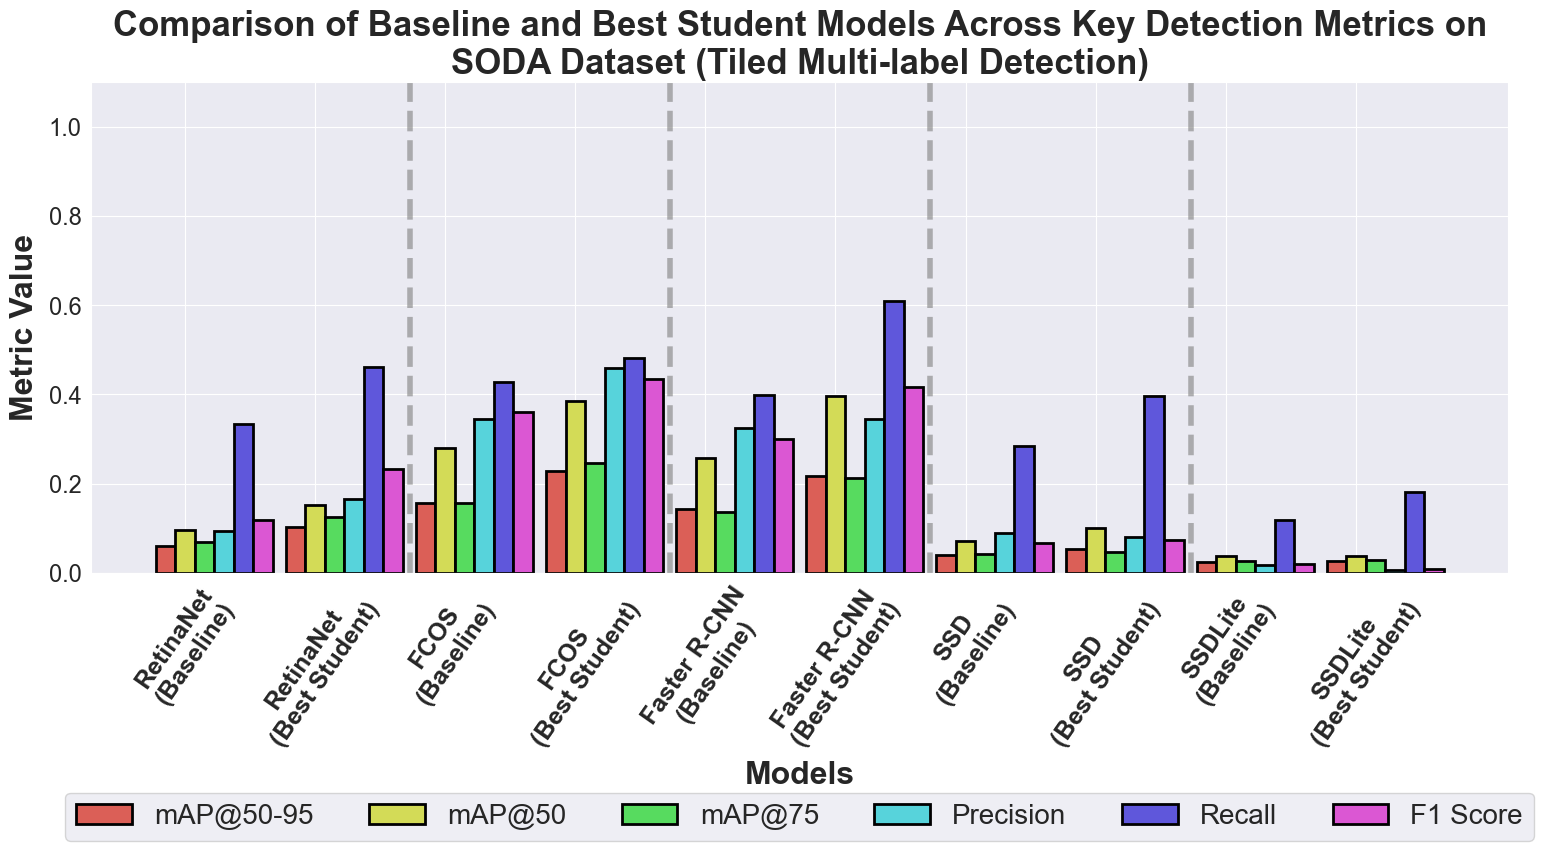

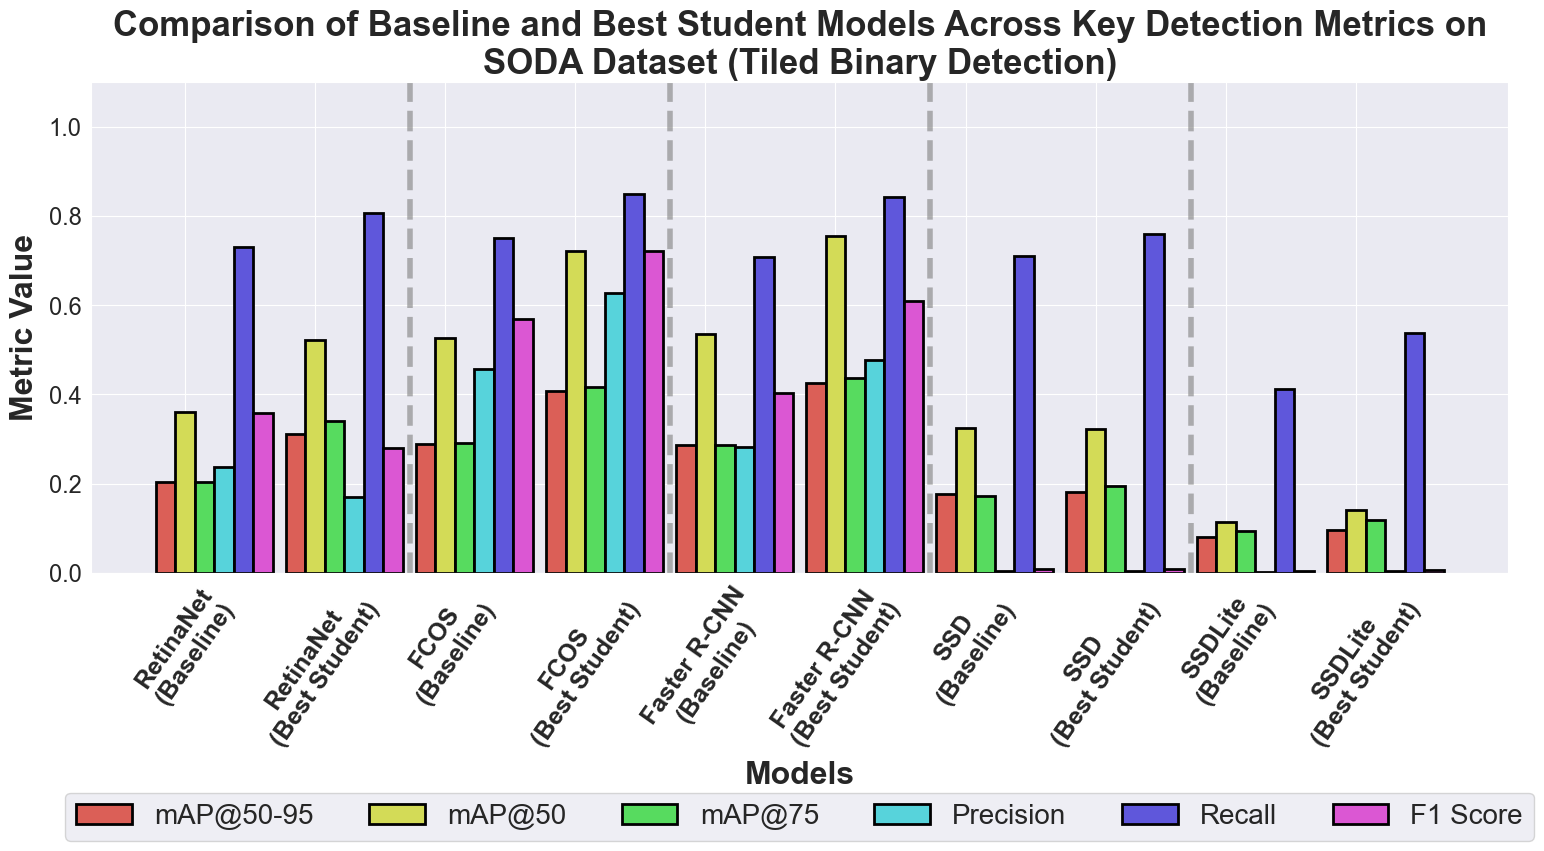

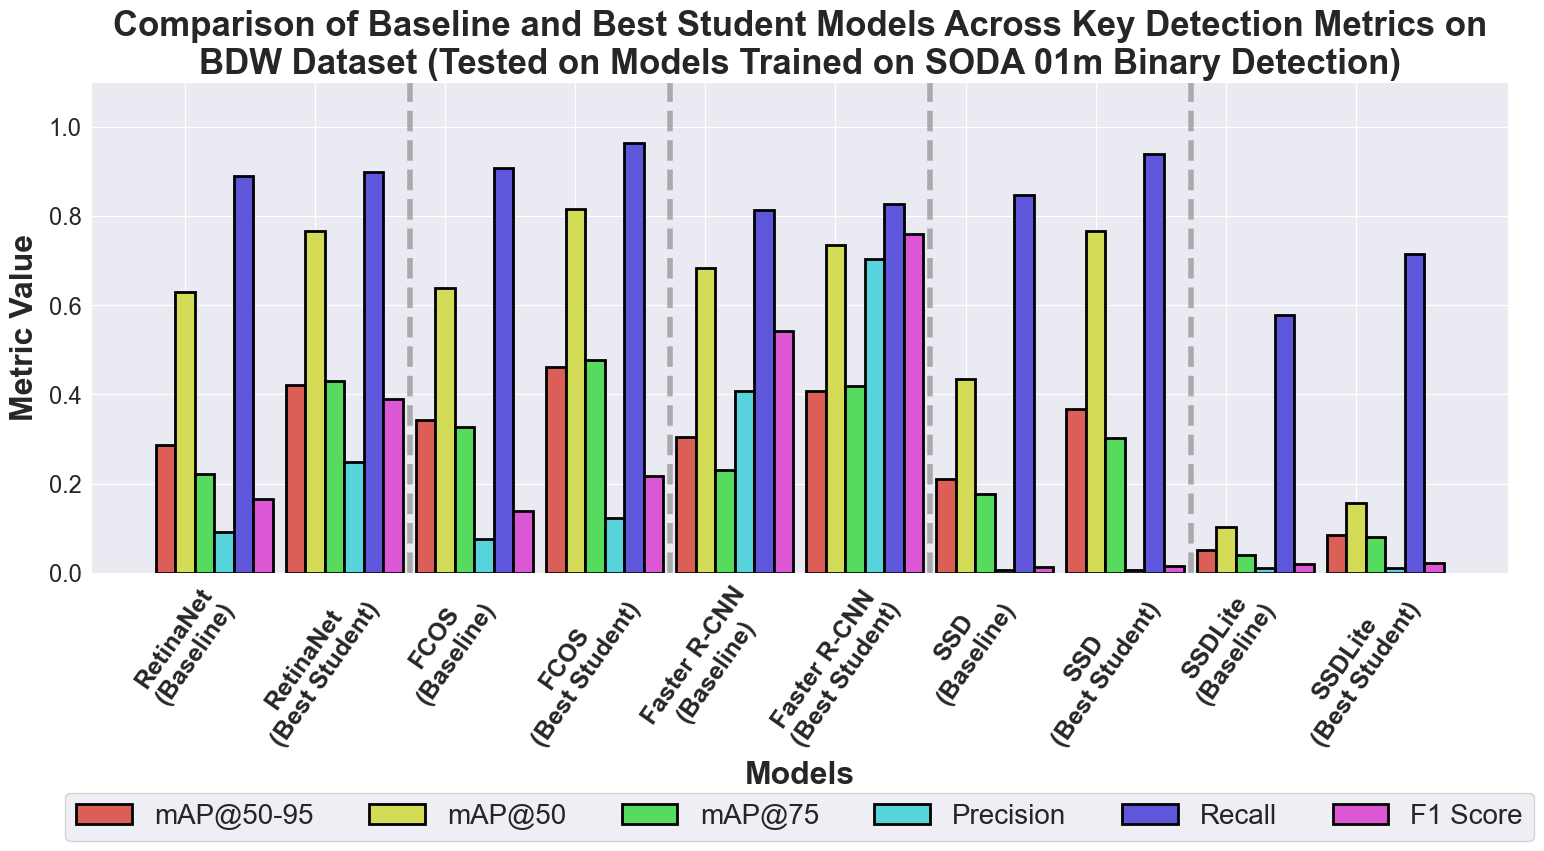

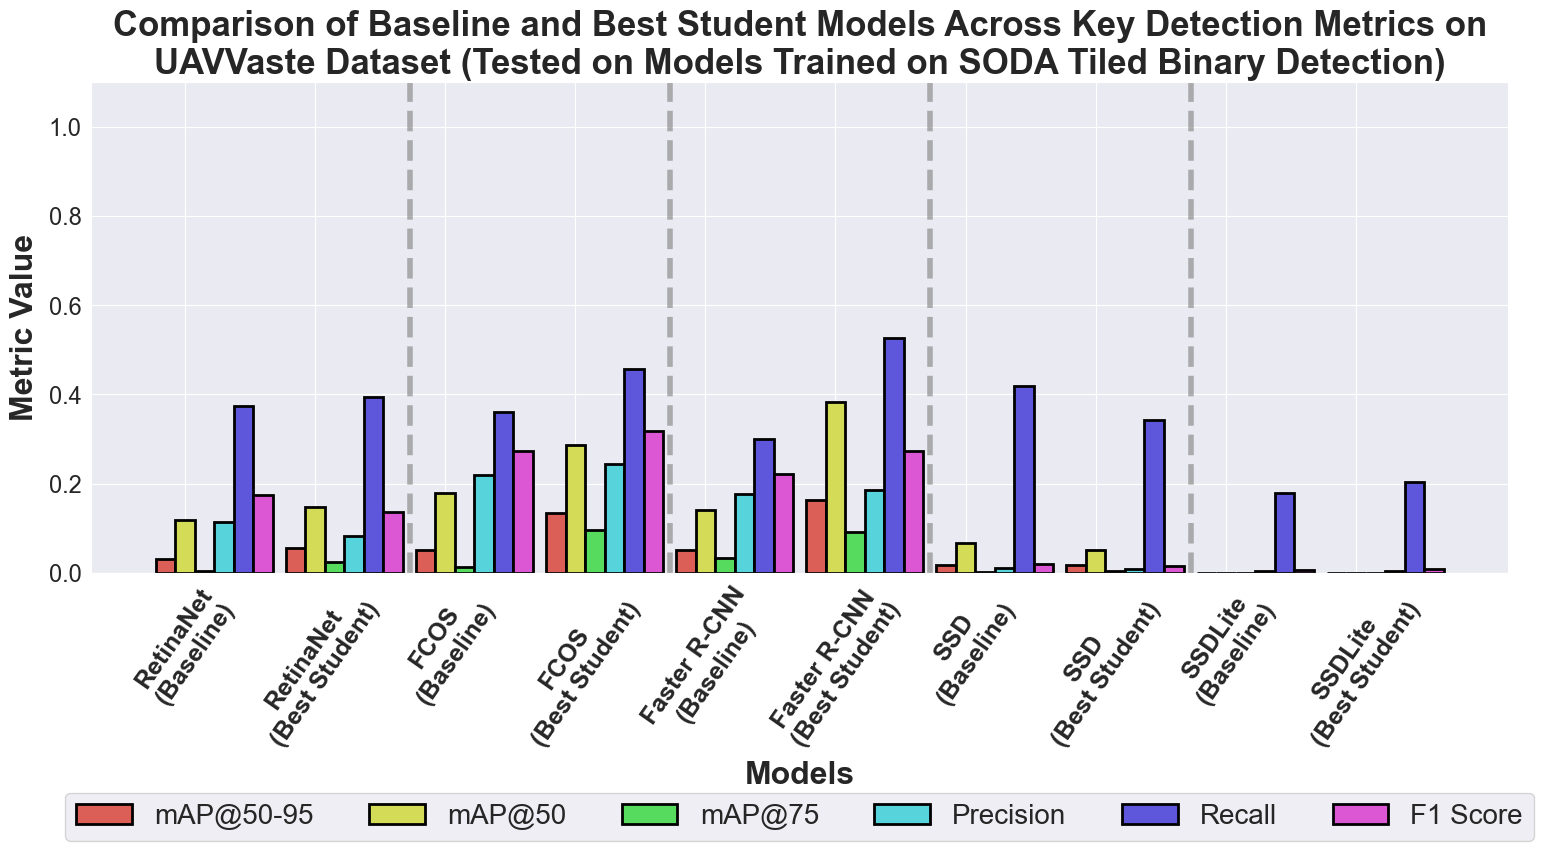

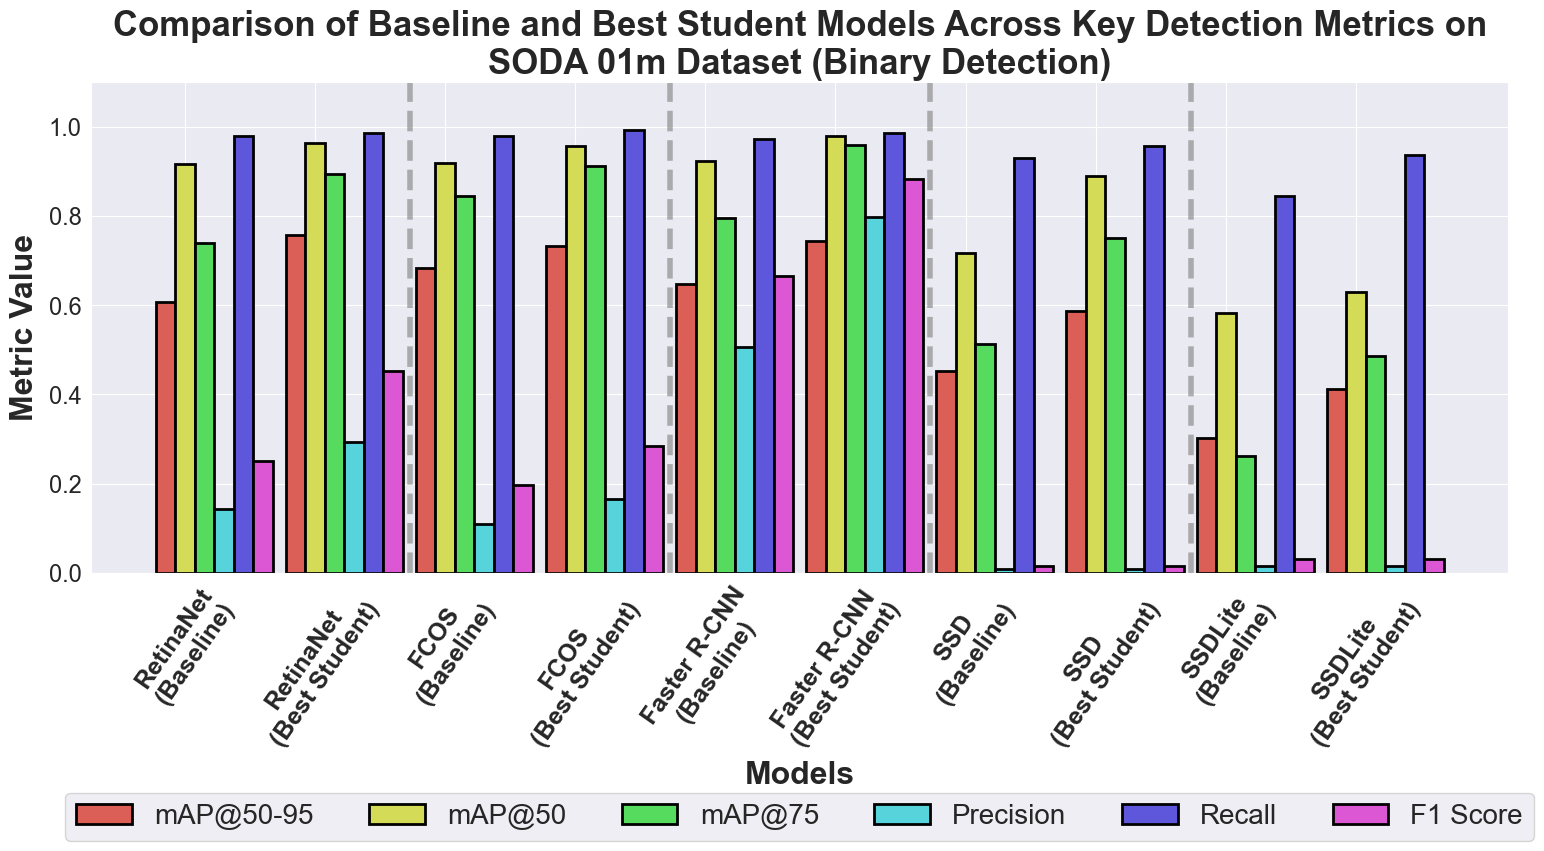

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dictionary of models and paths
MODEL_NAMES = [
        'SODA_Dataset_Tiled_Multi',
        'SODA_Dataset_Tiled_Single',
        'BDW_Dataset_Test2_Single', 
        'UAVVASTE_Dataset_Test_Single'
]
TITLES = [
    "SODA Dataset (Tiled Multi-label Detection)",
    "SODA Dataset (Tiled Binary Detection)",
    "BDW Dataset (Tested on Models Trained on SODA 01m Binary Detection)",
    "UAVVaste Dataset (Tested on Models Trained on SODA Tiled Binary Detection)"
]

SAVE_FOLDER = '../Assets/figures/publications/'

plotting_dictionary_comparison_soda01m = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/SODA 01m/RetinaNet/RetinaNet_rgb_binary_student1"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/SODA 01m/FCOS/FCOS_rgb_binary1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/SODA 01m/FCOS/FCOS_rgb_binary_student1"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_binary1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/SODA 01m/FasterRCNN/FasterRCNN_rgb_binary_student1"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SODA 01m/SSD/SSD_rgb_binary1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SODA 01m/SSD/SSD_rgb_binary_student1"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SODA 01m/SSDLite/SSDLite_rgb_binary1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SODA 01m/SSDLite/SSDLite_rgb_binary_student1"},
]

metrics2 = ["mAP", "mAP@50", "mAP@75", "Precision", "Recall", "F1 Score"]
metric_labels2 = {
    "mAP": "mAP@50-95",
    "mAP@50": "mAP@50",
    "mAP@75": "mAP@75",
    "Precision": "Precision",
    "Recall": "Recall",
    "F1 Score": "F1 Score"
}

def load_and_plot_bar(plotting_dictionary, metrics, metric_labels, title, save_title):
    data = []
    labels = []

    # Read data
    for entry in plotting_dictionary:
        prf1_path = os.path.join(entry['path'], "precision_recall_f1_metrics.csv")
        map_path = os.path.join(entry['path'], "coco_mAP.csv")
        values = []

        if os.path.exists(map_path):
            df_map = pd.read_csv(map_path)
            values.extend([df_map.iloc[0]["map"], df_map.iloc[0]["map_50"], df_map.iloc[0]["map_75"]])
        else:
            print(f"Warning: {map_path} not found")
            values.extend([None] * 3)

        if os.path.exists(prf1_path):
            df = pd.read_csv(prf1_path)
            mean_values = df[df['Class'] == "Mean"][["Precision", "Recall", "F1 Score"]].values.flatten()
            values.extend(mean_values)
        else:
            print(f"Warning: {prf1_path} not found")
            values.extend([None] * 3)

        data.append(values)
        labels.append(entry['title'])

    data = np.array(data, dtype=float)

    sns.set_style("darkgrid")
    colors = sns.color_palette("hls", len(metrics))  # Use HLS palette for better variation in bars

    x = np.arange(len(labels))
    width = 0.15  # Increased width for clearer separation of bars

    # Create figure with larger size suitable for two-column layout
    fig, ax = plt.subplots(figsize=(16, 10))  # Adjusted size for a two-column layout

    # Adjust x positions to add spacing between different model groups
    x_offset = 0
    bar_positions = []
    for i, (metric, color) in enumerate(zip(metrics, colors)):
        bars = ax.bar(x + x_offset, data[:, i], width, label=metric_labels[metric], color=color, edgecolor='black', linewidth=2)

        # Add text values above bars
        # for bar in bars:
        #     yval = bar.get_height()
        #     if not np.isnan(yval):
        #         ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=8)

        bar_positions.append(bars)
        x_offset += width  # Increment offset for next metric

    # Add a vertical line to separate different model groups (lighter line and less intrusive)
    for i in range(1, len(labels)):
        if i % 2 == 0:
            ax.axvline(x=i - 0.12, color='gray', linestyle='--', linewidth=4, alpha=0.6)  # Subtle dotted line

    # Label and title adjustments add vertical space to x-axis labels
    ax.set_xlabel("Models", fontsize=23, labelpad=7, weight='bold')
    ax.set_ylabel("Metric Value", fontsize=23, labelpad=7, weight='bold')
    ax.set_title(title, fontsize=25, weight='bold')

    # Set the x-tick positions and labels, rotating them for clarity
    some_small_offset = 0.3 # Small offset to center the labels
    ax.set_xticks(x + width * (len(metrics) / 2) - some_small_offset)
    ax.set_xticklabels(labels, fontsize=18, ha='center', rotation=55, weight='bold')
    # Make y-ticks larger for better readability
    ax.tick_params(axis='y', labelsize=17)

    # Ensure Y-axis starts at 0 and ends slightly above 1 (for better clarity)
    ax.set_ylim(0, 1.1)

    # Add legend inside the plot with increased font size
    ax.legend(fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.42), ncol=len(metrics))

    # Adjust spacing between axes and plot content
    plt.subplots_adjust(left=0.07, right=0.93, top=0.88, bottom=0.12)

    # Make sure the plot fits without overlapping
    plt.tight_layout(pad=2.0)  # Add some padding between plot elements

    # Save the plot as a PNG file with high resolution
    plt.savefig(os.path.join(SAVE_FOLDER, save_title),  bbox_inches='tight')

    # Save as pdf
    plt.savefig(os.path.join(SAVE_FOLDER, save_title+'.pdf'),  bbox_inches='tight')

    # Display the plot
    plt.show()

plot_title = f"Comparison of Baseline and Best Student Models Across Key Detection Metrics on\n"
MODEL_NAME = 'SODA_Dataset_Tiled_Multi'
plotting_dictionary_comparison_soda_multi = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student2"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student1"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student2"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1"},
]
load_and_plot_bar(plotting_dictionary_comparison_soda_multi, metrics2, metric_labels2, plot_title+TITLES[0], TITLES[0])

MODEL_NAME = 'SODA_Dataset_Tiled_Single'
plotting_dictionary_comparison_soda_single = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student1"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student2"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student2"},
]
load_and_plot_bar(plotting_dictionary_comparison_soda_single, metrics2, metric_labels2, plot_title+TITLES[1], TITLES[1])

MODEL_NAME = 'BDW_Dataset_Test2_Single'
plotting_dictionary_comparison_bdw = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student2"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student2"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student2"},
]
load_and_plot_bar(plotting_dictionary_comparison_bdw, metrics2, metric_labels2, plot_title+TITLES[2], TITLES[2])

MODEL_NAME = 'UAVVASTE_Dataset_Test_Single'
plotting_dictionary_comparison_uavvaste = [
    {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_baseline1"},
    {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_student1"},

    {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_baseline1"},
    {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_student2"},

    {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_baseline1"},
    {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_student1"},

    {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_baseline1"},
    {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_student2"},

    {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_baseline1"},
    {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_student1"},
]
load_and_plot_bar(plotting_dictionary_comparison_uavvaste, metrics2, metric_labels2, plot_title+TITLES[3], TITLES[3])

# Build + plot comparison for each MODEL_NAME
# for model in MODEL_NAMES:
#     plotting_dictionary_comparison_dynamic = [
#         {'title': "RetinaNet\n(Baseline)", 'path': f"../runs/RetinaNet/RetinaNet_{model}_baseline1"},
#         {'title': "RetinaNet\n(Best Student)", 'path': f"../runs/RetinaNet/RetinaNet_{model}_student1"},

#         {'title': "FCOS\n(Baseline)", 'path': f"../runs/FCOS/FCOS_{model}_baseline1"},
#         {'title': "FCOS\n(Best Student)", 'path': f"../runs/FCOS/FCOS_{model}_student2"},

#         {'title': "Faster R-CNN\n(Baseline)", 'path': f"../runs/FasterRCNN/FasterRCNN_{model}_baseline1"},
#         {'title': "Faster R-CNN\n(Best Student)", 'path': f"../runs/FasterRCNN/FasterRCNN_{model}_student1"},

#         {'title': "SSD\n(Baseline)", 'path': f"../runs/SSD/SSD_{model}_baseline1"},
#         {'title': "SSD\n(Best Student)", 'path': f"../runs/SSD/SSD_{model}_student2"},

#         {'title': "SSDLite\n(Baseline)", 'path': f"../runs/SSDLite/SSDLite_{model}_baseline1"},
#         {'title': "SSDLite\n(Best Student)", 'path': f"../runs/SSDLite/SSDLite_{model}_student1"},
#     ]

#     plot_title = f"Comparison of Baseline and Best Student Models Across Key Detection Metrics on\n {TITLES[MODEL_NAMES.index(model)]}"
#     load_and_plot_bar(plotting_dictionary_comparison_dynamic, metrics2, metric_labels2, plot_title, TITLES[MODEL_NAMES.index(model)])

# Plot static SODA 01m comparison
load_and_plot_bar(
    plotting_dictionary_comparison_soda01m,
    metrics2,
    metric_labels2,
    "Comparison of Baseline and Best Student Models Across Key Detection Metrics on\nSODA 01m Dataset (Binary Detection)",
    "SODA 01m Dataset (Single-label)"
)

In [11]:
import os
import pandas as pd
import numpy as np

# Dictionary of models and paths
MODEL_NAME = 'SODA_Dataset_Tiled_Multi'
teacher_dictionary = [
    {'title': "RetinaNet (Teacher)", 'path': f"../runs/RetinaNet/RetinaNet_{MODEL_NAME}_teacher1"},
    {'title': "FCOS (Teacher)", 'path': f"../runs/FCOS/FCOS_{MODEL_NAME}_teacher1"},
    {'title': "Faster R-CNN (Teacher)", 'path': f"../runs/FasterRCNN/FasterRCNN_{MODEL_NAME}_teacher1"},
    {'title': "SSD (Teacher)", 'path': f"../runs/SSD/SSD_{MODEL_NAME}_teacher1"},
    {'title': "SSDLite (Teacher)", 'path': f"../runs/SSDLite/SSDLite_{MODEL_NAME}_teacher1"},
]

metrics2 = ["mAP", "mAP@50", "mAP@75", "Precision", "Recall", "F1 Score"]
metric_labels2 = {
    "mAP": "mAP@50-95",
    "mAP@50": "mAP@50",
    "mAP@75": "mAP@75",
    "Precision": "Mean Precision",
    "Recall": "Mean Recall",
    "F1 Score": "Mean F1 Score"
}

def load_and_display_table(plotting_dictionary, metrics, metric_labels):
    data = []
    labels = []

    # Read data
    for entry in plotting_dictionary:
        prf1_path = os.path.join(entry['path'], "precision_recall_f1_metrics.csv")
        map_path = os.path.join(entry['path'], "coco_mAP.csv")
        
        values = []
        
        if os.path.exists(map_path):
            df_map = pd.read_csv(map_path)
            values.extend([df_map.iloc[0]["map"], df_map.iloc[0]["map_50"], df_map.iloc[0]["map_75"]])
        else:
            print(f"Warning: {map_path} not found")
            values.extend([None] * 3)
        
        if os.path.exists(prf1_path):
            df = pd.read_csv(prf1_path)
            mean_values = df[df['Class'] == "Mean"][["Precision", "Recall", "F1 Score"]].values.flatten()
            values.extend(mean_values)
        else:
            print(f"Warning: {prf1_path} not found")
            values.extend([None] * 3)
        
        data.append(values)
        labels.append(entry['title'])

    # Convert data into a DataFrame for tabular representation
    columns = [metric_labels[metric] for metric in metrics]
    df = pd.DataFrame(data, index=labels, columns=columns)

    # Display the DataFrame as a table
    print("\nComparison of Metrics Across Models:")
    # Round to 2 decimal places
    df = np.round(df, 2)
    # Save the DataFrame to a CSV file
    df.to_csv(f"../Assets/figures/publications/teacher_comparison.csv", index=True)
    display(df)

# Call the function to display the table
load_and_display_table(teacher_dictionary, metrics2, metric_labels2)


Comparison of Metrics Across Models:


mAP@50-95  mAP@50  mAP@75  Mean Precision  \
RetinaNet (Teacher)          0.88    0.92    0.91            0.76   
FCOS (Teacher)               0.91    0.95    0.94            0.91   
Faster R-CNN (Teacher)       0.95    0.99    0.98            0.96   
SSD (Teacher)                0.36    0.49    0.45            0.59   
SSDLite (Teacher)            0.11    0.13    0.13            0.00   

                        Mean Recall  Mean F1 Score  
RetinaNet (Teacher)            0.97           0.85  
FCOS (Teacher)                 0.97           0.94  
Faster R-CNN (Teacher)         0.99           0.97  
SSD (Teacher)                  0.76           0.63  
SSDLite (Teacher)              0.37           0.01